# Comparing methods of hurricane forecast uncertainty
##### author: Elizabeth A. Barnes, Randal J. Barnes and Mark DeMaria

In [1]:
import datetime
import os
import pickle
import pprint
import time

import experiment_settings
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from build_data import build_hurricane_data
import build_model
from model_diagnostics import plot_history
from save_model_run import save_model_run
from sklearn import preprocessing
from training_instrumentation import TrainingInstrumentation
from silence_tensorflow import silence_tensorflow
import tensorflow_probability as tfp

silence_tensorflow()

In [2]:
__author__ = "Randal J Barnes and Elizabeth A. Barnes"
__version__ = "v0.4.0, 18 March 2022"

EXP_NAME_LIST = (
                 "intensity301_EPCP24",
                 "intensity302_EPCP48",    
                 "intensity303_EPCP72",
                 "intensity304_EPCP96",    
                 "intensity305_EPCP120", 
    
                 "intensity201_AL24",
                 "intensity202_AL48",    
                 "intensity203_AL72",
                 "intensity204_AL96",    
                 "intensity205_AL120",    
           
                 )

OVERWRITE_MODEL = False
DATA_PATH = "data/"
MODEL_PATH = "saved_models/"

In [3]:
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["figure.dpi"] = 150
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## Start looping through runs

'intensity301_EPCP24_2013_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2013_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 217.
Epoch 00467: early stopping
{'best_epoch': 216,
 'elapsed_time': 12.525774717330933,
 'loss_train': 3.7307229042053223,
 'loss_valid': 3.761958599090576,
 'network_seed': 333}


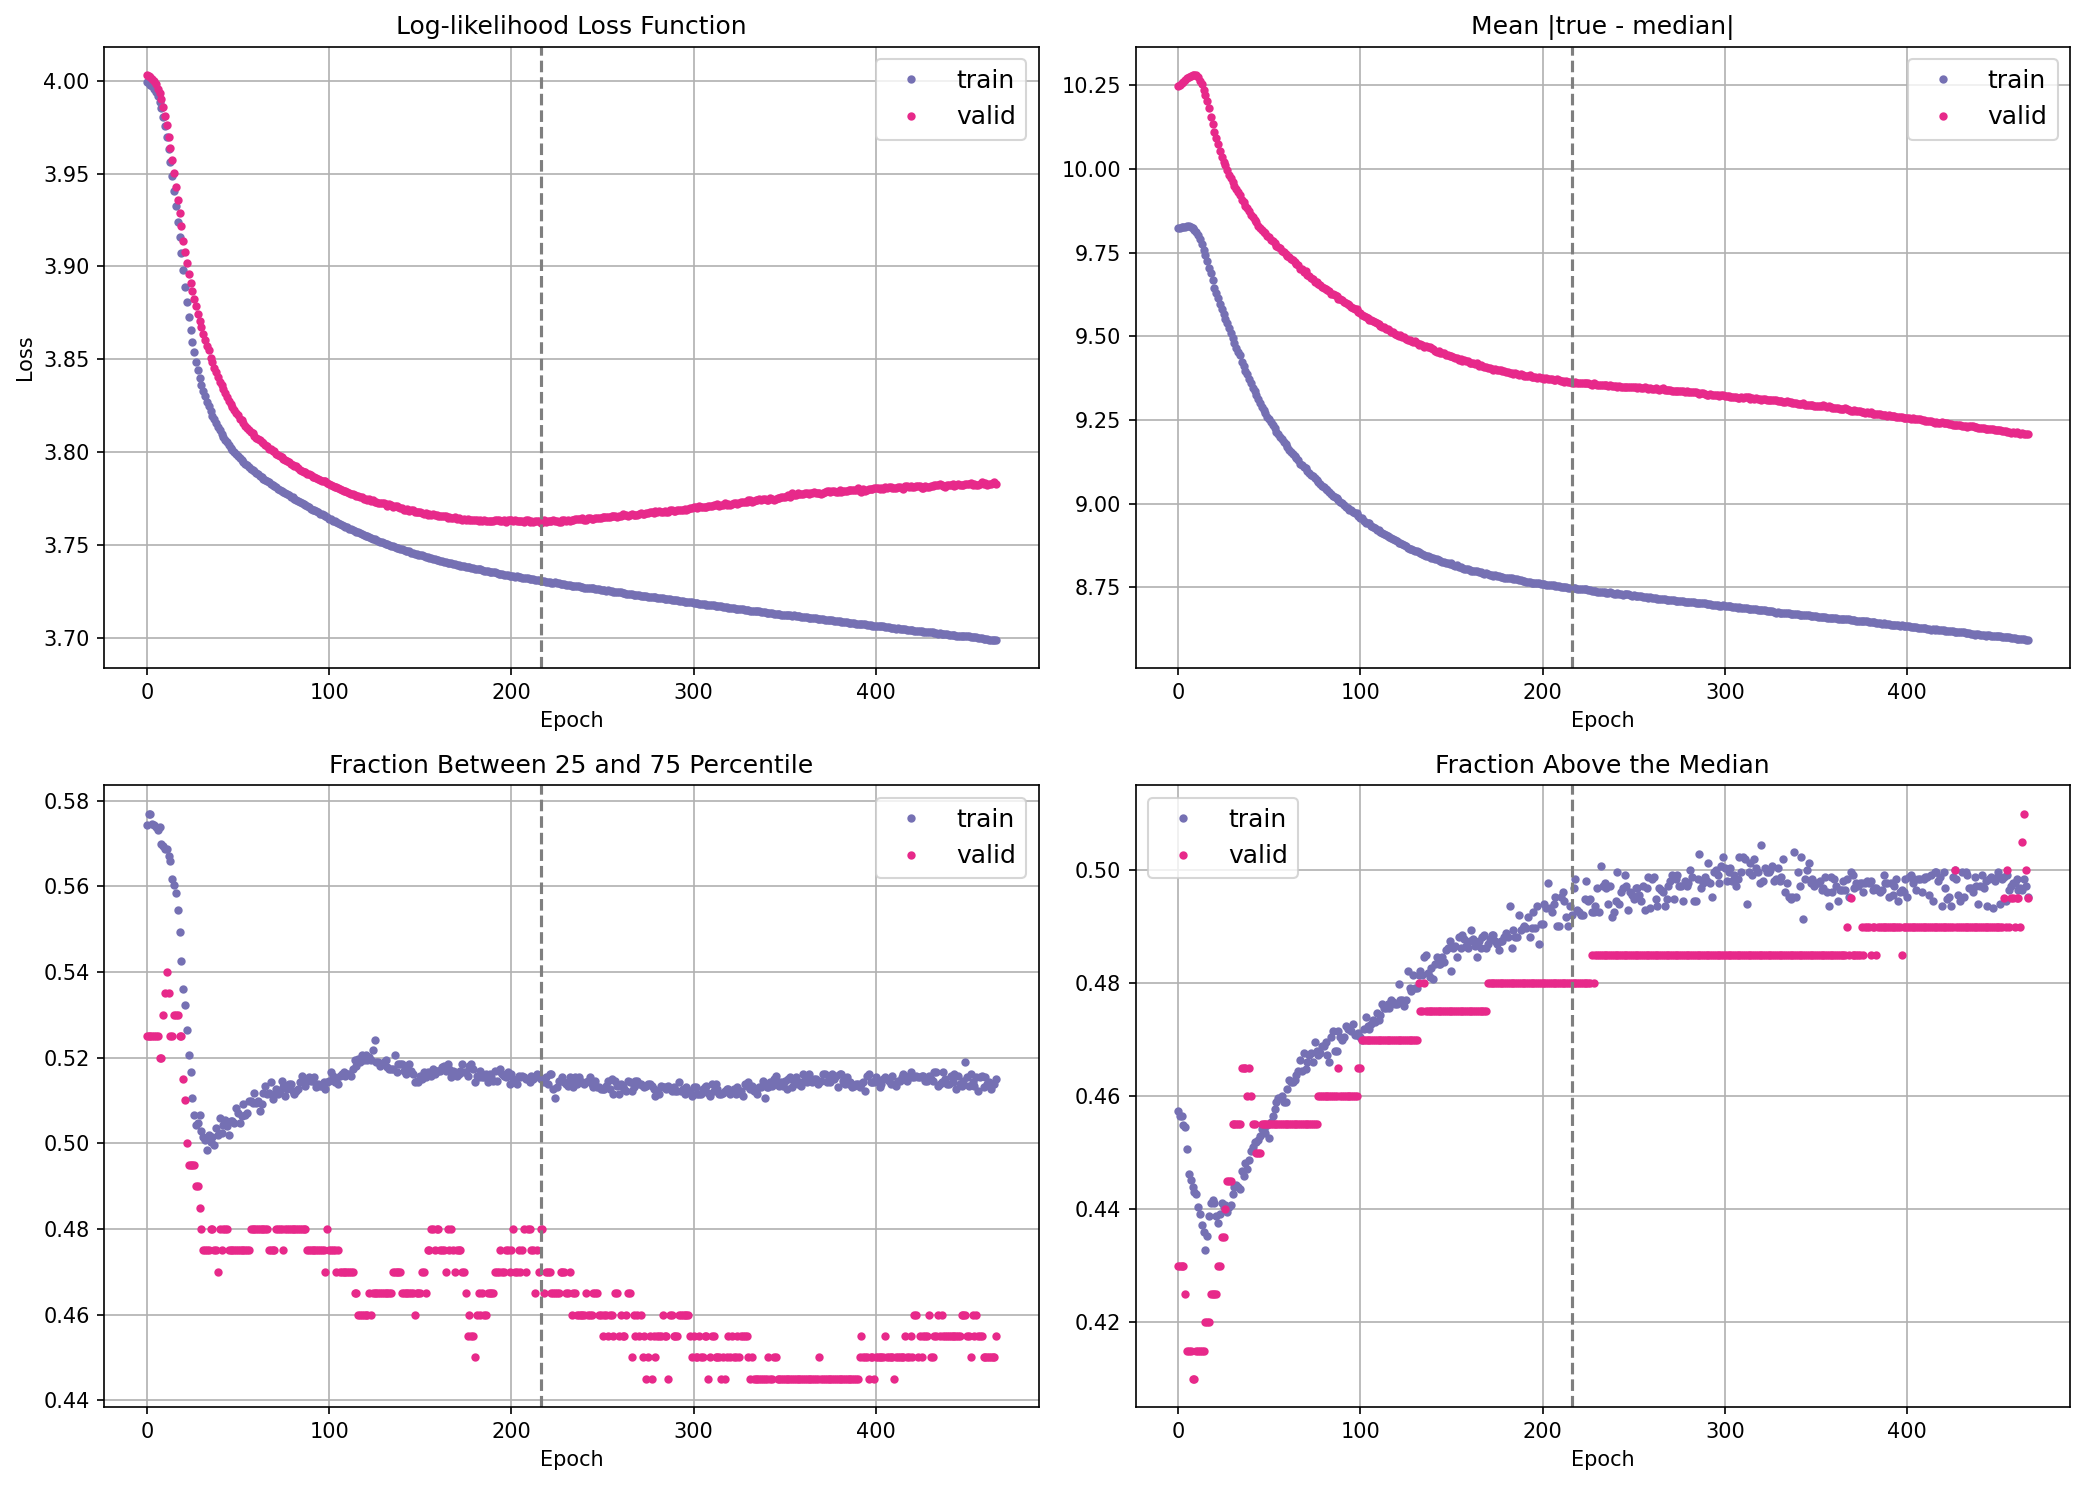

'intensity301_EPCP24_2013_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2013_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1124.
Epoch 01374: early stopping
{'best_epoch': 1123,
 'elapsed_time': 33.50587821006775,
 'loss_train': 3.6486692428588867,
 'loss_valid': 3.582202434539795,
 'network_seed': 599}


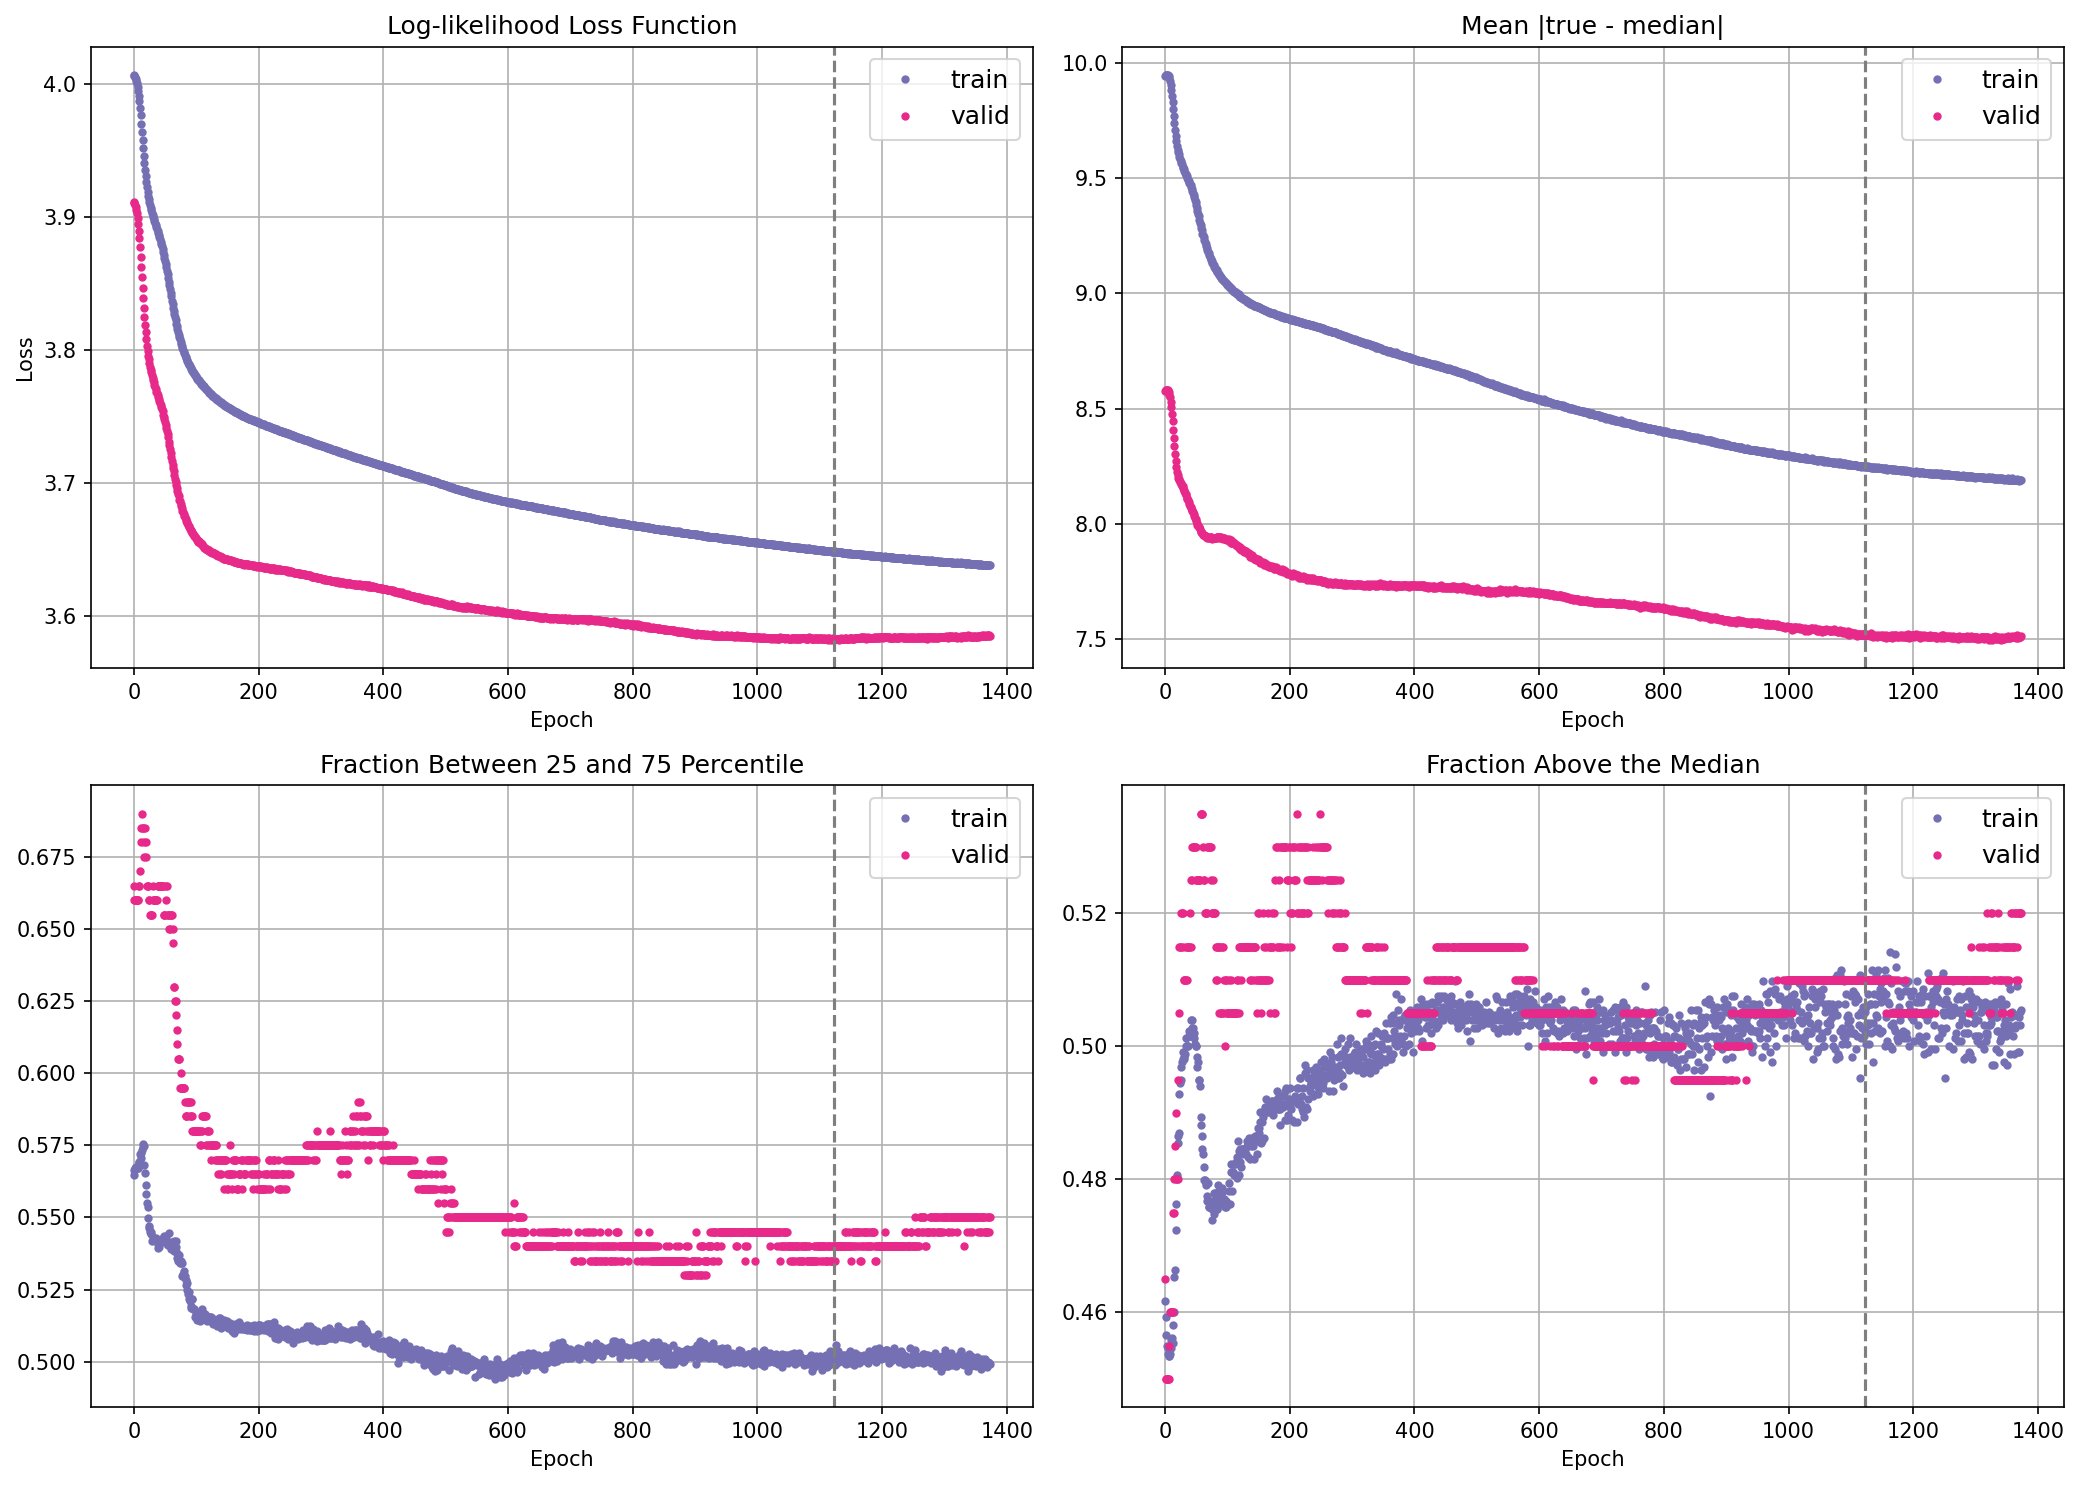

'intensity301_EPCP24_2013_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2014_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2014_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 724.
Epoch 00974: early stopping
{'best_epoch': 723,
 'elapsed_time': 23.878222703933716,
 'loss_train': 3.7052009105682373,
 'loss_valid': 3.77665376663208,
 'network_seed': 333}


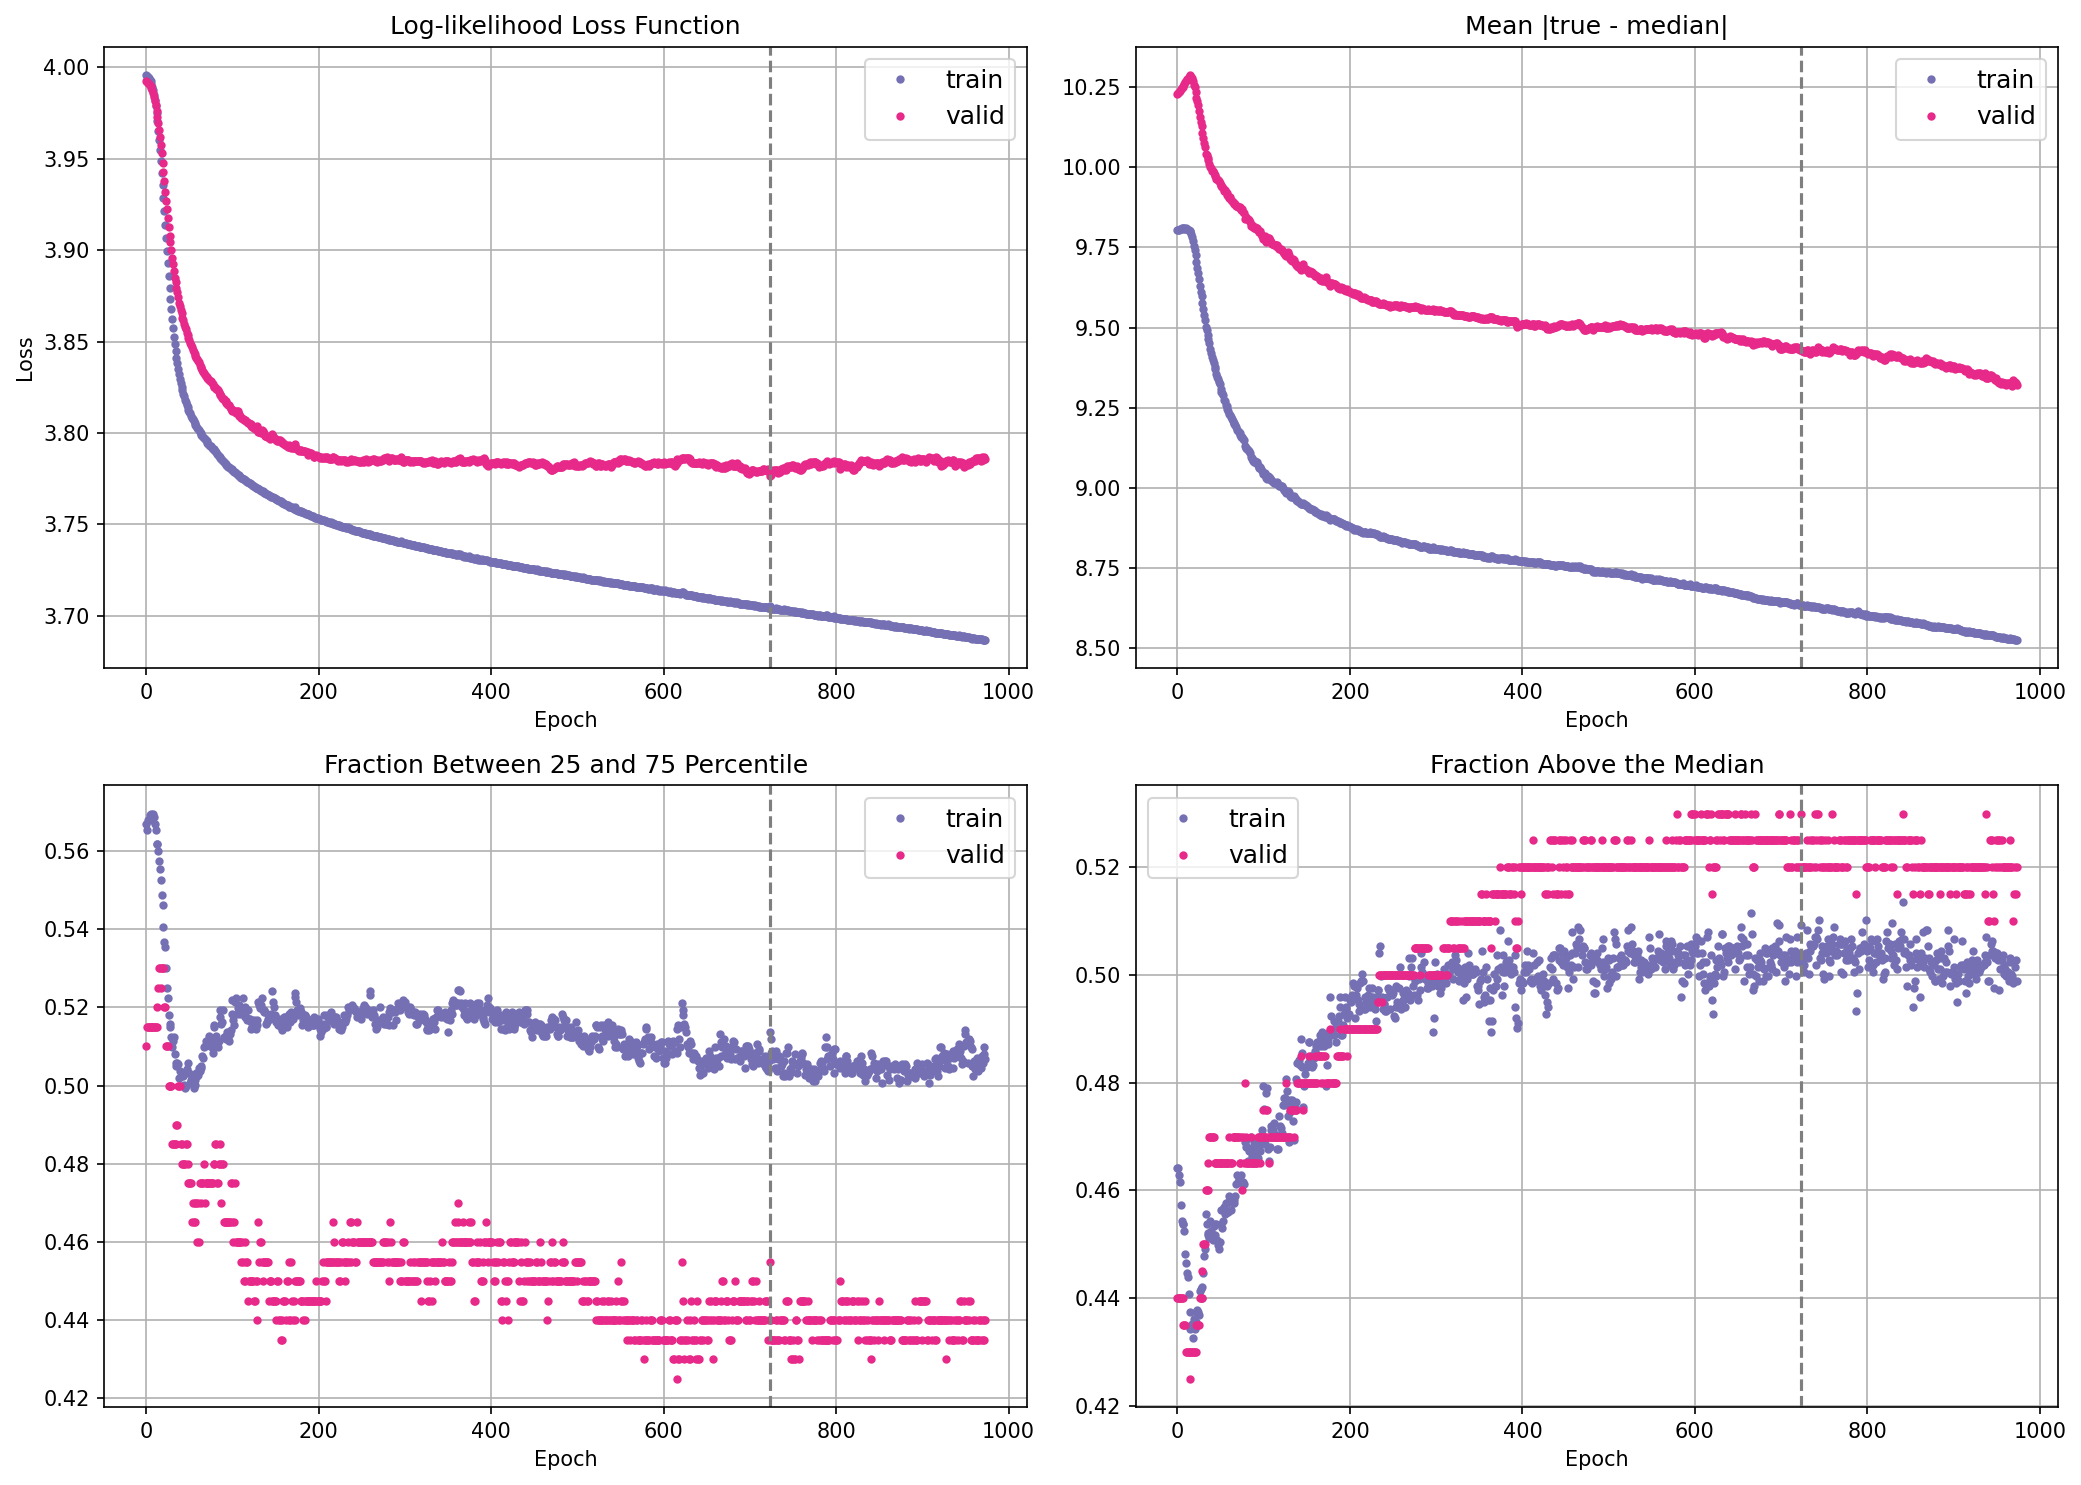

'intensity301_EPCP24_2014_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2014_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1721.
Epoch 01971: early stopping
{'best_epoch': 1720,
 'elapsed_time': 49.87879300117493,
 'loss_train': 3.6532957553863525,
 'loss_valid': 3.5370125770568848,
 'network_seed': 599}


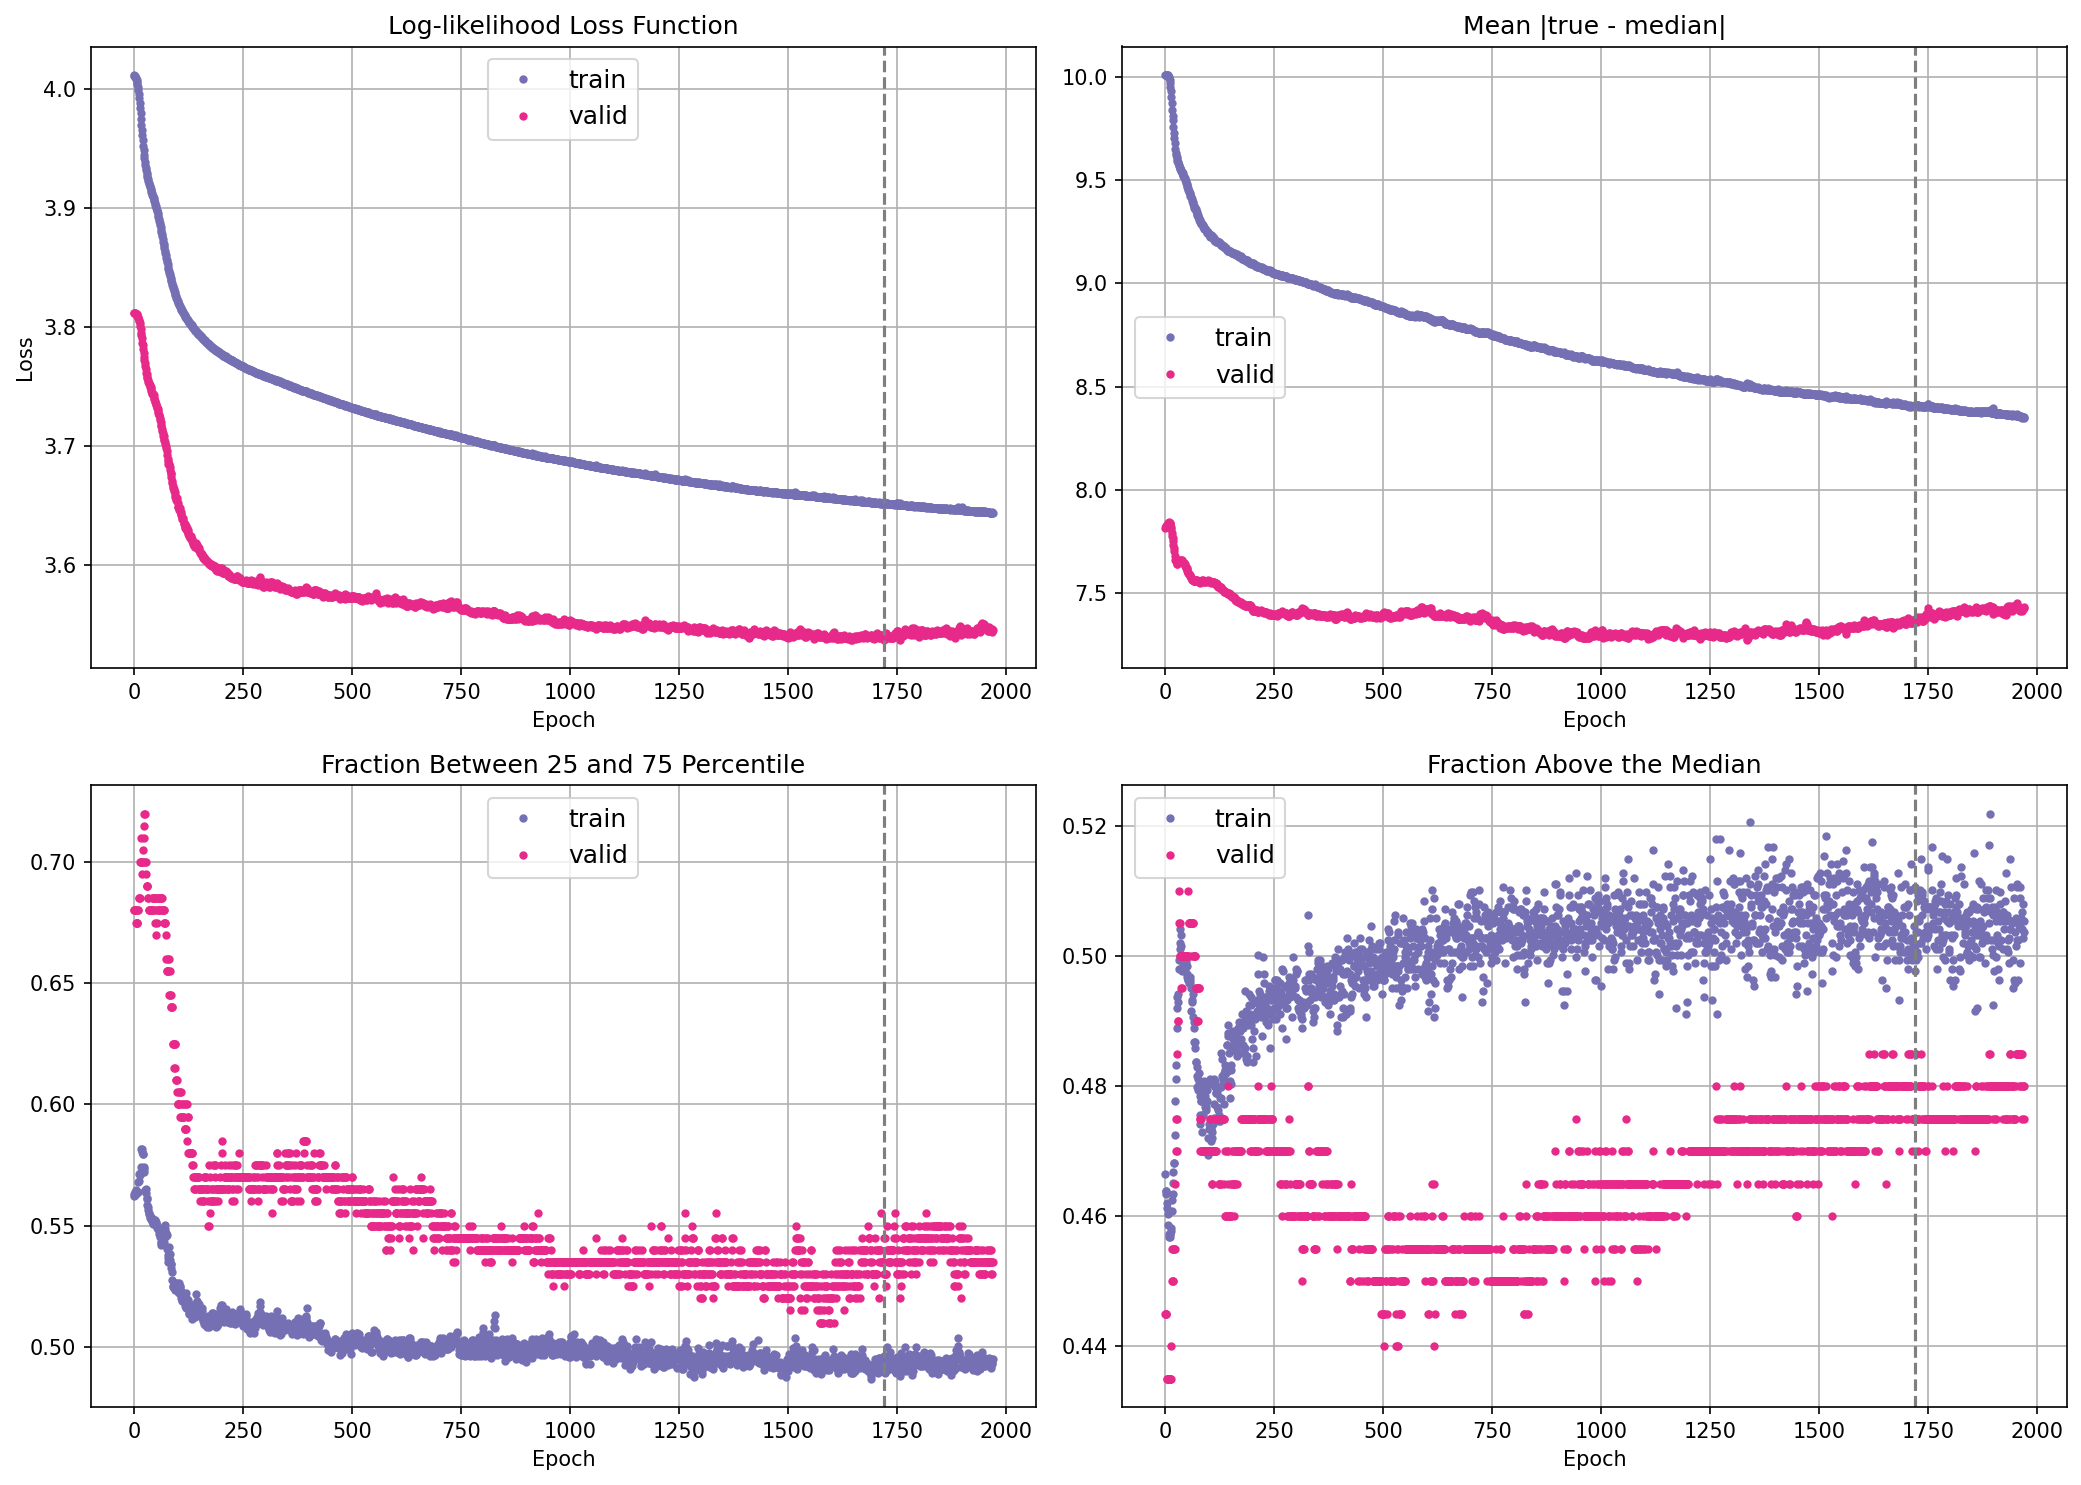

'intensity301_EPCP24_2014_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2015_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2015_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 1059.
Epoch 01309: early stopping
{'best_epoch': 1058,
 'elapsed_time': 32.34346389770508,
 'loss_train': 3.6541435718536377,
 'loss_valid': 3.6814181804656982,
 'network_seed': 333}


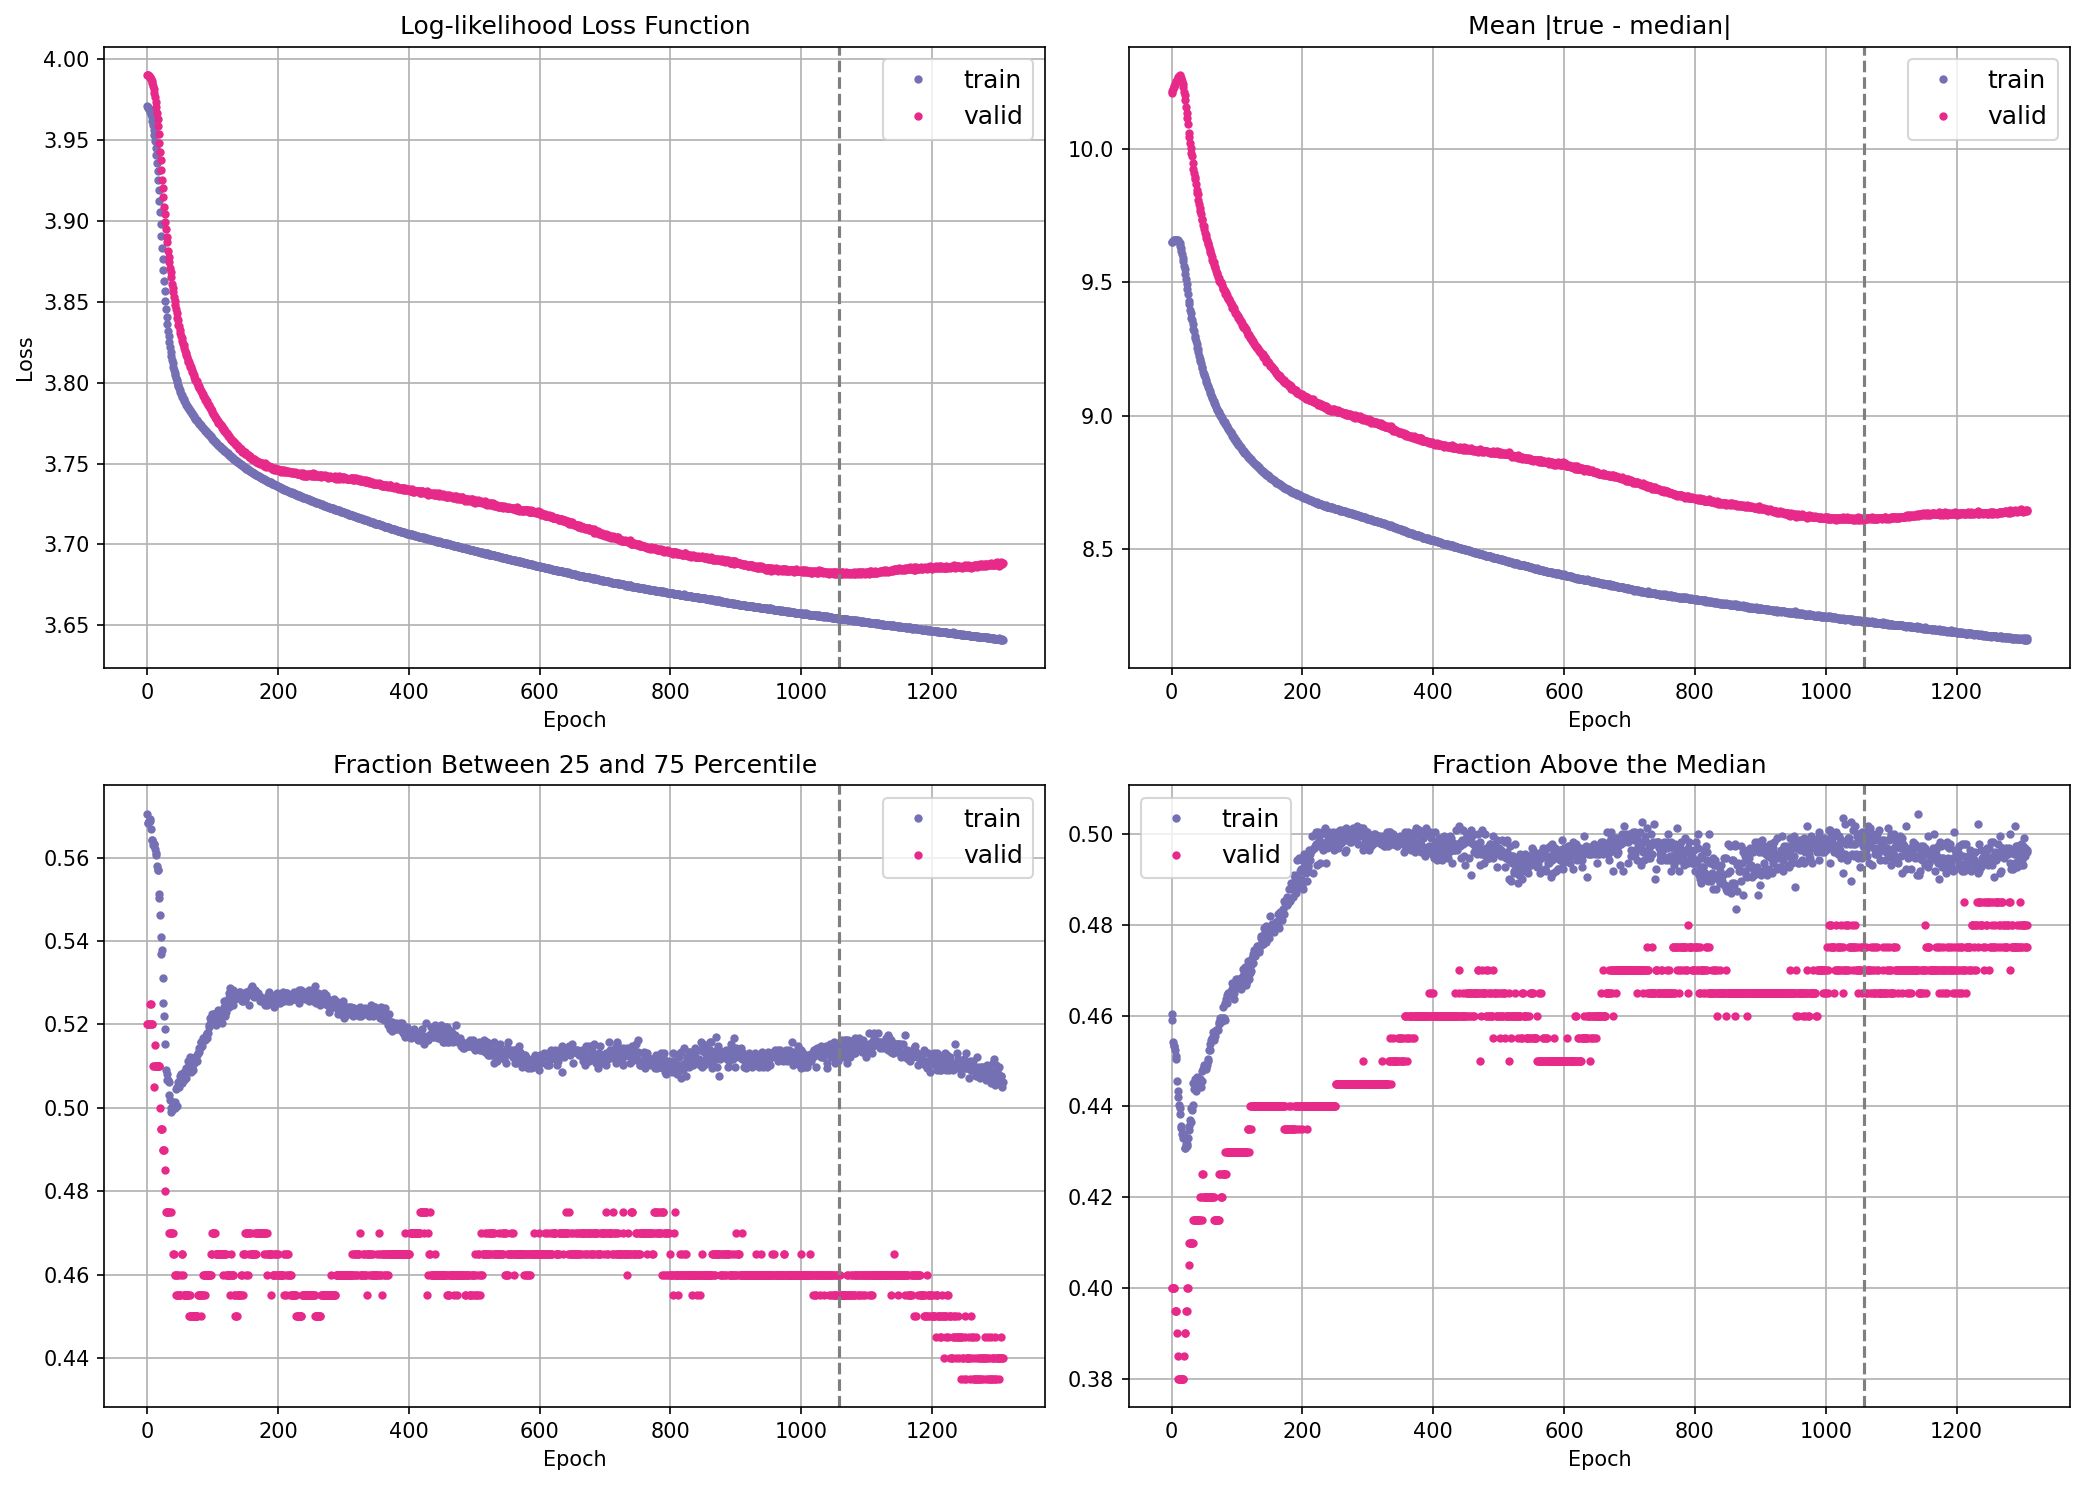

'intensity301_EPCP24_2015_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2015_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1226.
Epoch 01476: early stopping
{'best_epoch': 1225,
 'elapsed_time': 35.971200942993164,
 'loss_train': 3.640645980834961,
 'loss_valid': 3.6071698665618896,
 'network_seed': 599}


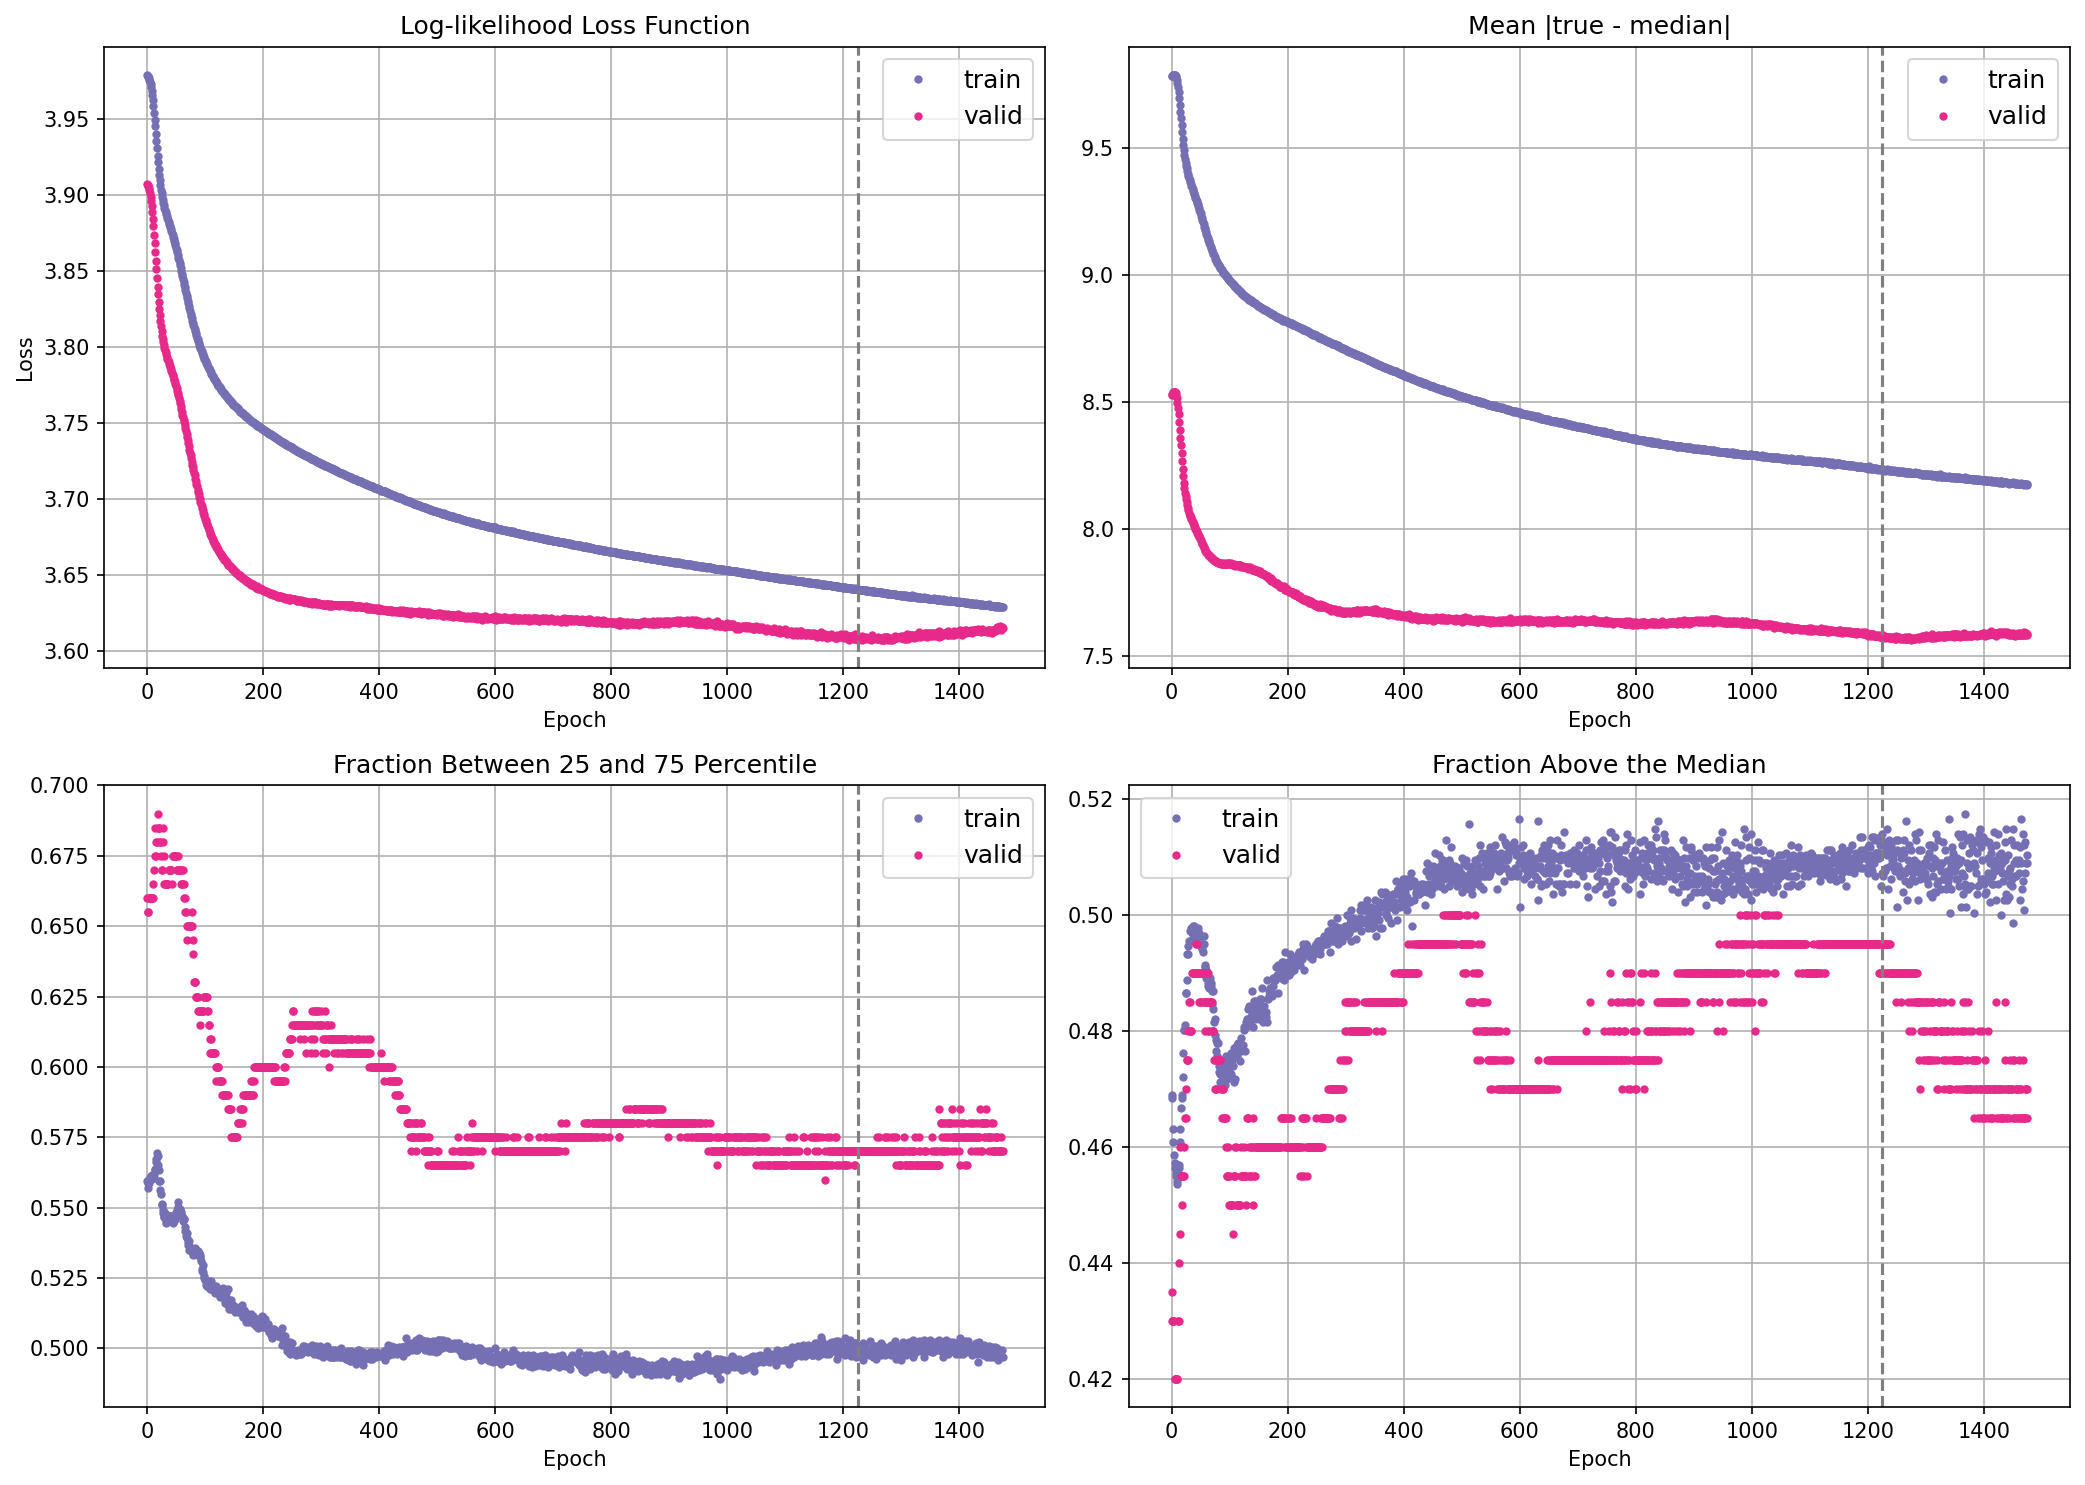

'intensity301_EPCP24_2015_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2016_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2016_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 1297.
Epoch 01547: early stopping
{'best_epoch': 1296,
 'elapsed_time': 39.96475791931152,
 'loss_train': 3.6712119579315186,
 'loss_valid': 3.726962089538574,
 'network_seed': 333}


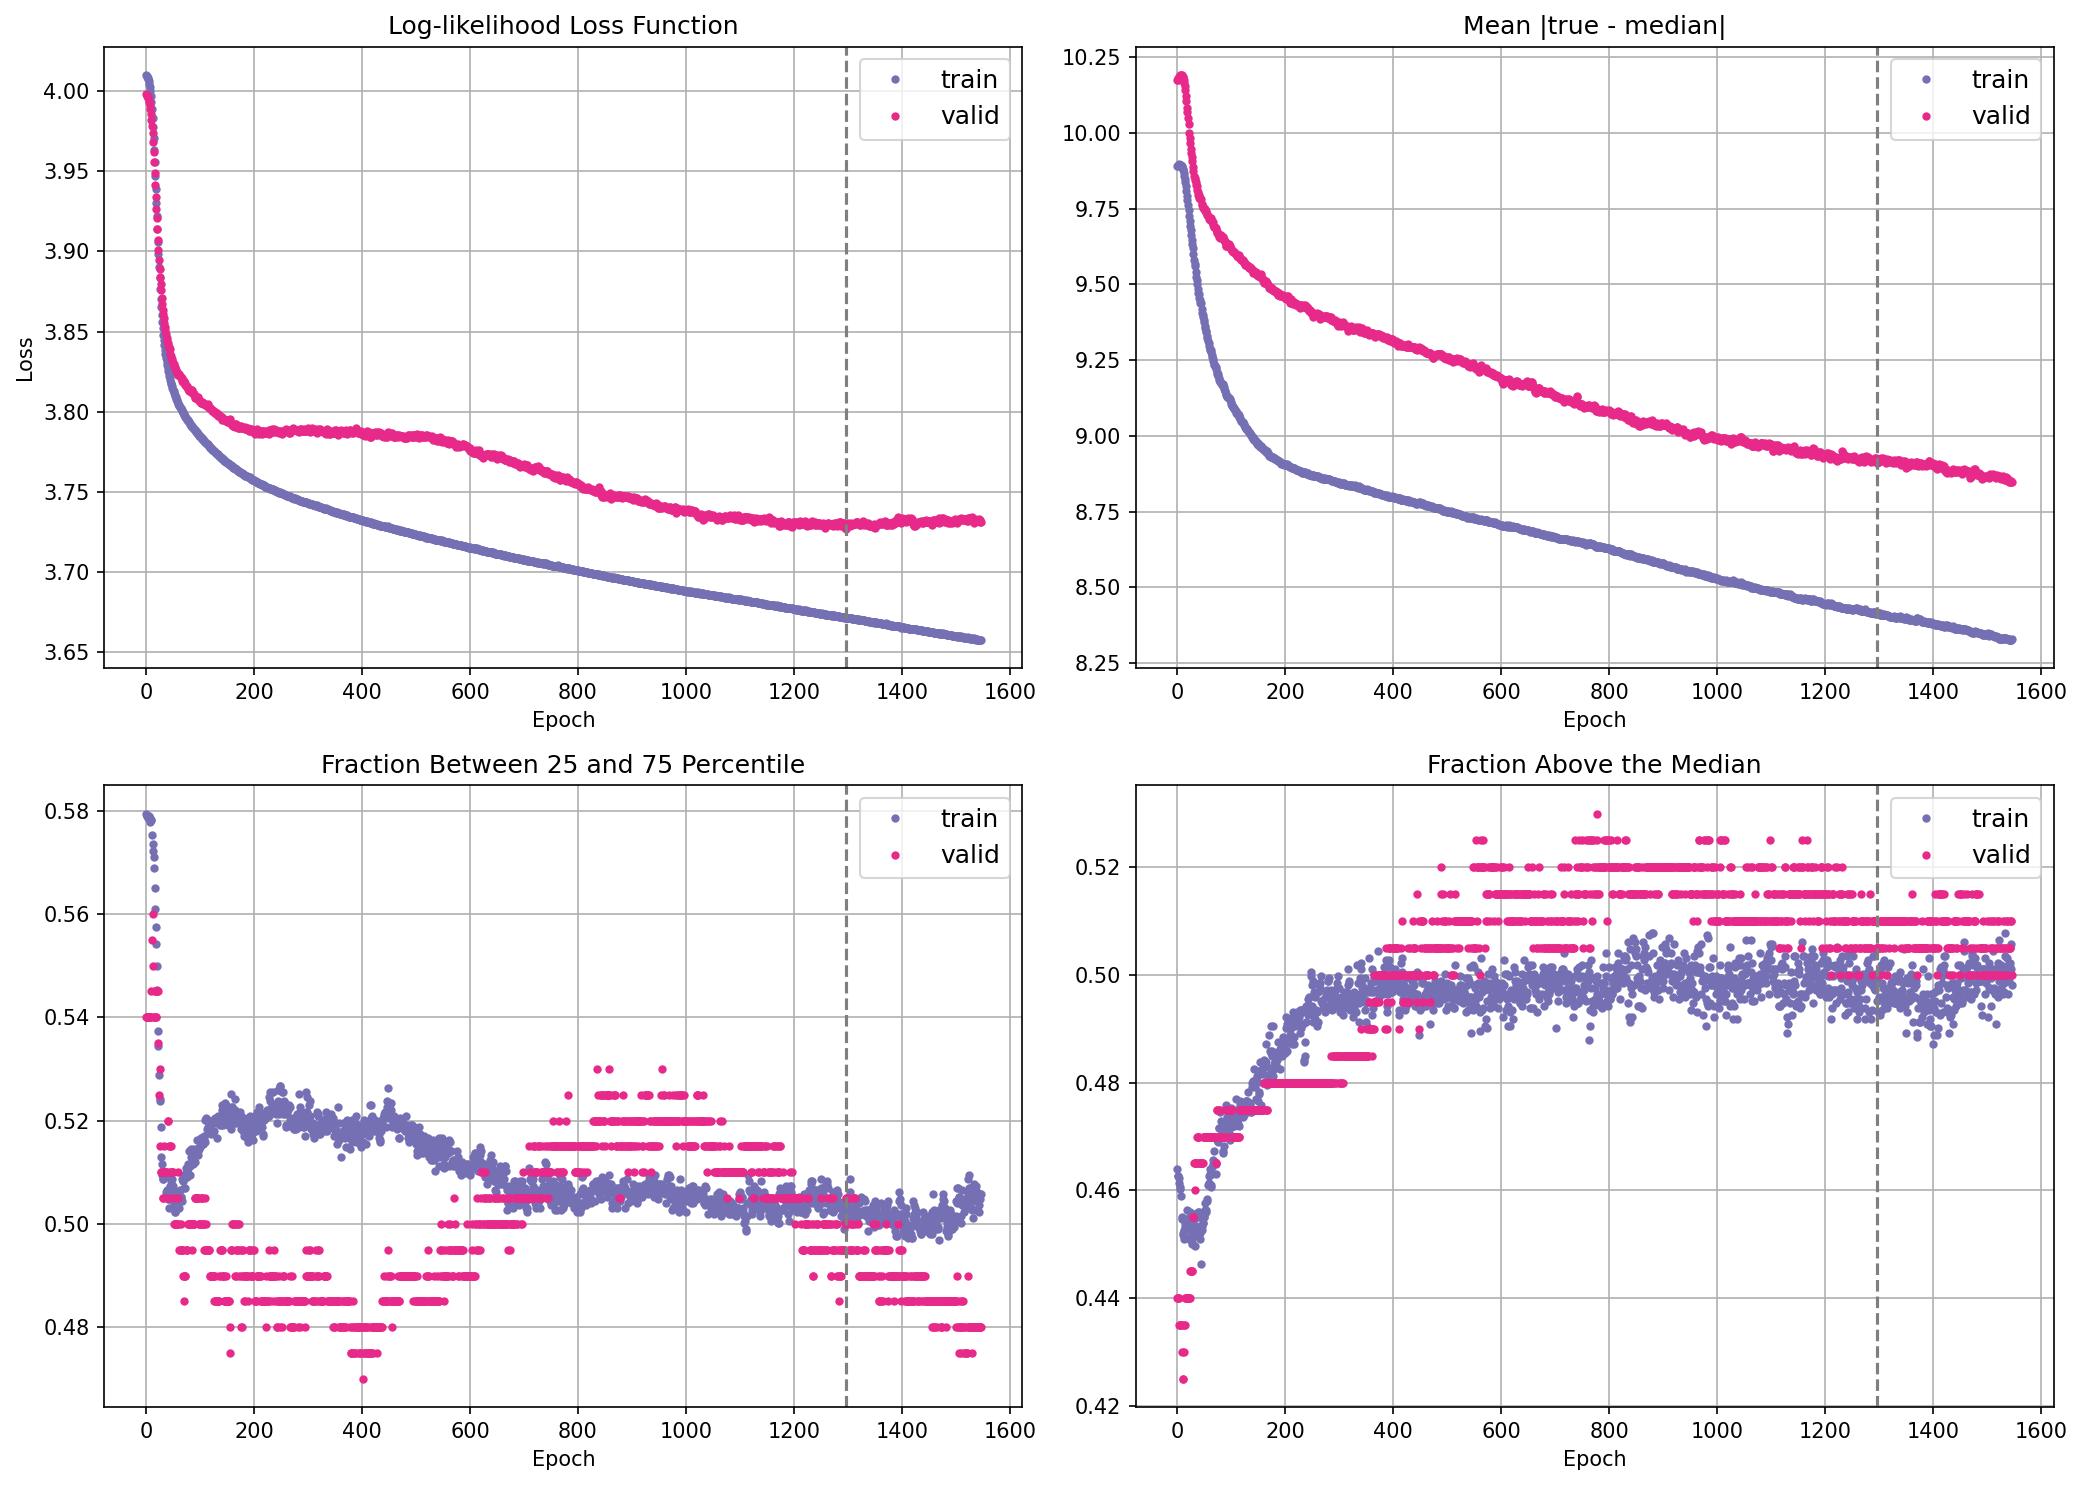

'intensity301_EPCP24_2016_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2016_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 594.
Epoch 00844: early stopping
{'best_epoch': 593,
 'elapsed_time': 21.96651816368103,
 'loss_train': 3.7072739601135254,
 'loss_valid': 3.617379665374756,
 'network_seed': 599}


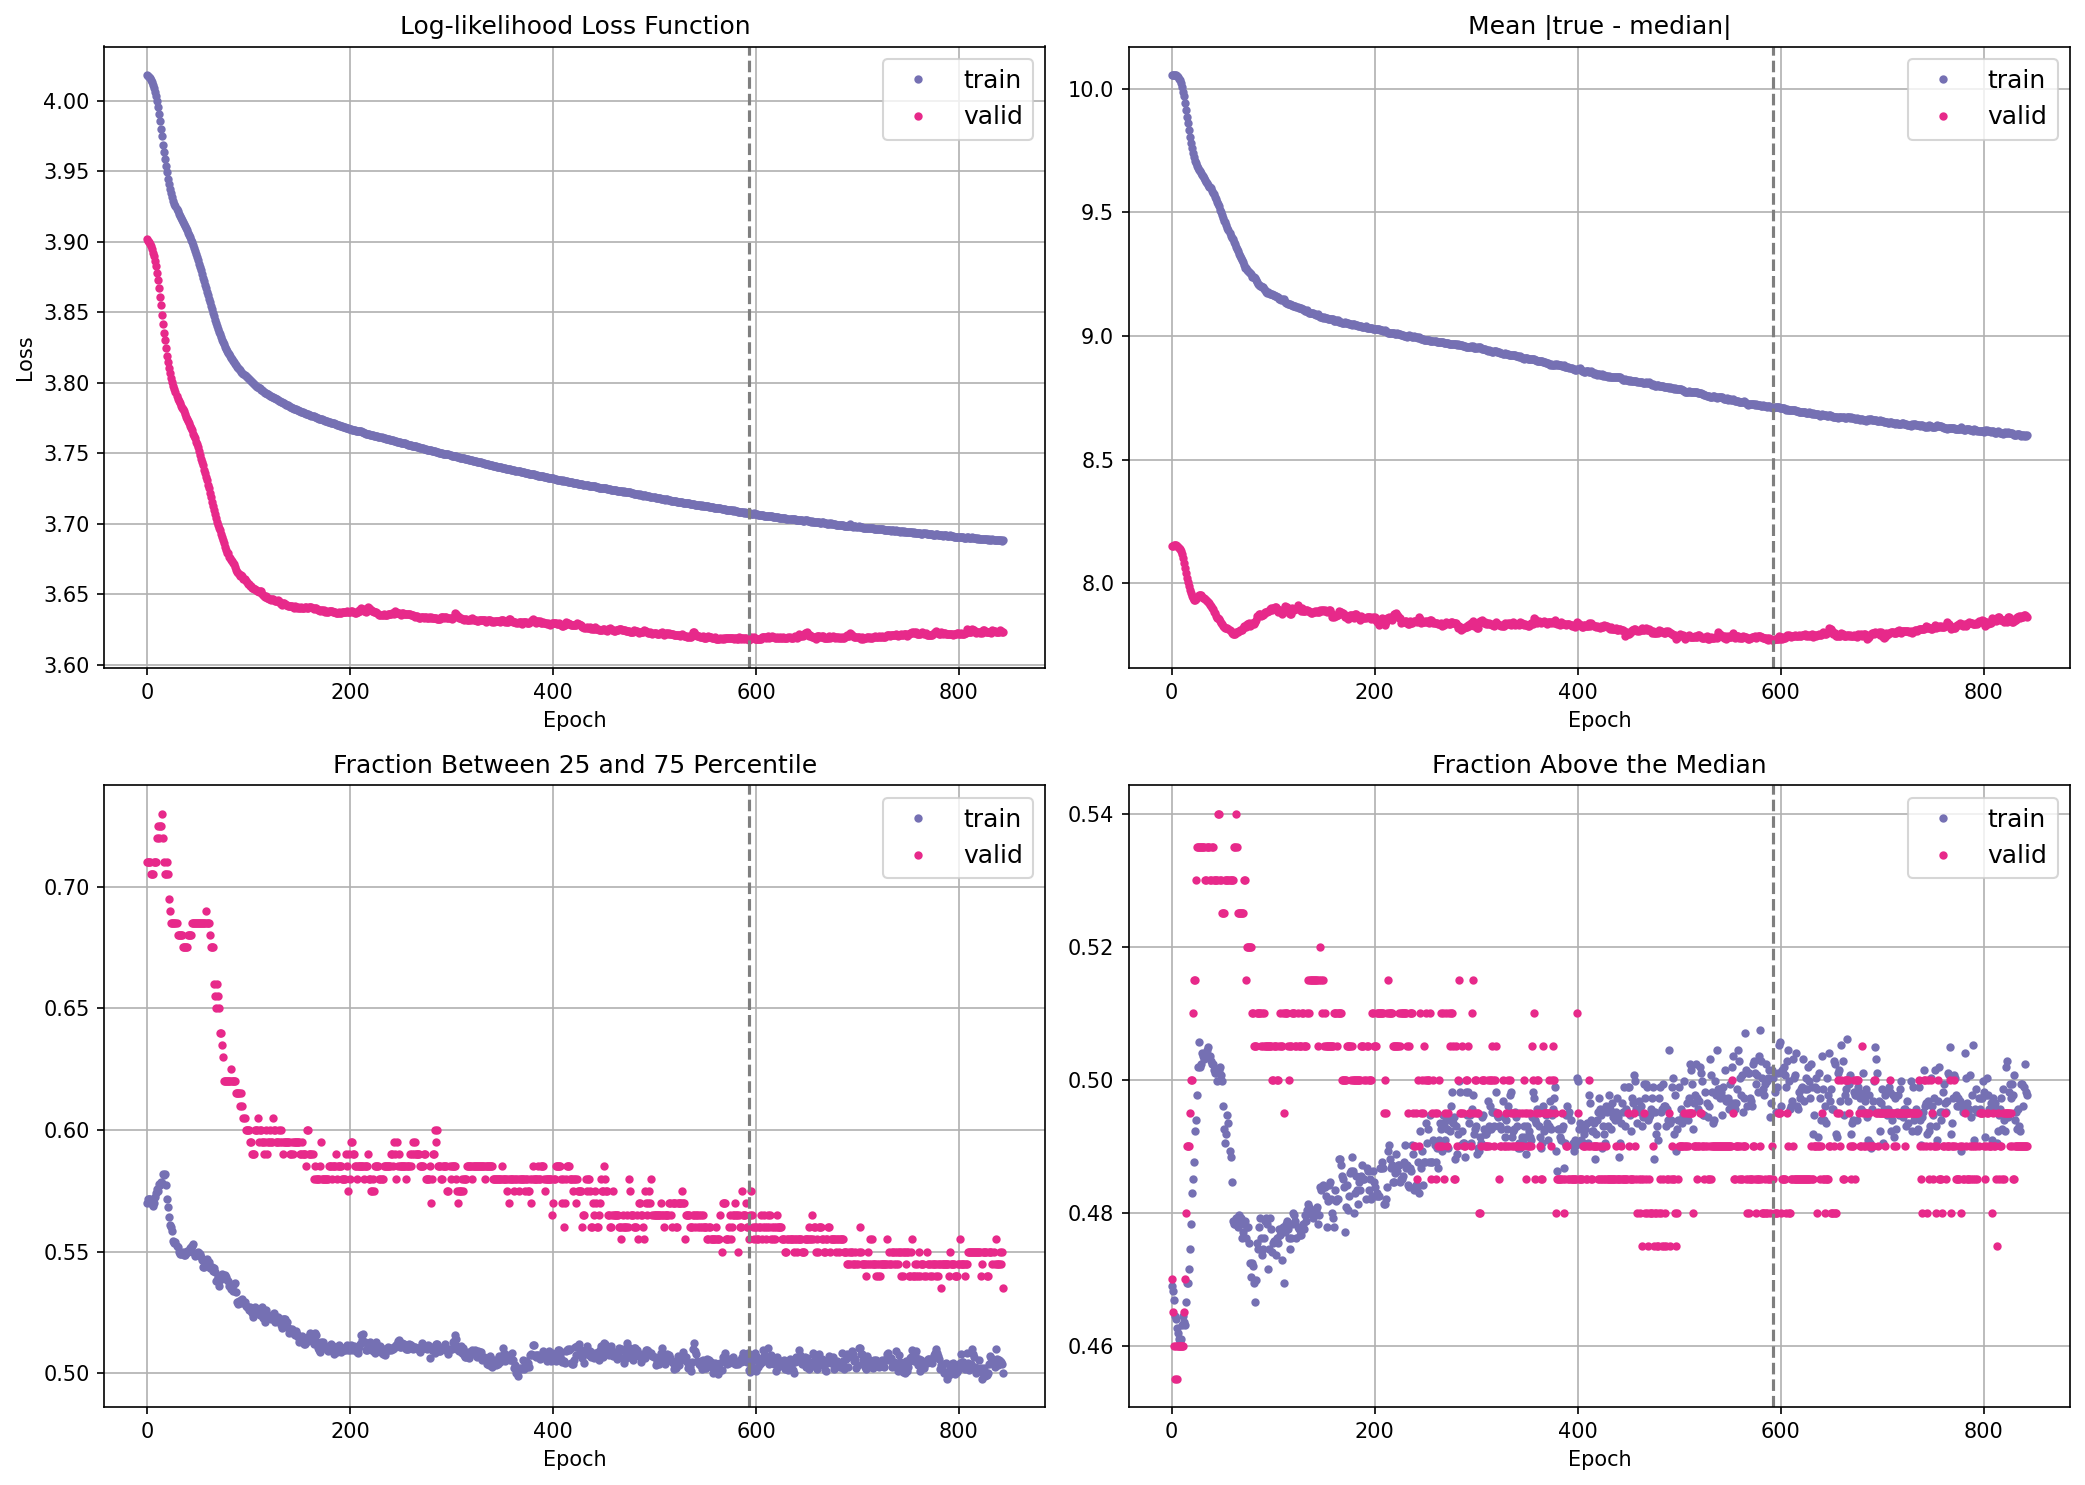

'intensity301_EPCP24_2016_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2017_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2017_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 752.
Epoch 01002: early stopping
{'best_epoch': 751,
 'elapsed_time': 26.882480144500732,
 'loss_train': 3.693556785583496,
 'loss_valid': 3.732556104660034,
 'network_seed': 333}


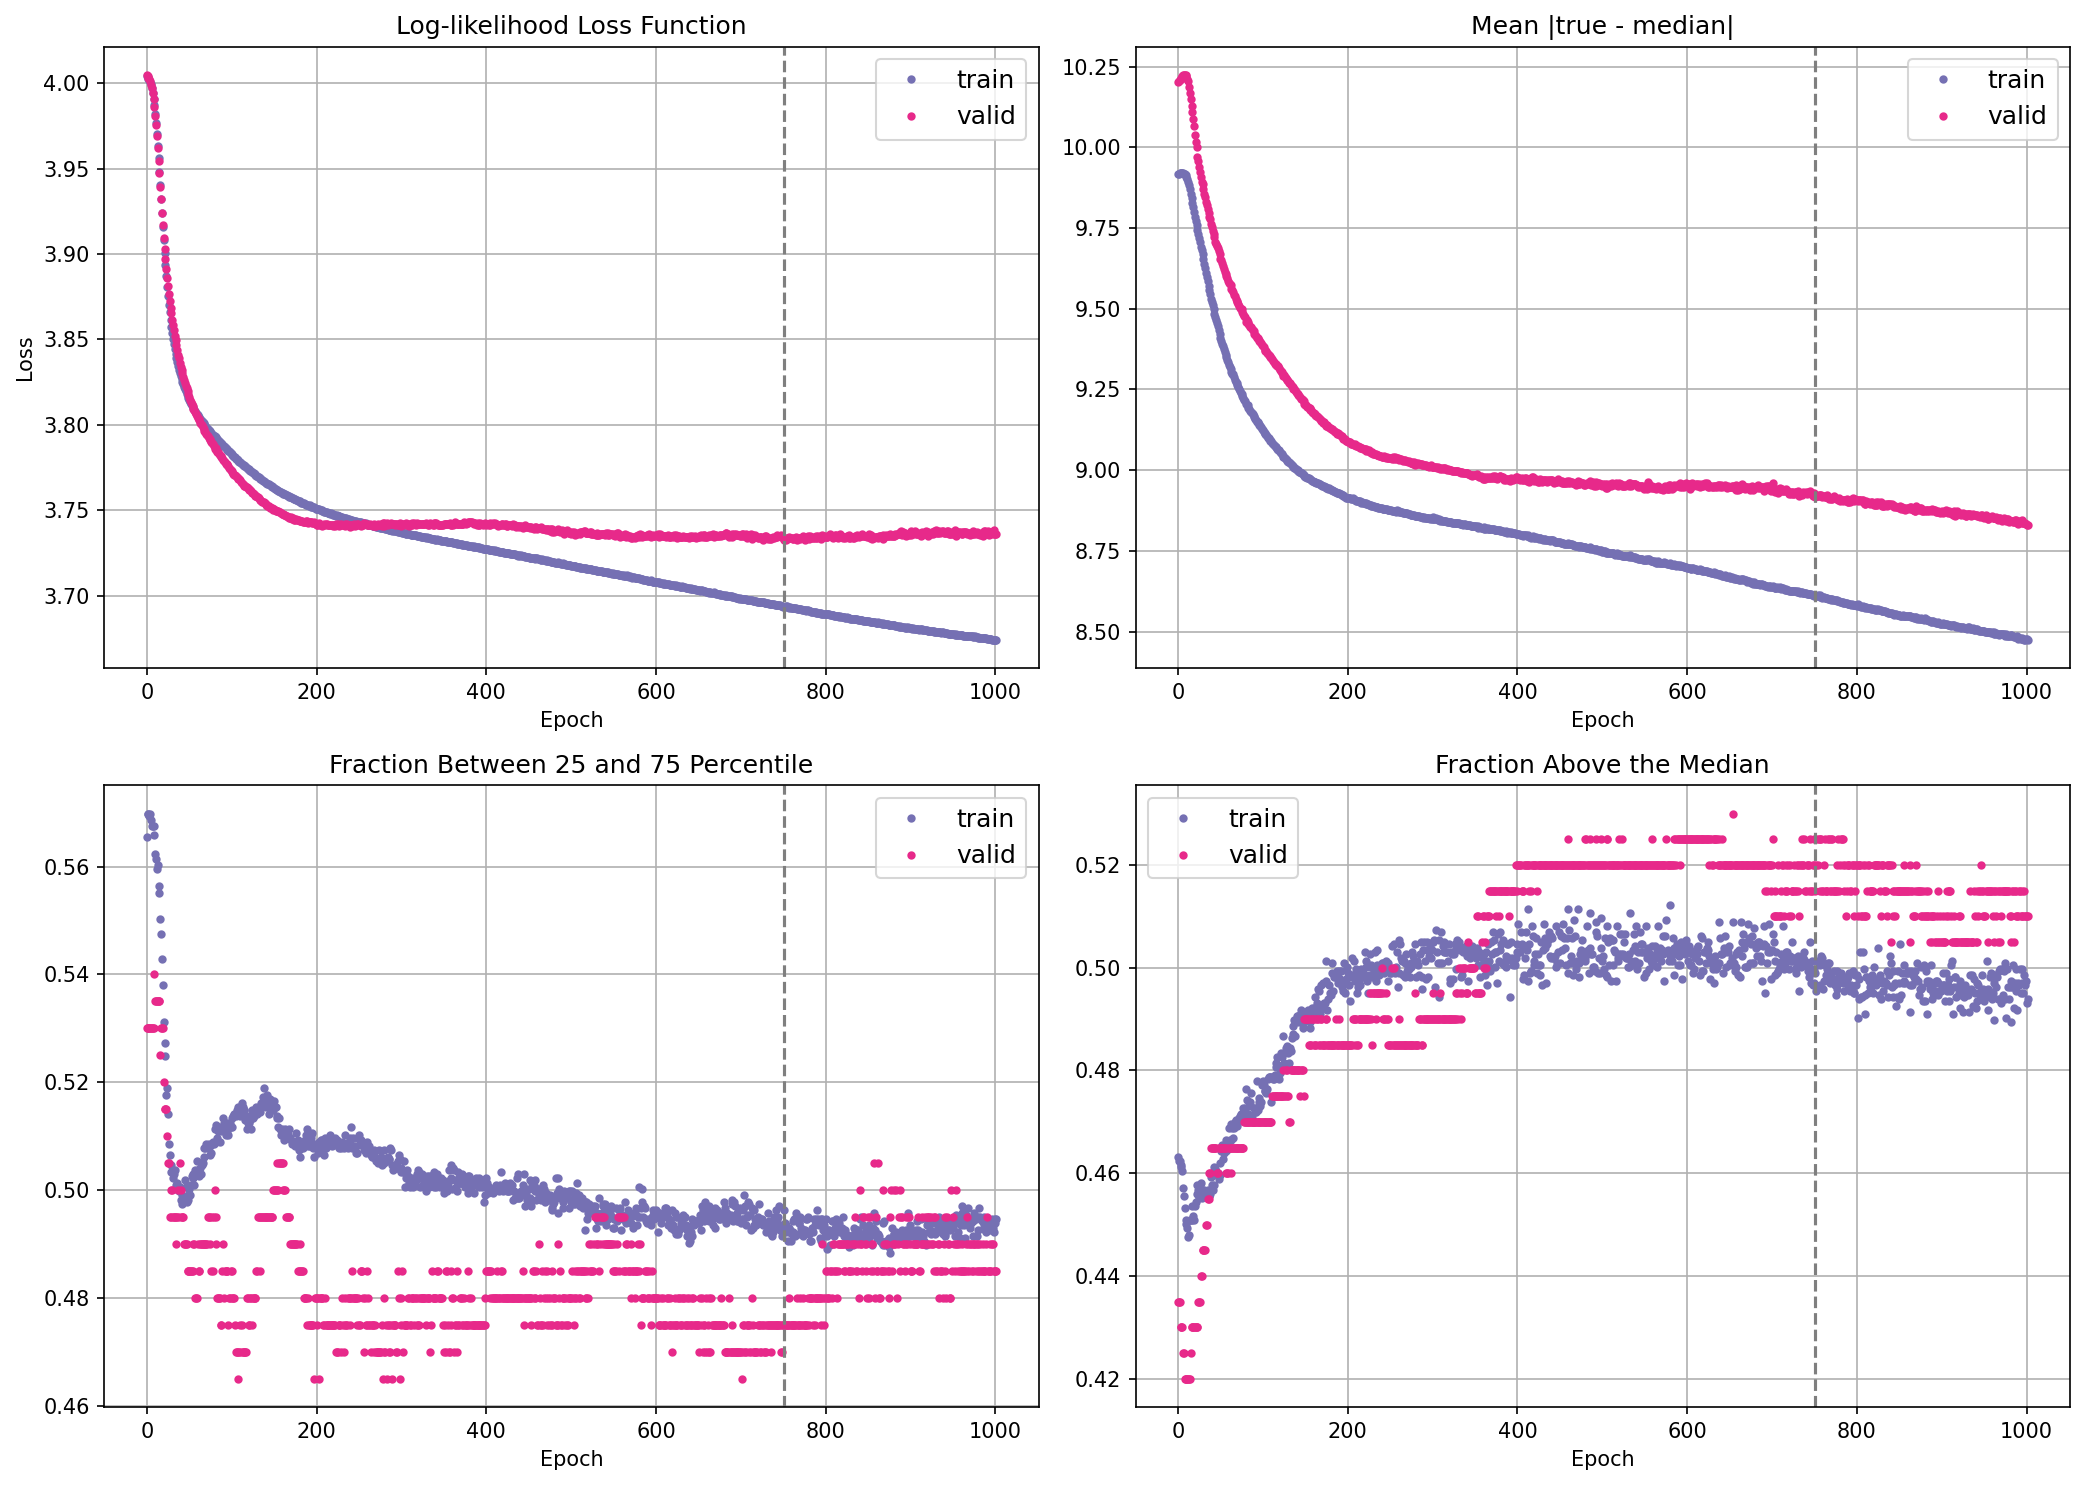

'intensity301_EPCP24_2017_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2017_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 523.
Epoch 00773: early stopping
{'best_epoch': 522,
 'elapsed_time': 20.81990671157837,
 'loss_train': 3.708357095718384,
 'loss_valid': 3.648468255996704,
 'network_seed': 599}


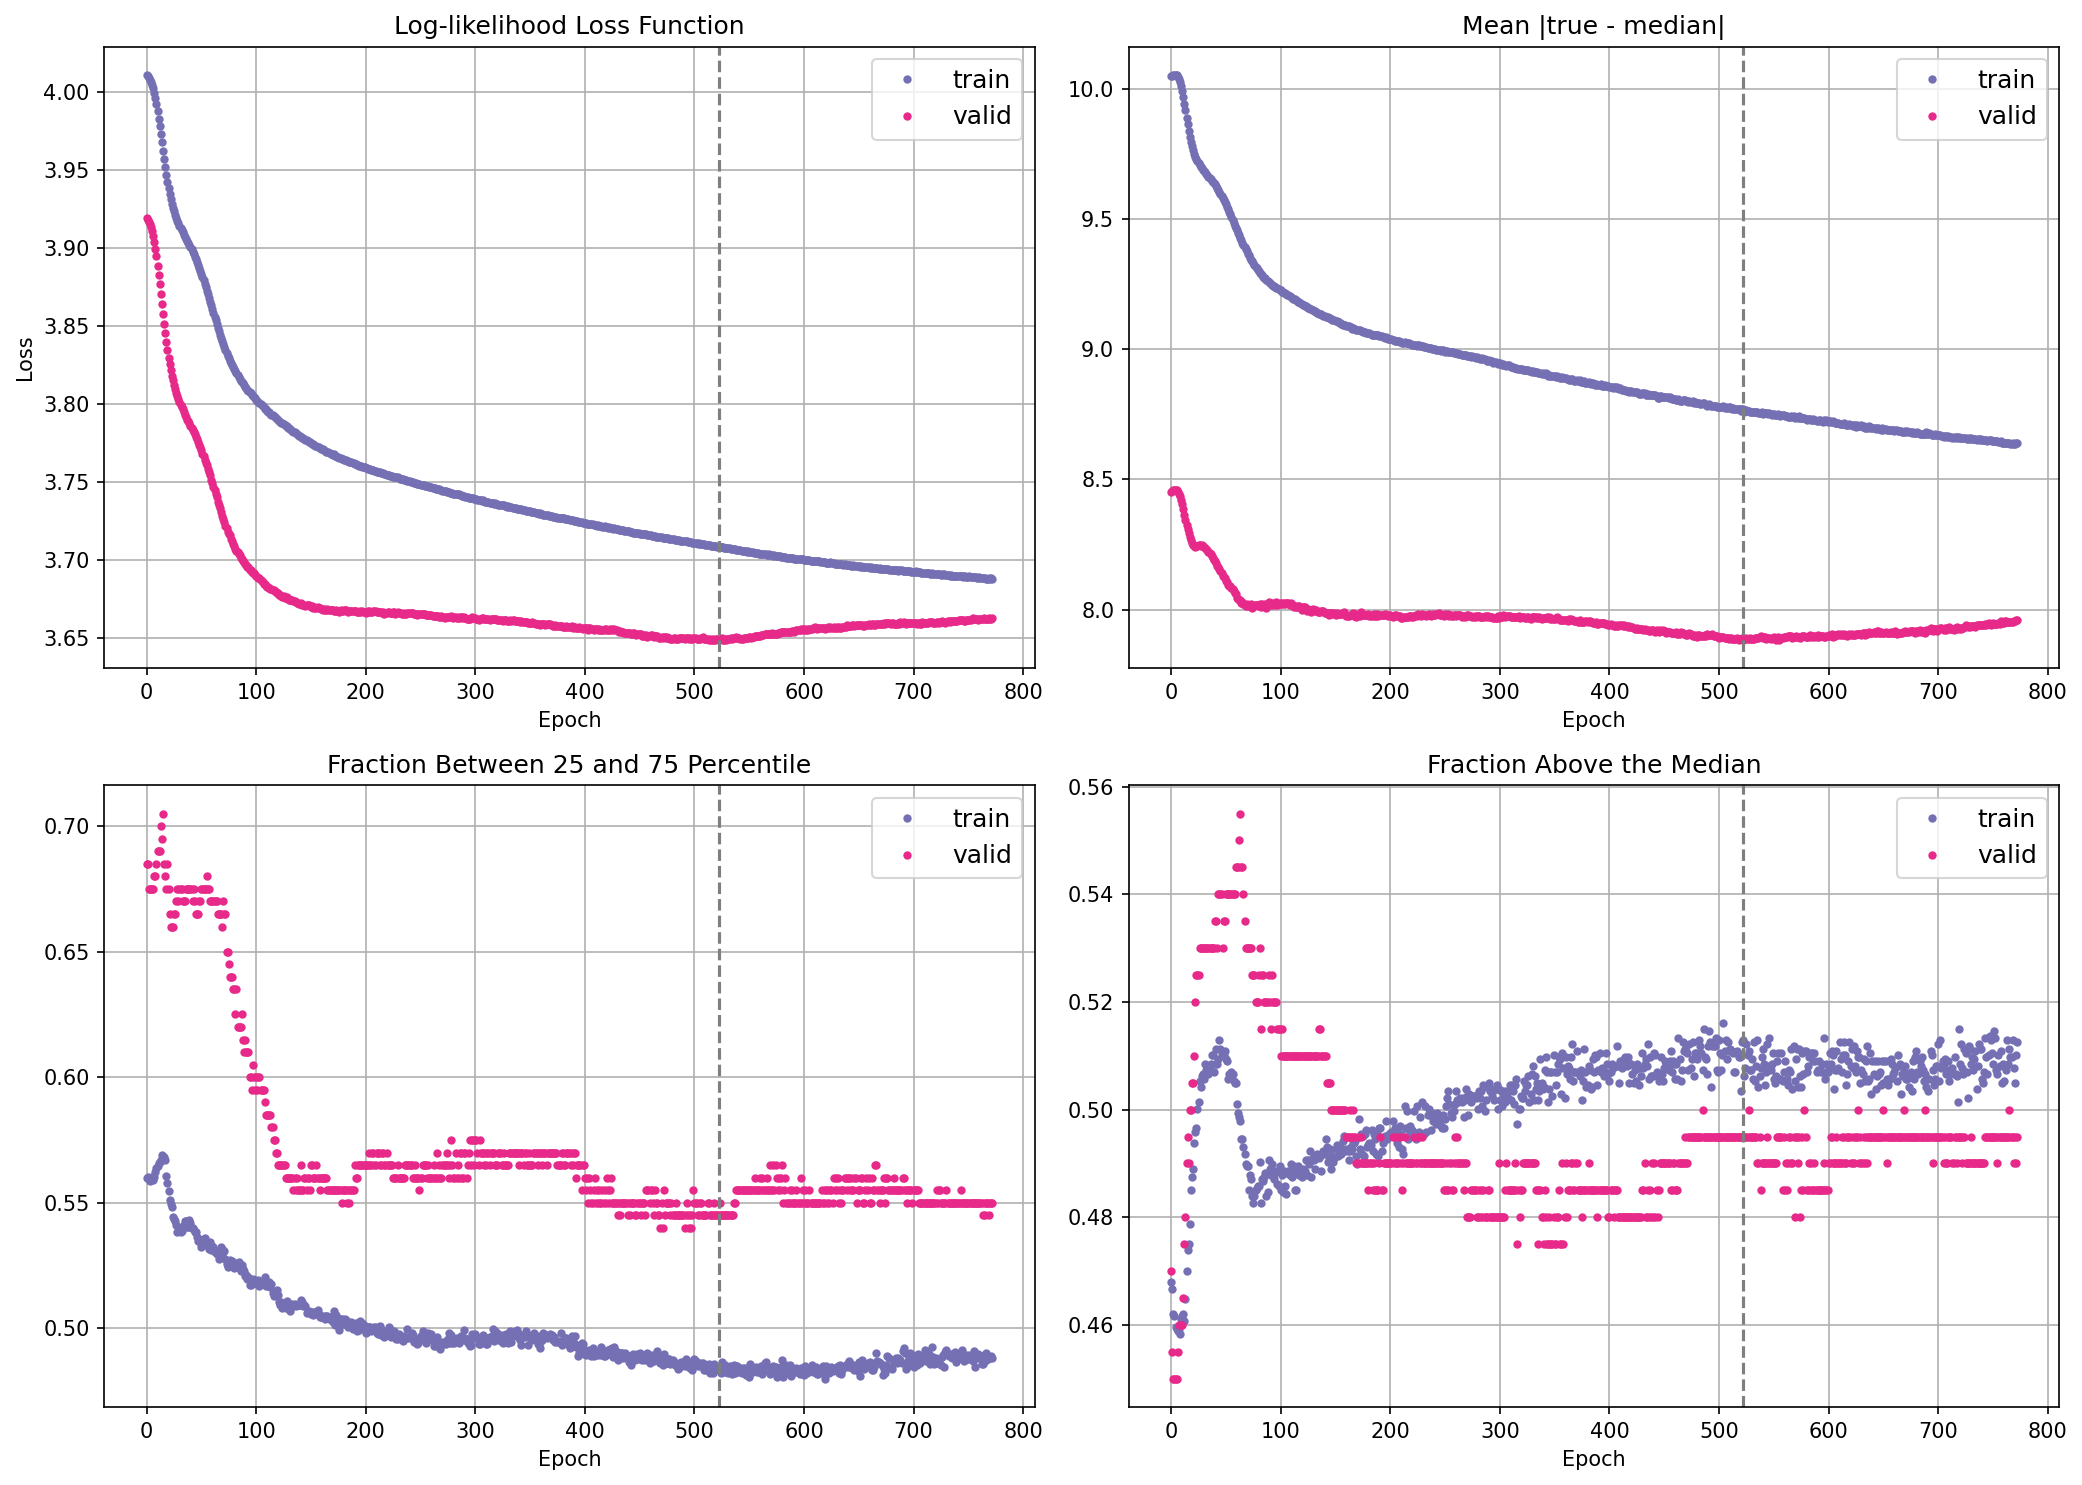

'intensity301_EPCP24_2017_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2018_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2018_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 1887.
Epoch 02137: early stopping
{'best_epoch': 1886,
 'elapsed_time': 53.0242280960083,
 'loss_train': 3.6053919792175293,
 'loss_valid': 3.7050201892852783,
 'network_seed': 333}


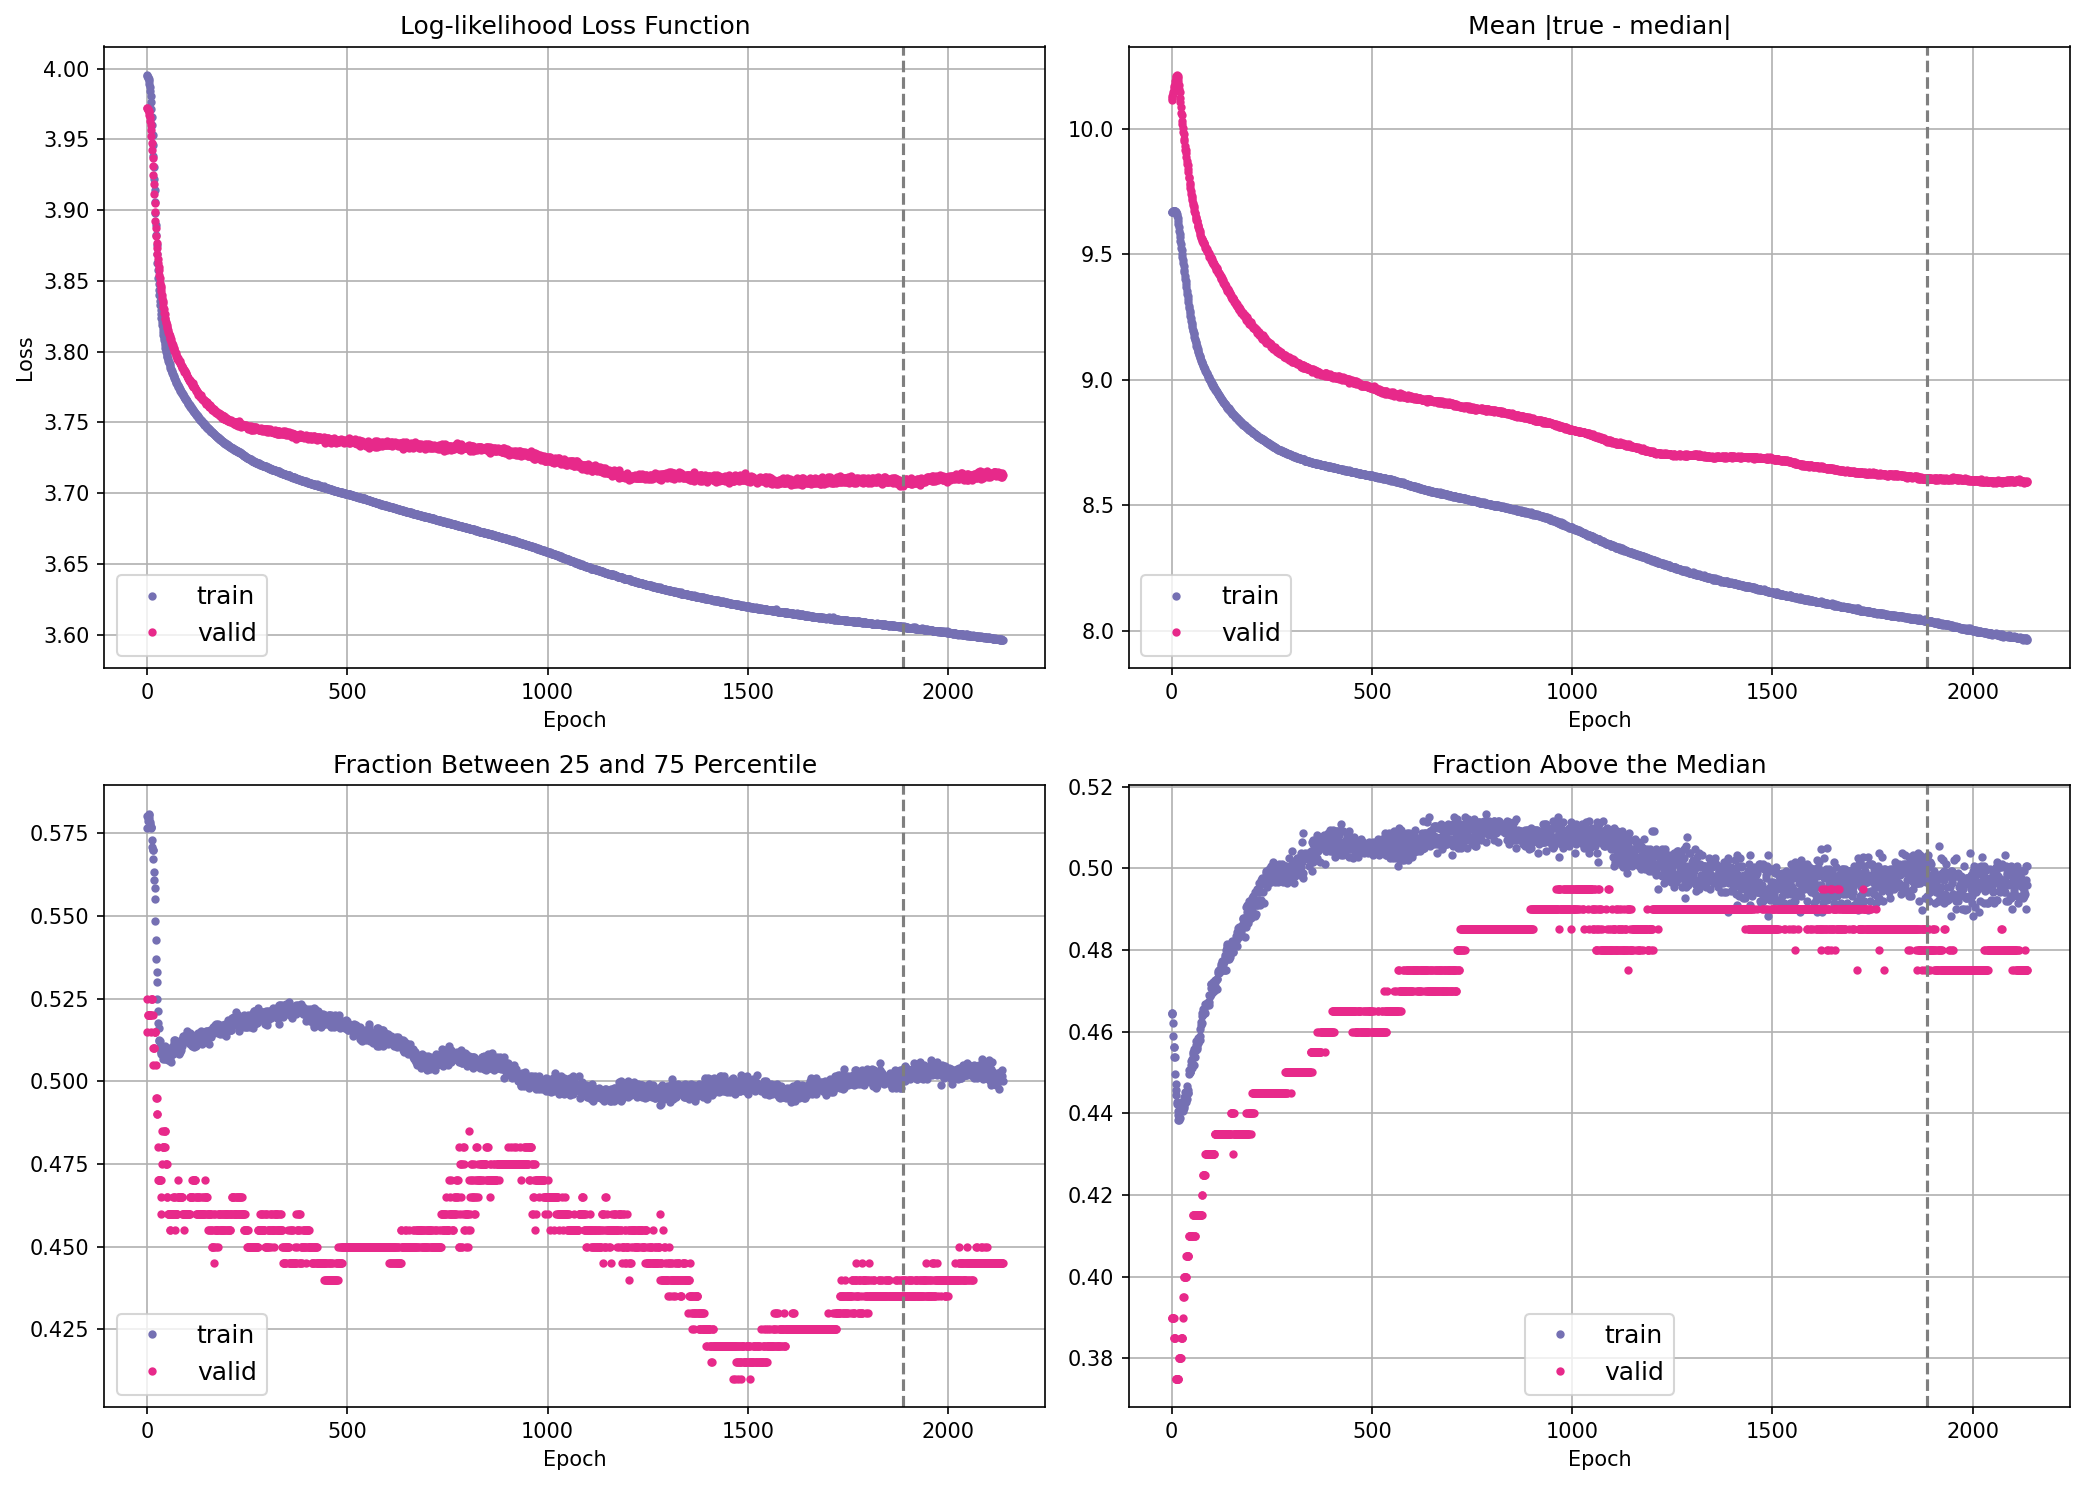

'intensity301_EPCP24_2018_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2018_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 494.
Epoch 00744: early stopping
{'best_epoch': 493,
 'elapsed_time': 19.098993062973022,
 'loss_train': 3.697643518447876,
 'loss_valid': 3.6142892837524414,
 'network_seed': 599}


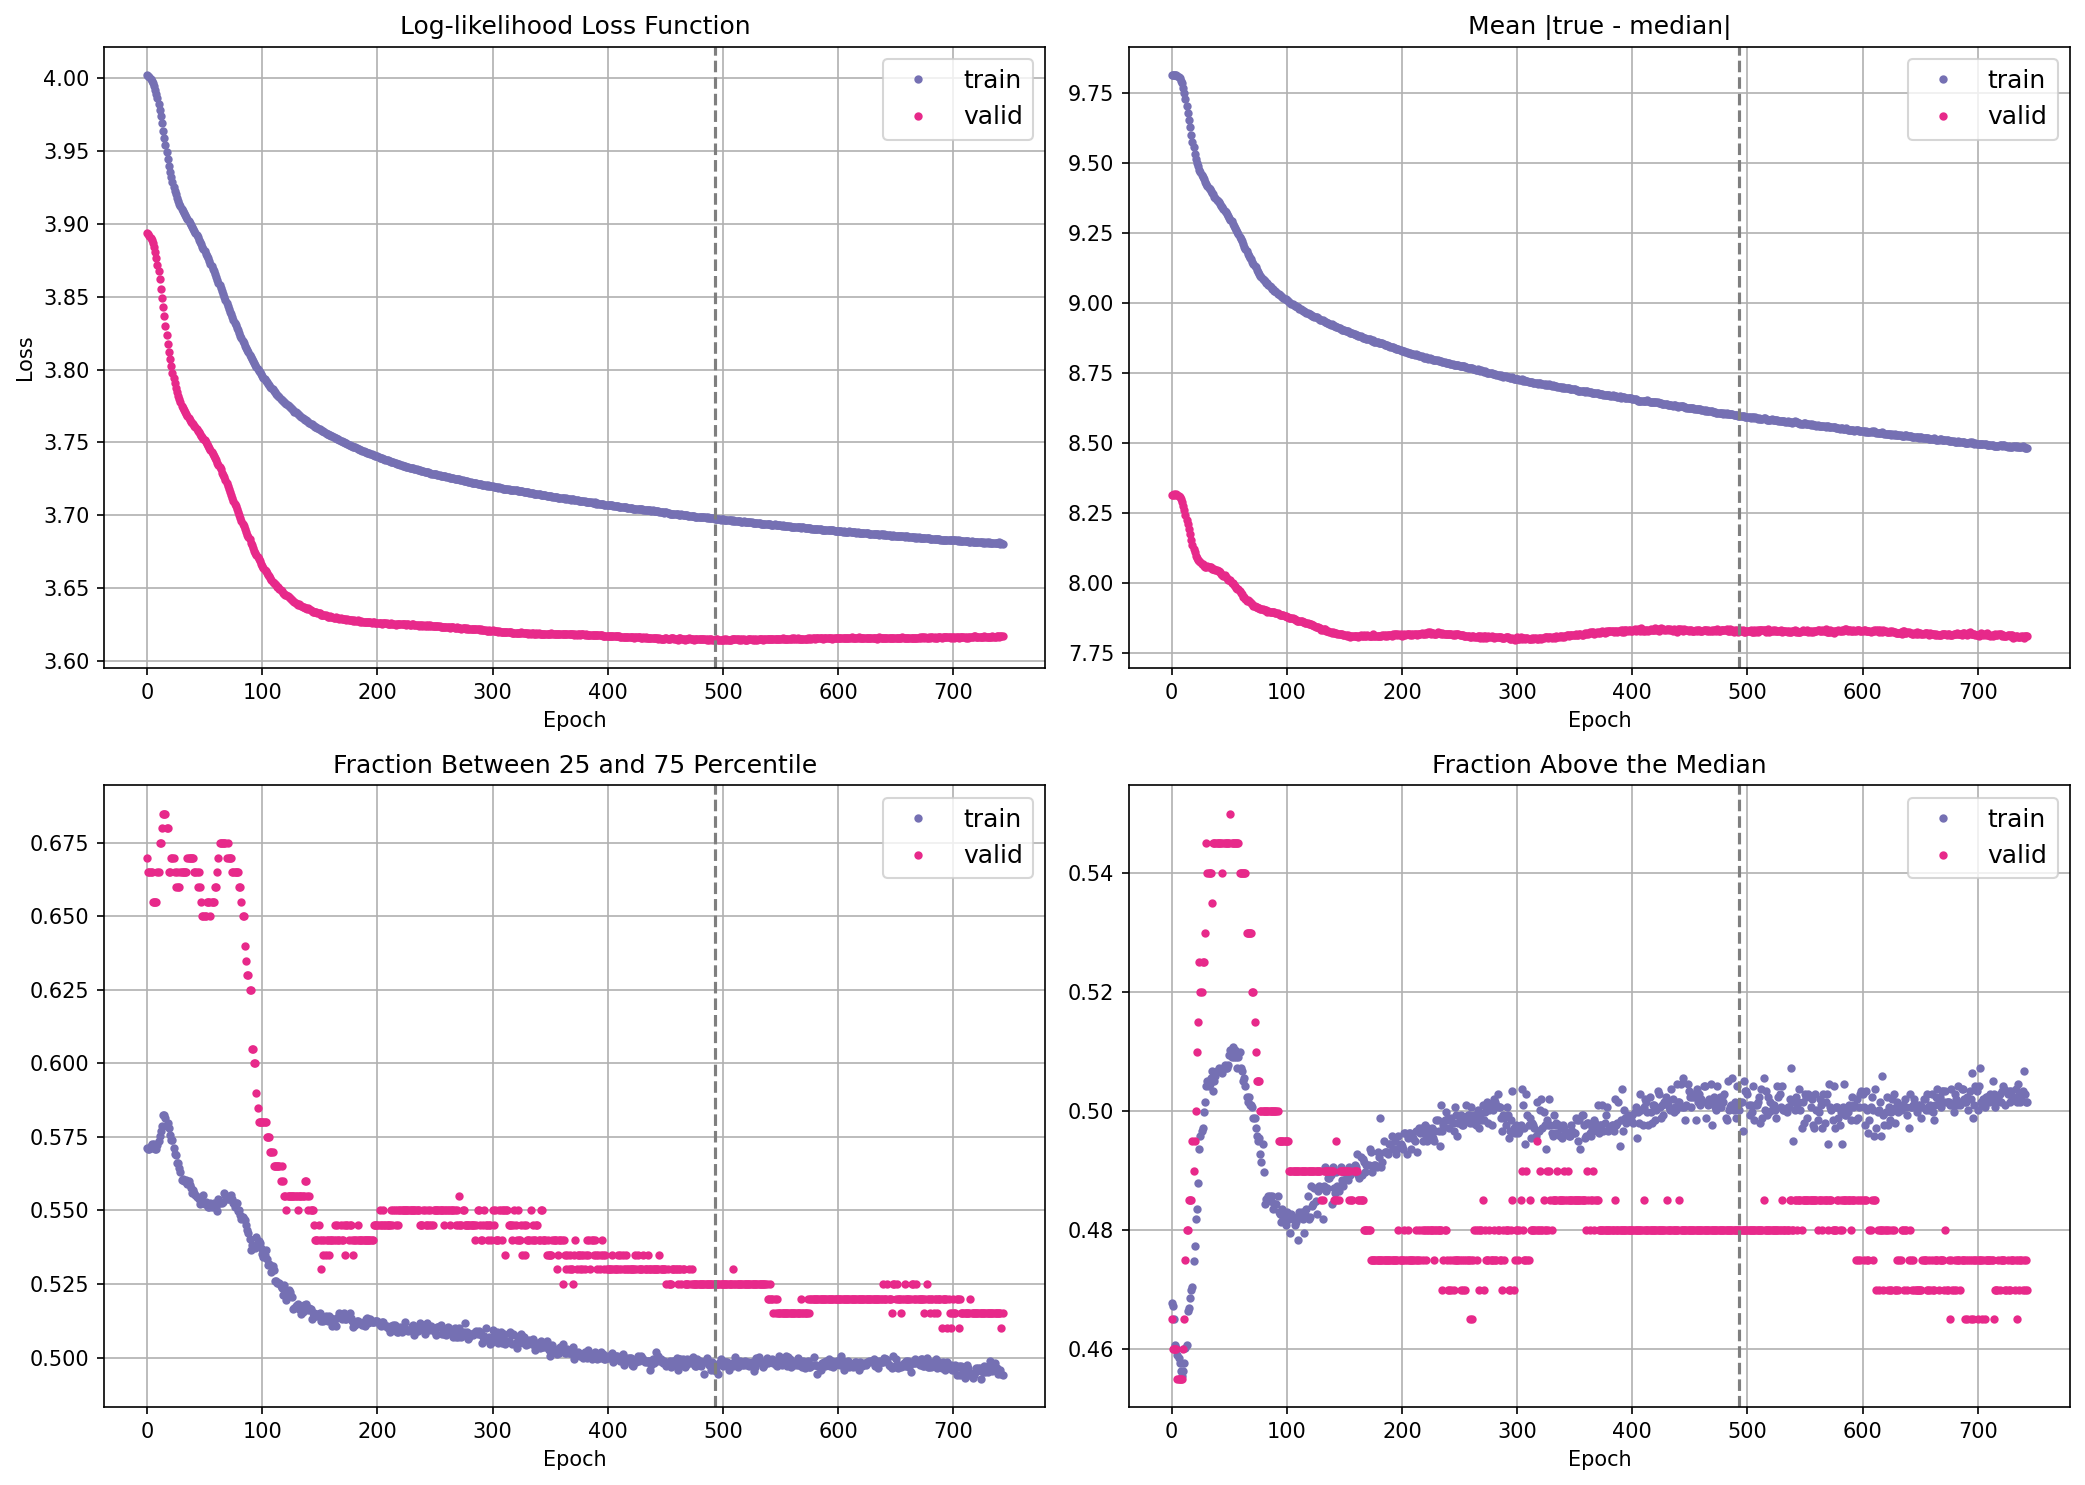

'intensity301_EPCP24_2018_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2019_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2019_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 213.
Epoch 00463: early stopping
{'best_epoch': 212,
 'elapsed_time': 12.630384922027588,
 'loss_train': 3.75430965423584,
 'loss_valid': 3.7986059188842773,
 'network_seed': 333}


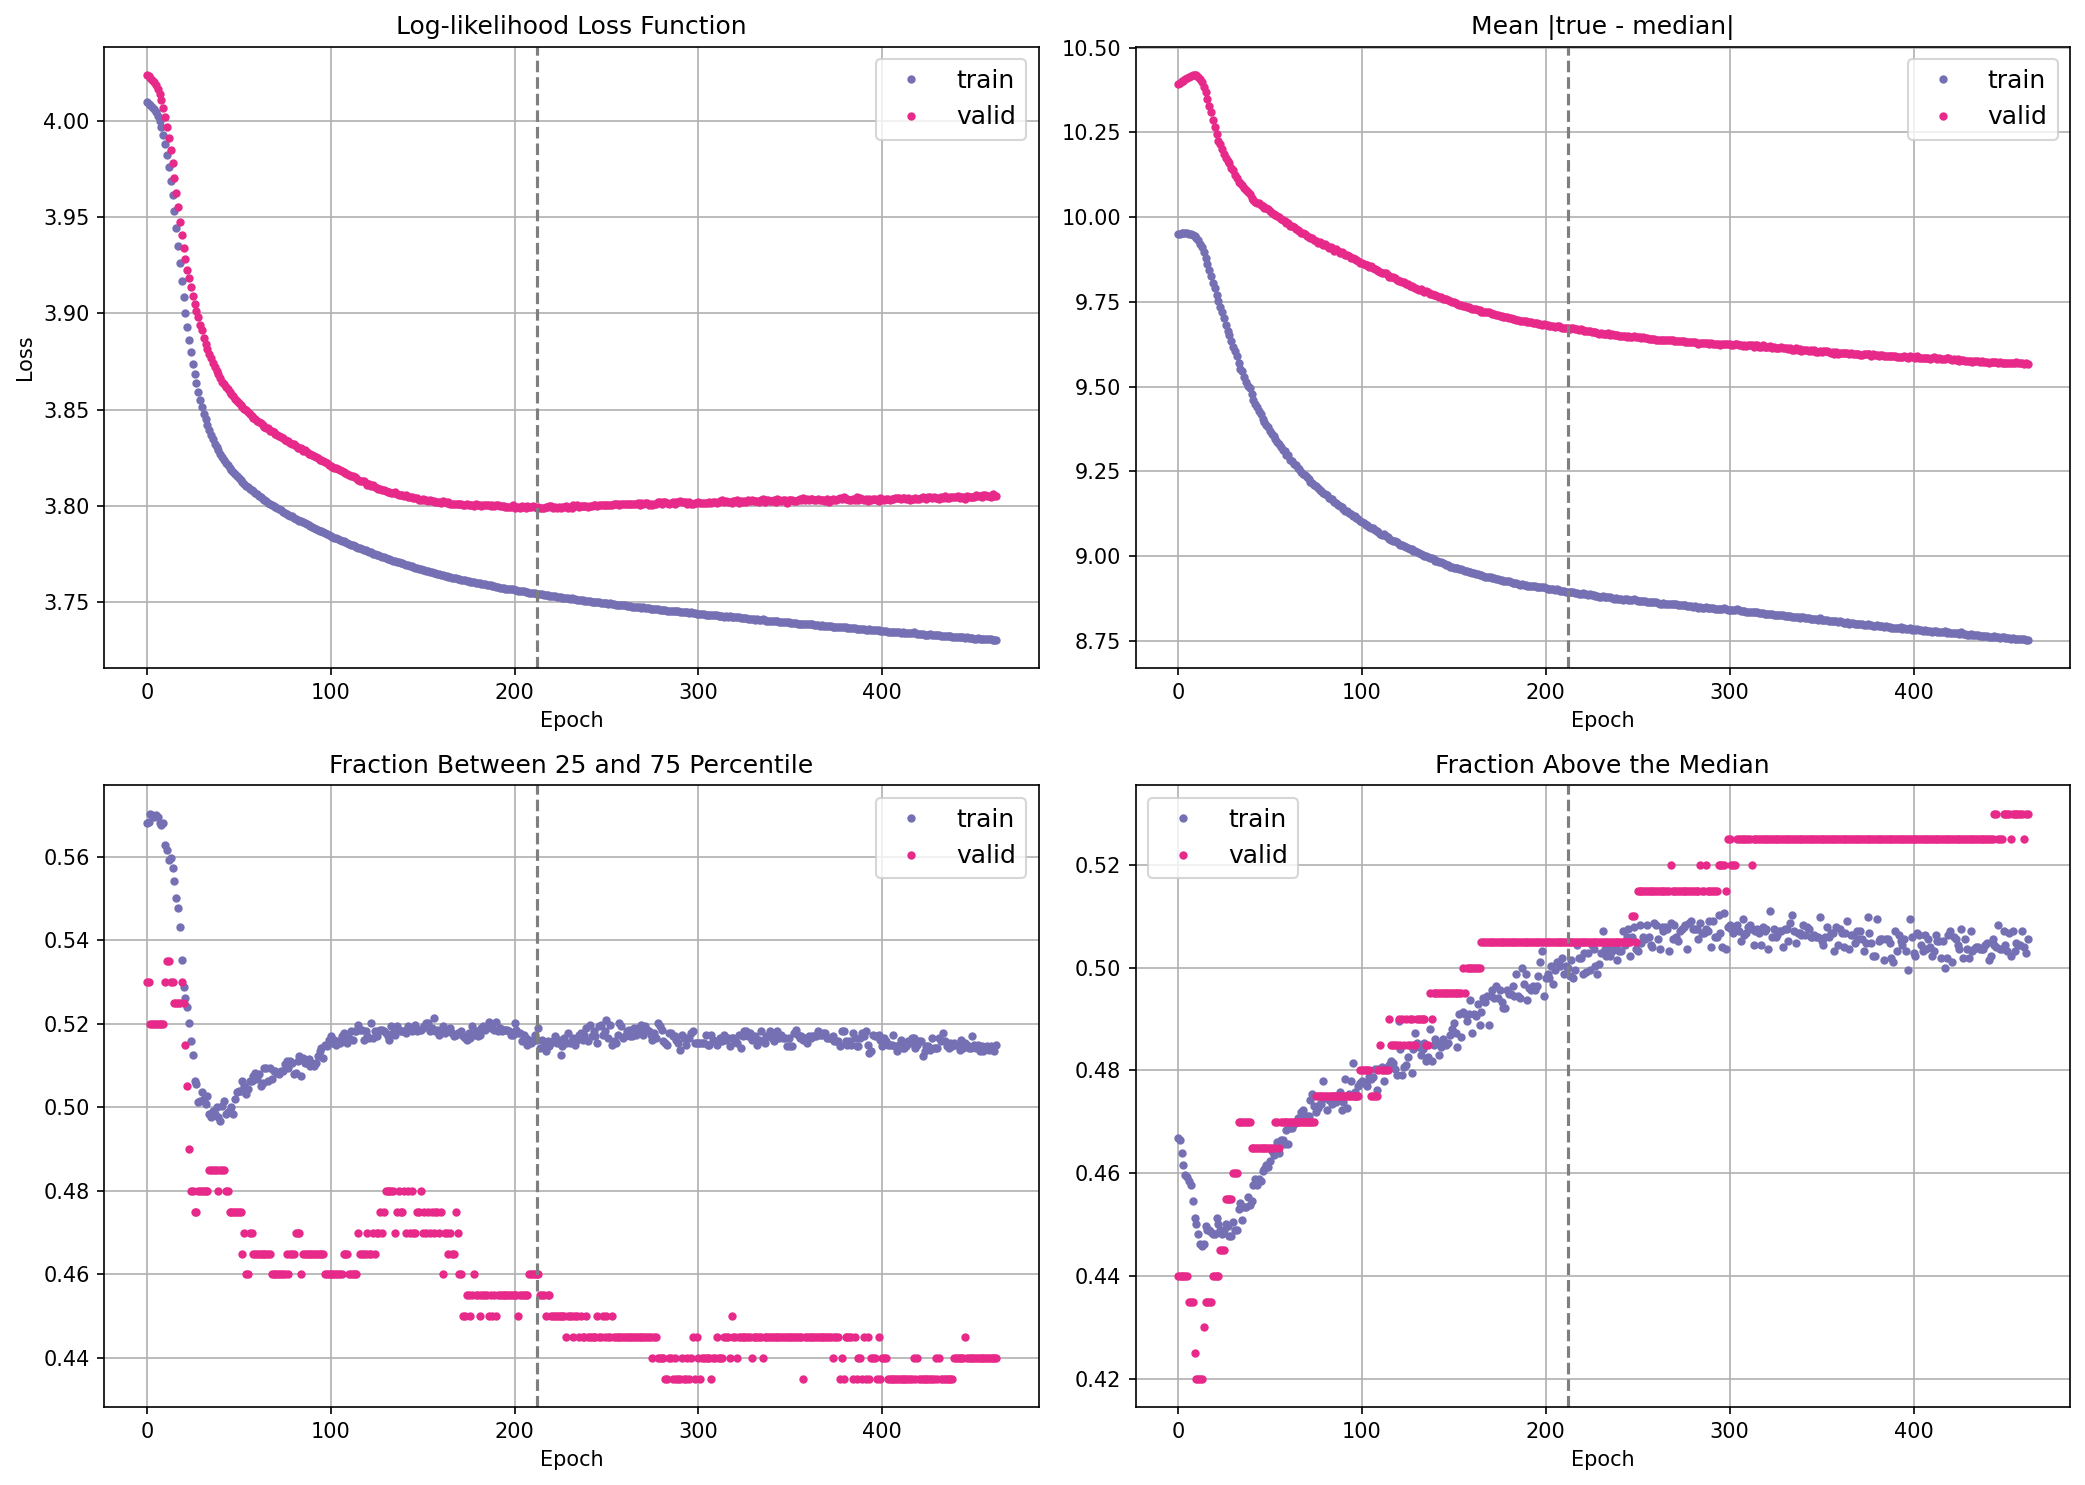

'intensity301_EPCP24_2019_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2019_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1615.
Epoch 01865: early stopping
{'best_epoch': 1614,
 'elapsed_time': 49.34714698791504,
 'loss_train': 3.6595194339752197,
 'loss_valid': 3.608781337738037,
 'network_seed': 599}


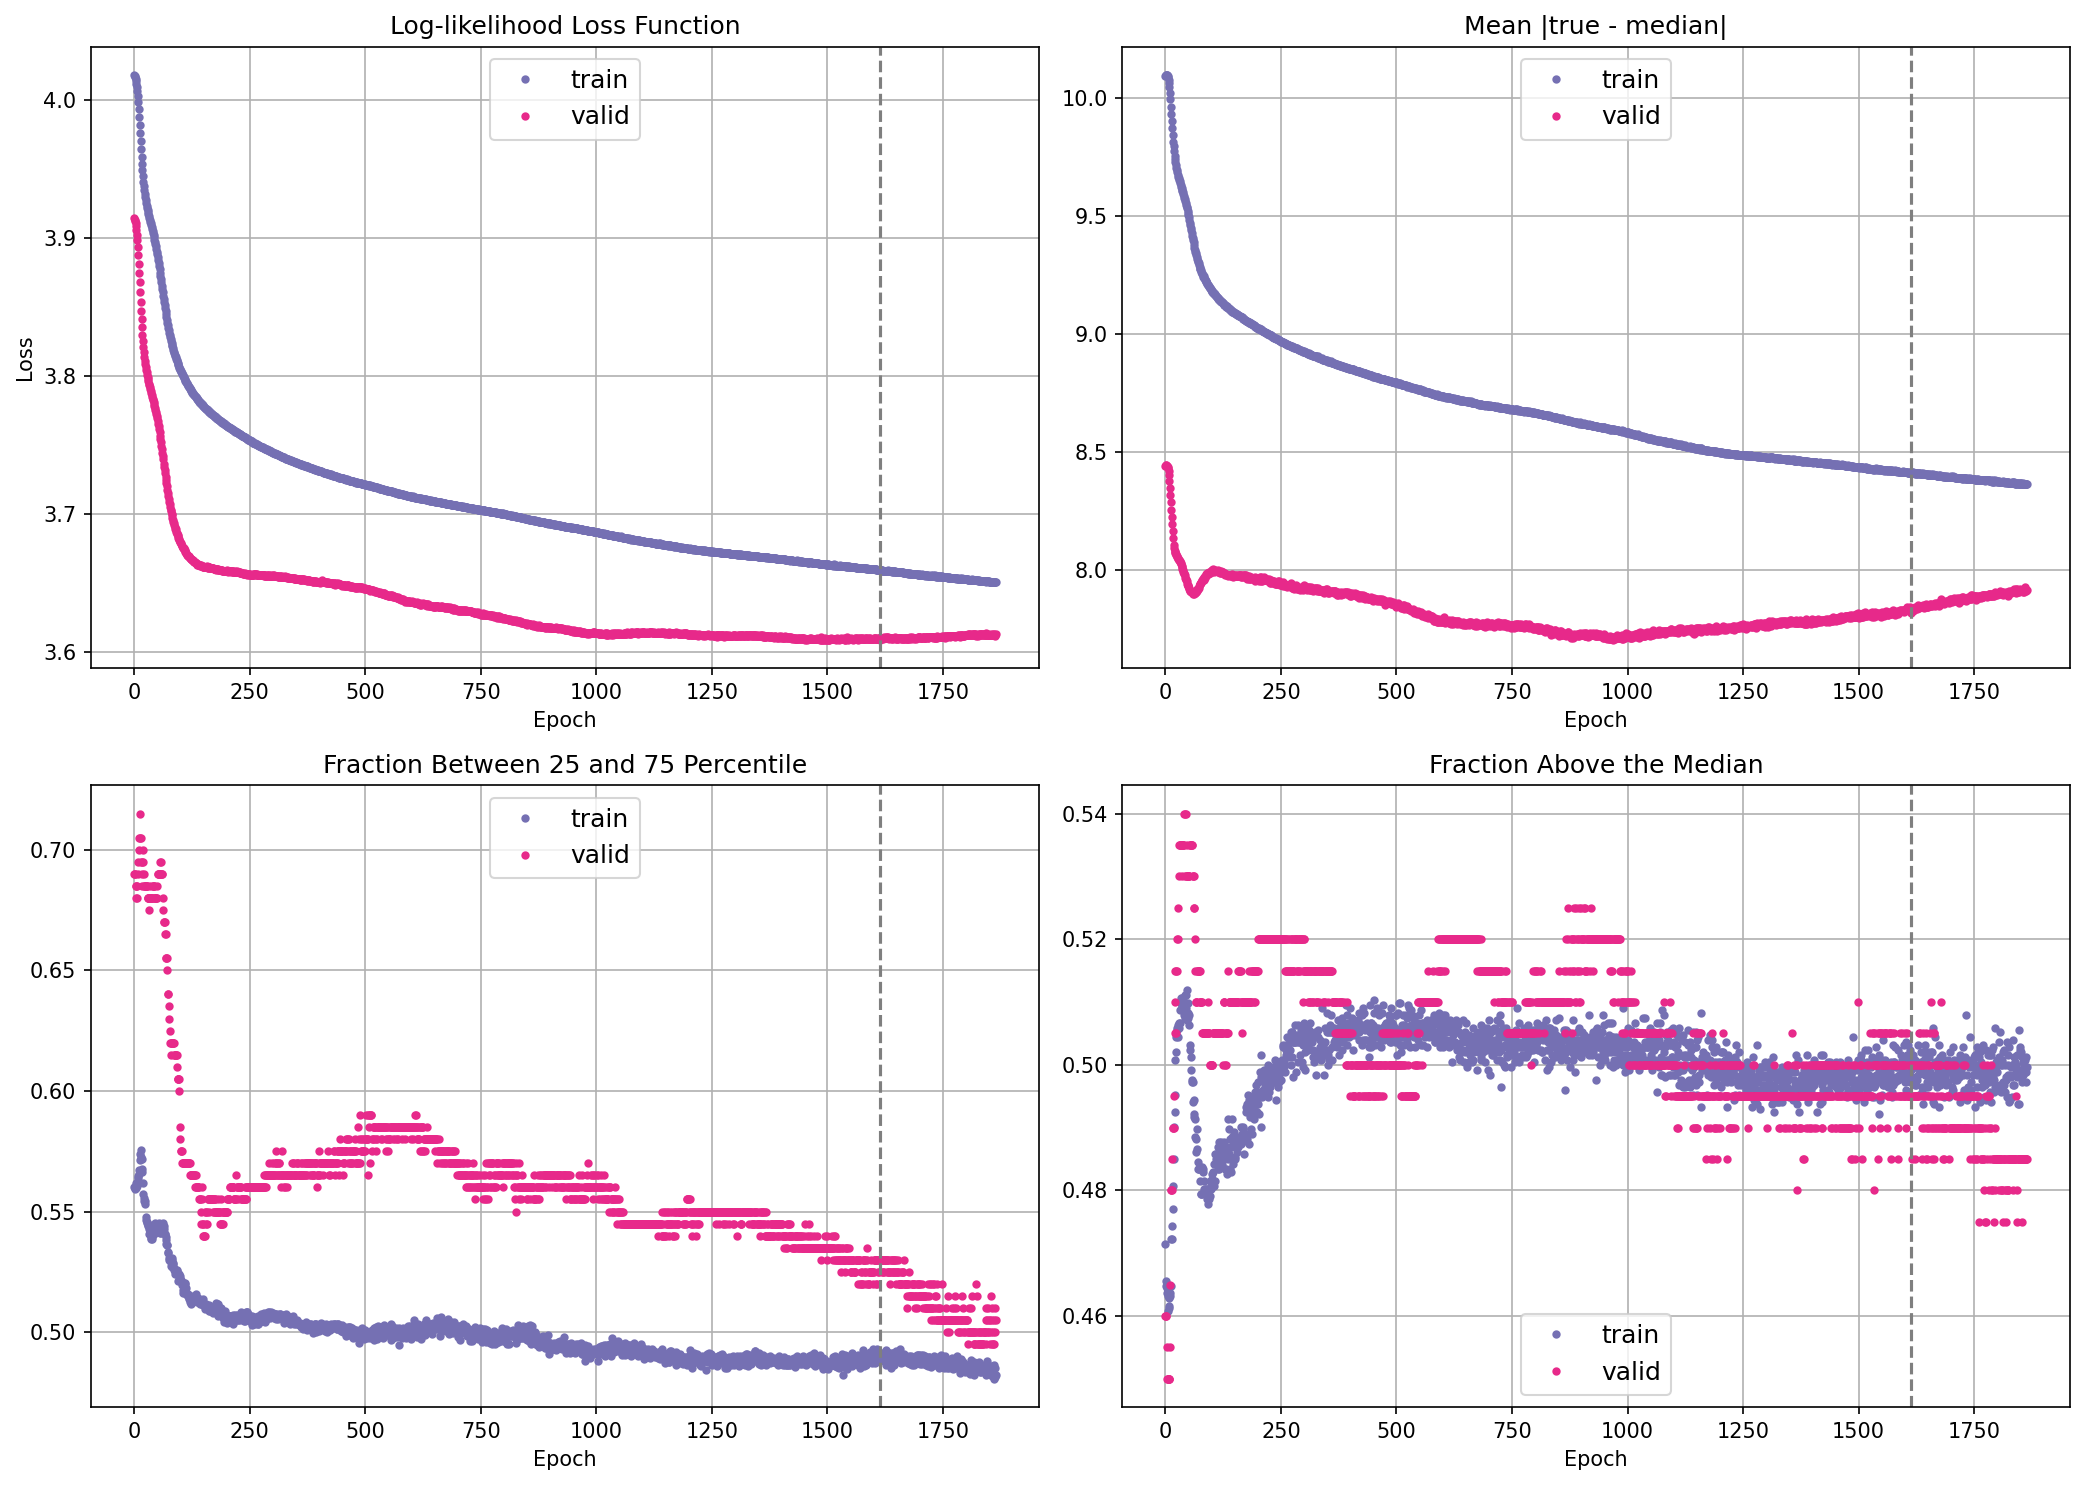

'intensity301_EPCP24_2019_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2020_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2020_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 279.
Epoch 00529: early stopping
{'best_epoch': 278,
 'elapsed_time': 14.71449899673462,
 'loss_train': 3.7586617469787598,
 'loss_valid': 3.7918081283569336,
 'network_seed': 333}


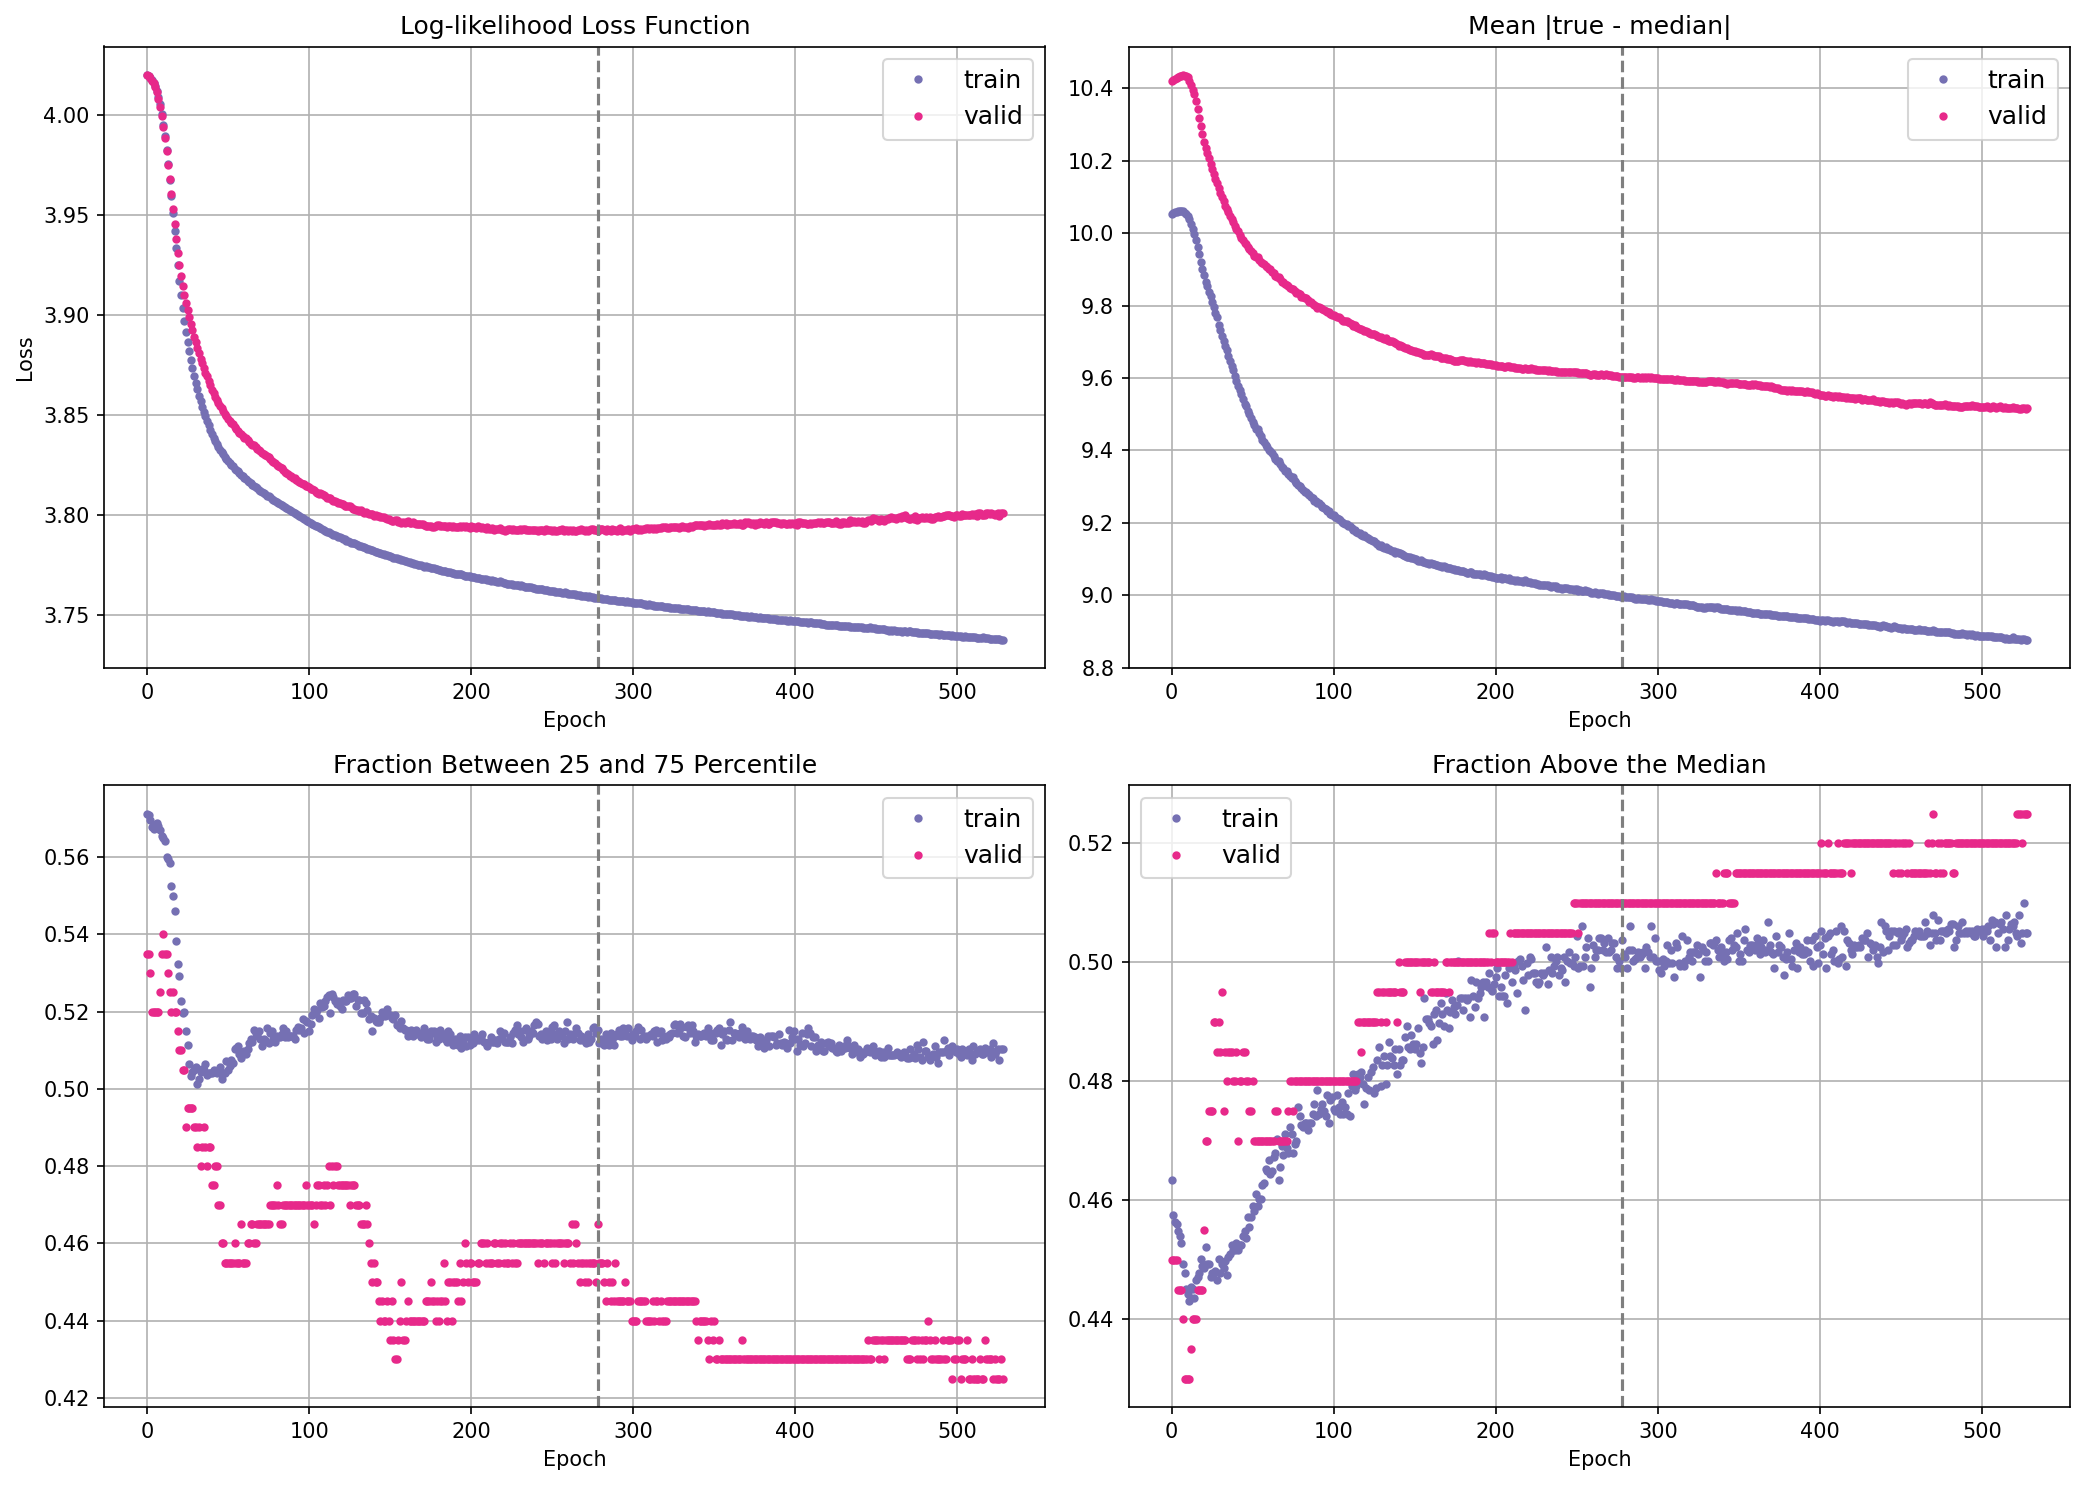

'intensity301_EPCP24_2020_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2020_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1439.
Epoch 01689: early stopping
{'best_epoch': 1438,
 'elapsed_time': 45.616198778152466,
 'loss_train': 3.6611392498016357,
 'loss_valid': 3.6099469661712646,
 'network_seed': 599}


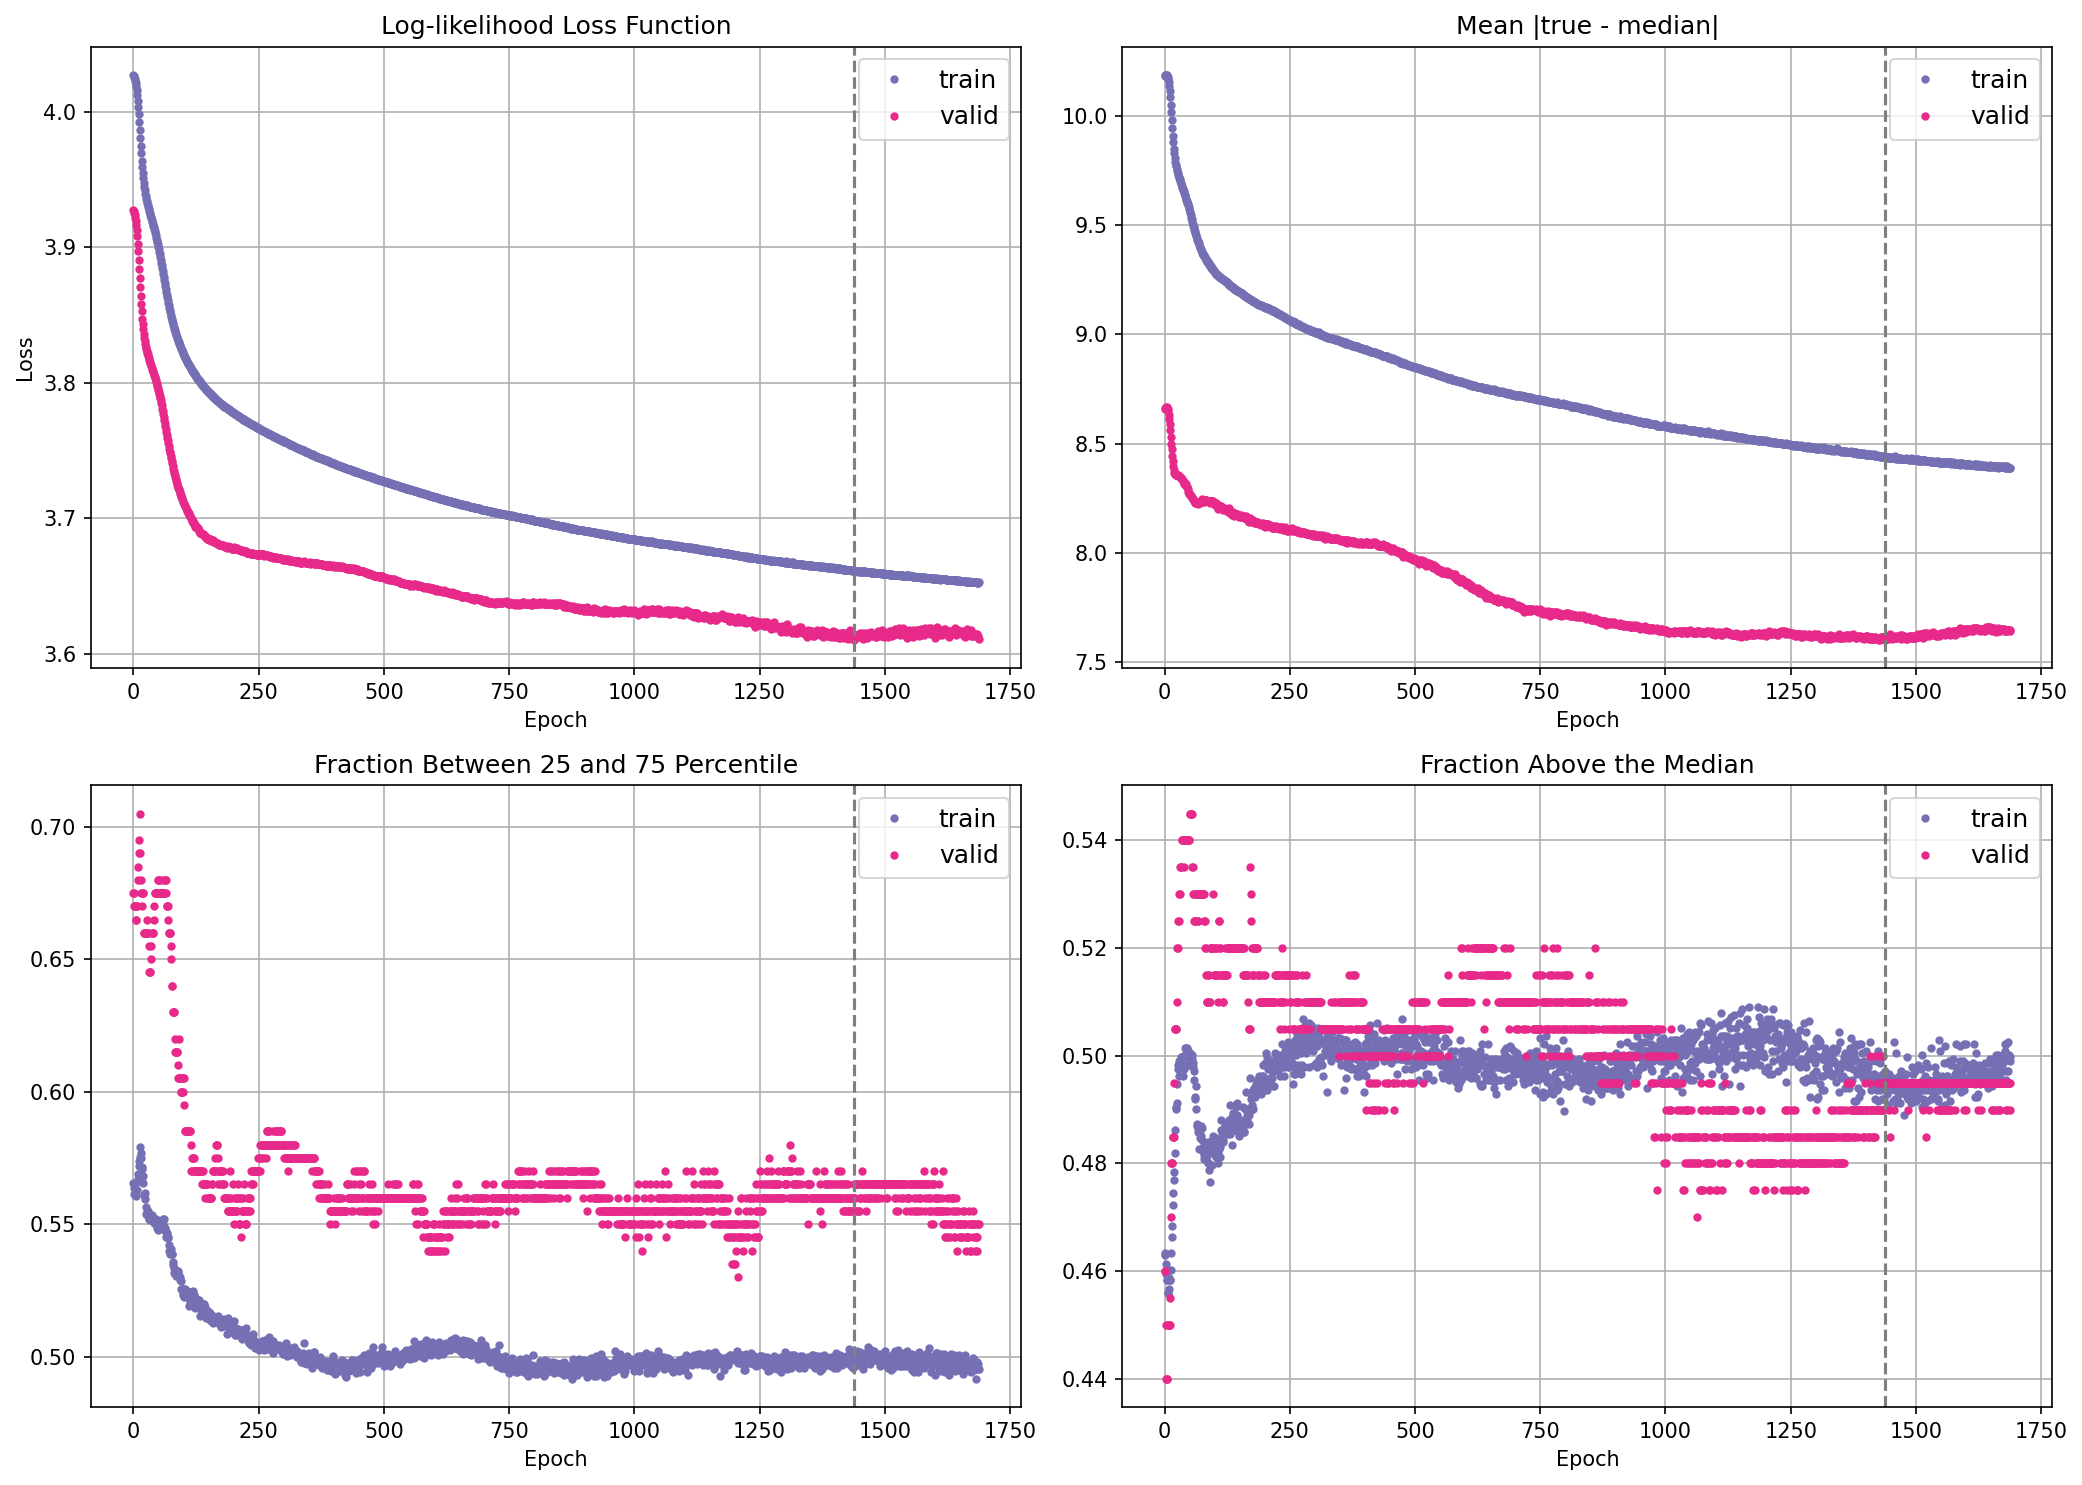

'intensity301_EPCP24_2020_shash3_network_seed_739_rng_seed_739'
'intensity301_EPCP24_2021_shash3_network_seed_222_rng_seed_222'
'intensity301_EPCP24_2021_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 3570.
Epoch 03820: early stopping
{'best_epoch': 3569,
 'elapsed_time': 101.09181714057922,
 'loss_train': 3.592437267303467,
 'loss_valid': 3.6837387084960938,
 'network_seed': 333}


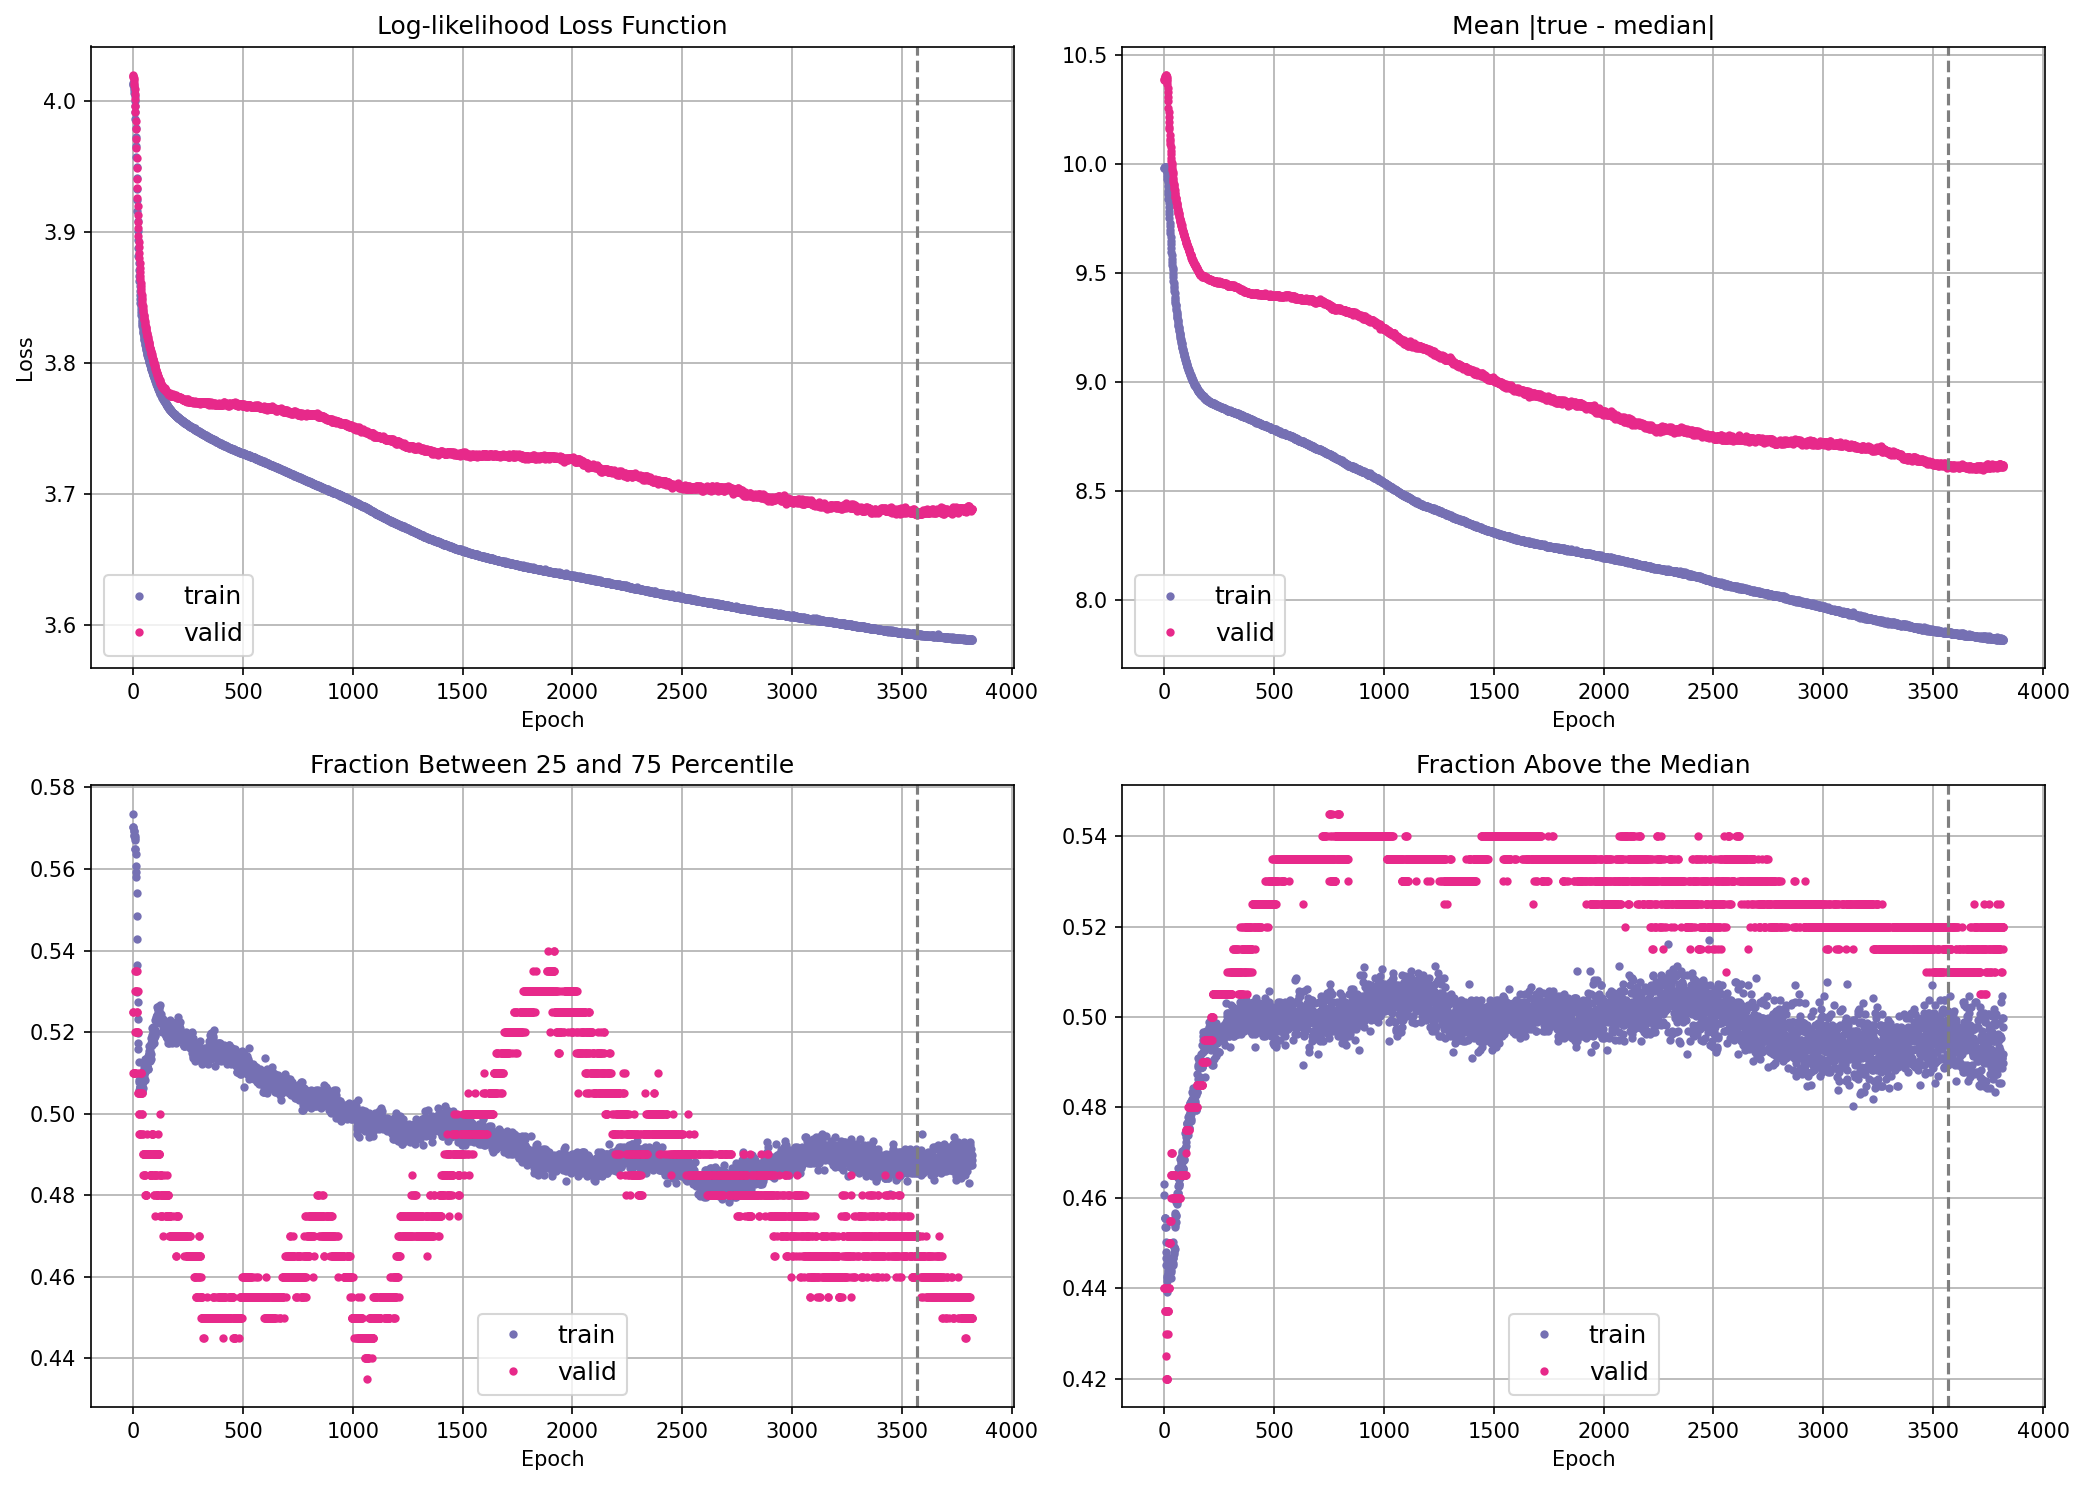

'intensity301_EPCP24_2021_shash3_network_seed_416_rng_seed_416'
'intensity301_EPCP24_2021_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1067.
Epoch 01317: early stopping
{'best_epoch': 1066,
 'elapsed_time': 35.240418910980225,
 'loss_train': 3.6732234954833984,
 'loss_valid': 3.6353936195373535,
 'network_seed': 599}


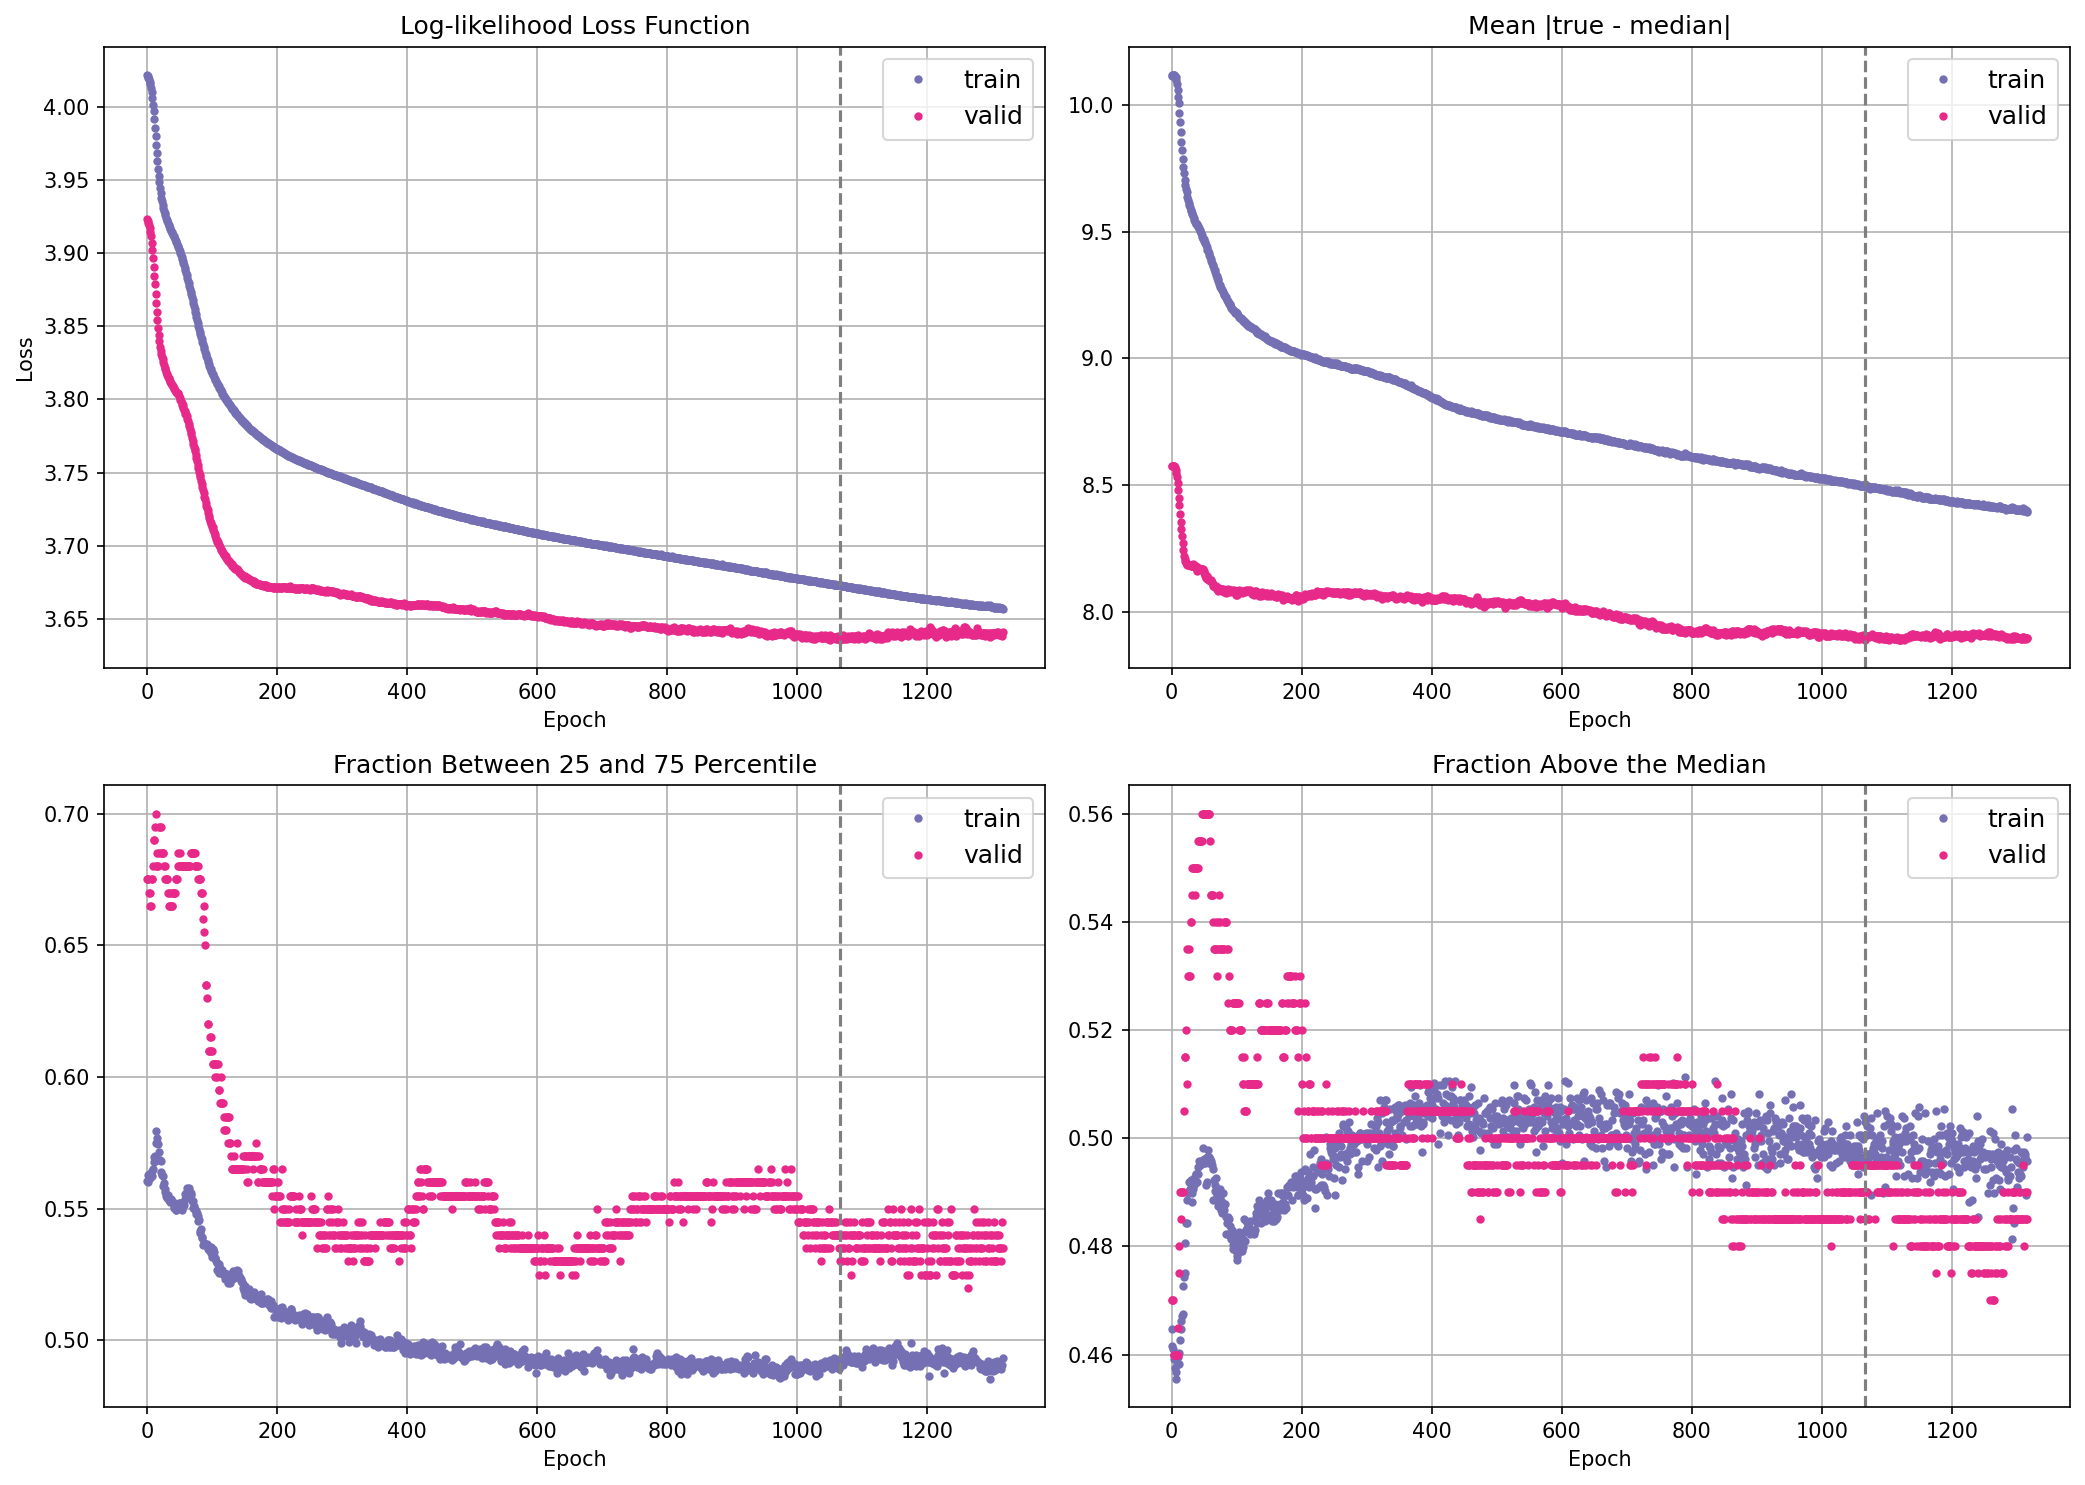

'intensity301_EPCP24_2021_shash3_network_seed_739_rng_seed_739'
'intensity302_EPCP48_2013_shash3_network_seed_222_rng_seed_222'
'intensity302_EPCP48_2013_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 1451.
Epoch 01701: early stopping
{'best_epoch': 1450,
 'elapsed_time': 38.46372890472412,
 'loss_train': 3.8455398082733154,
 'loss_valid': 4.056769847869873,
 'network_seed': 333}


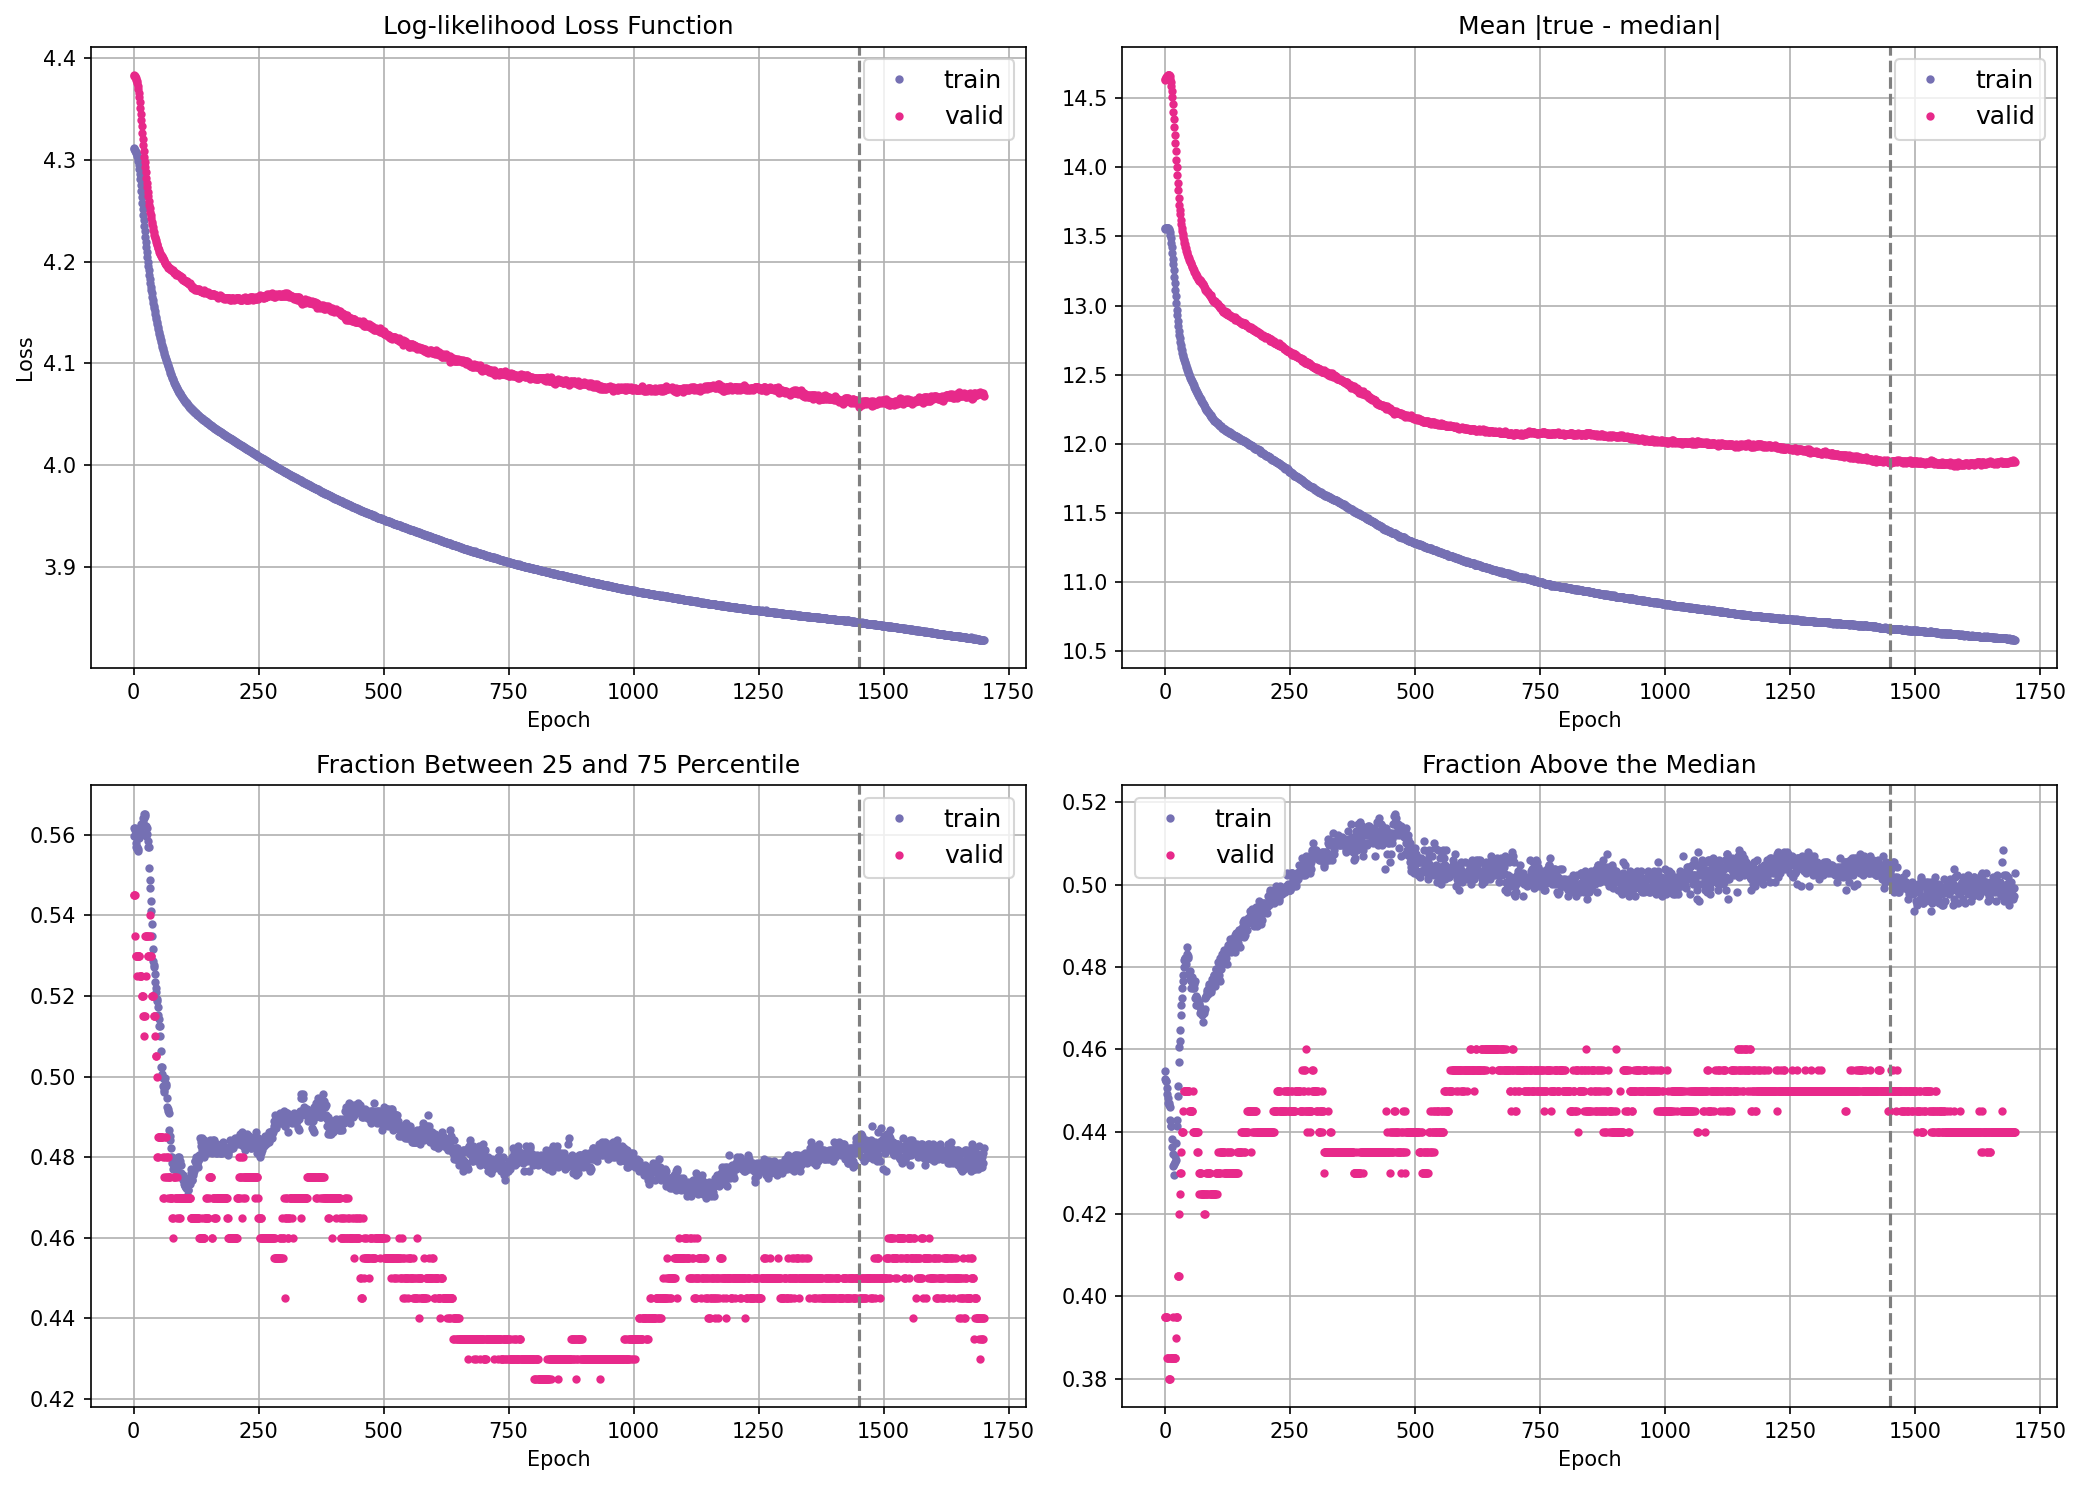

'intensity302_EPCP48_2013_shash3_network_seed_416_rng_seed_416'
'intensity302_EPCP48_2013_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1043.
Epoch 01293: early stopping
{'best_epoch': 1042,
 'elapsed_time': 29.52371621131897,
 'loss_train': 3.8944263458251953,
 'loss_valid': 3.897361993789673,
 'network_seed': 599}


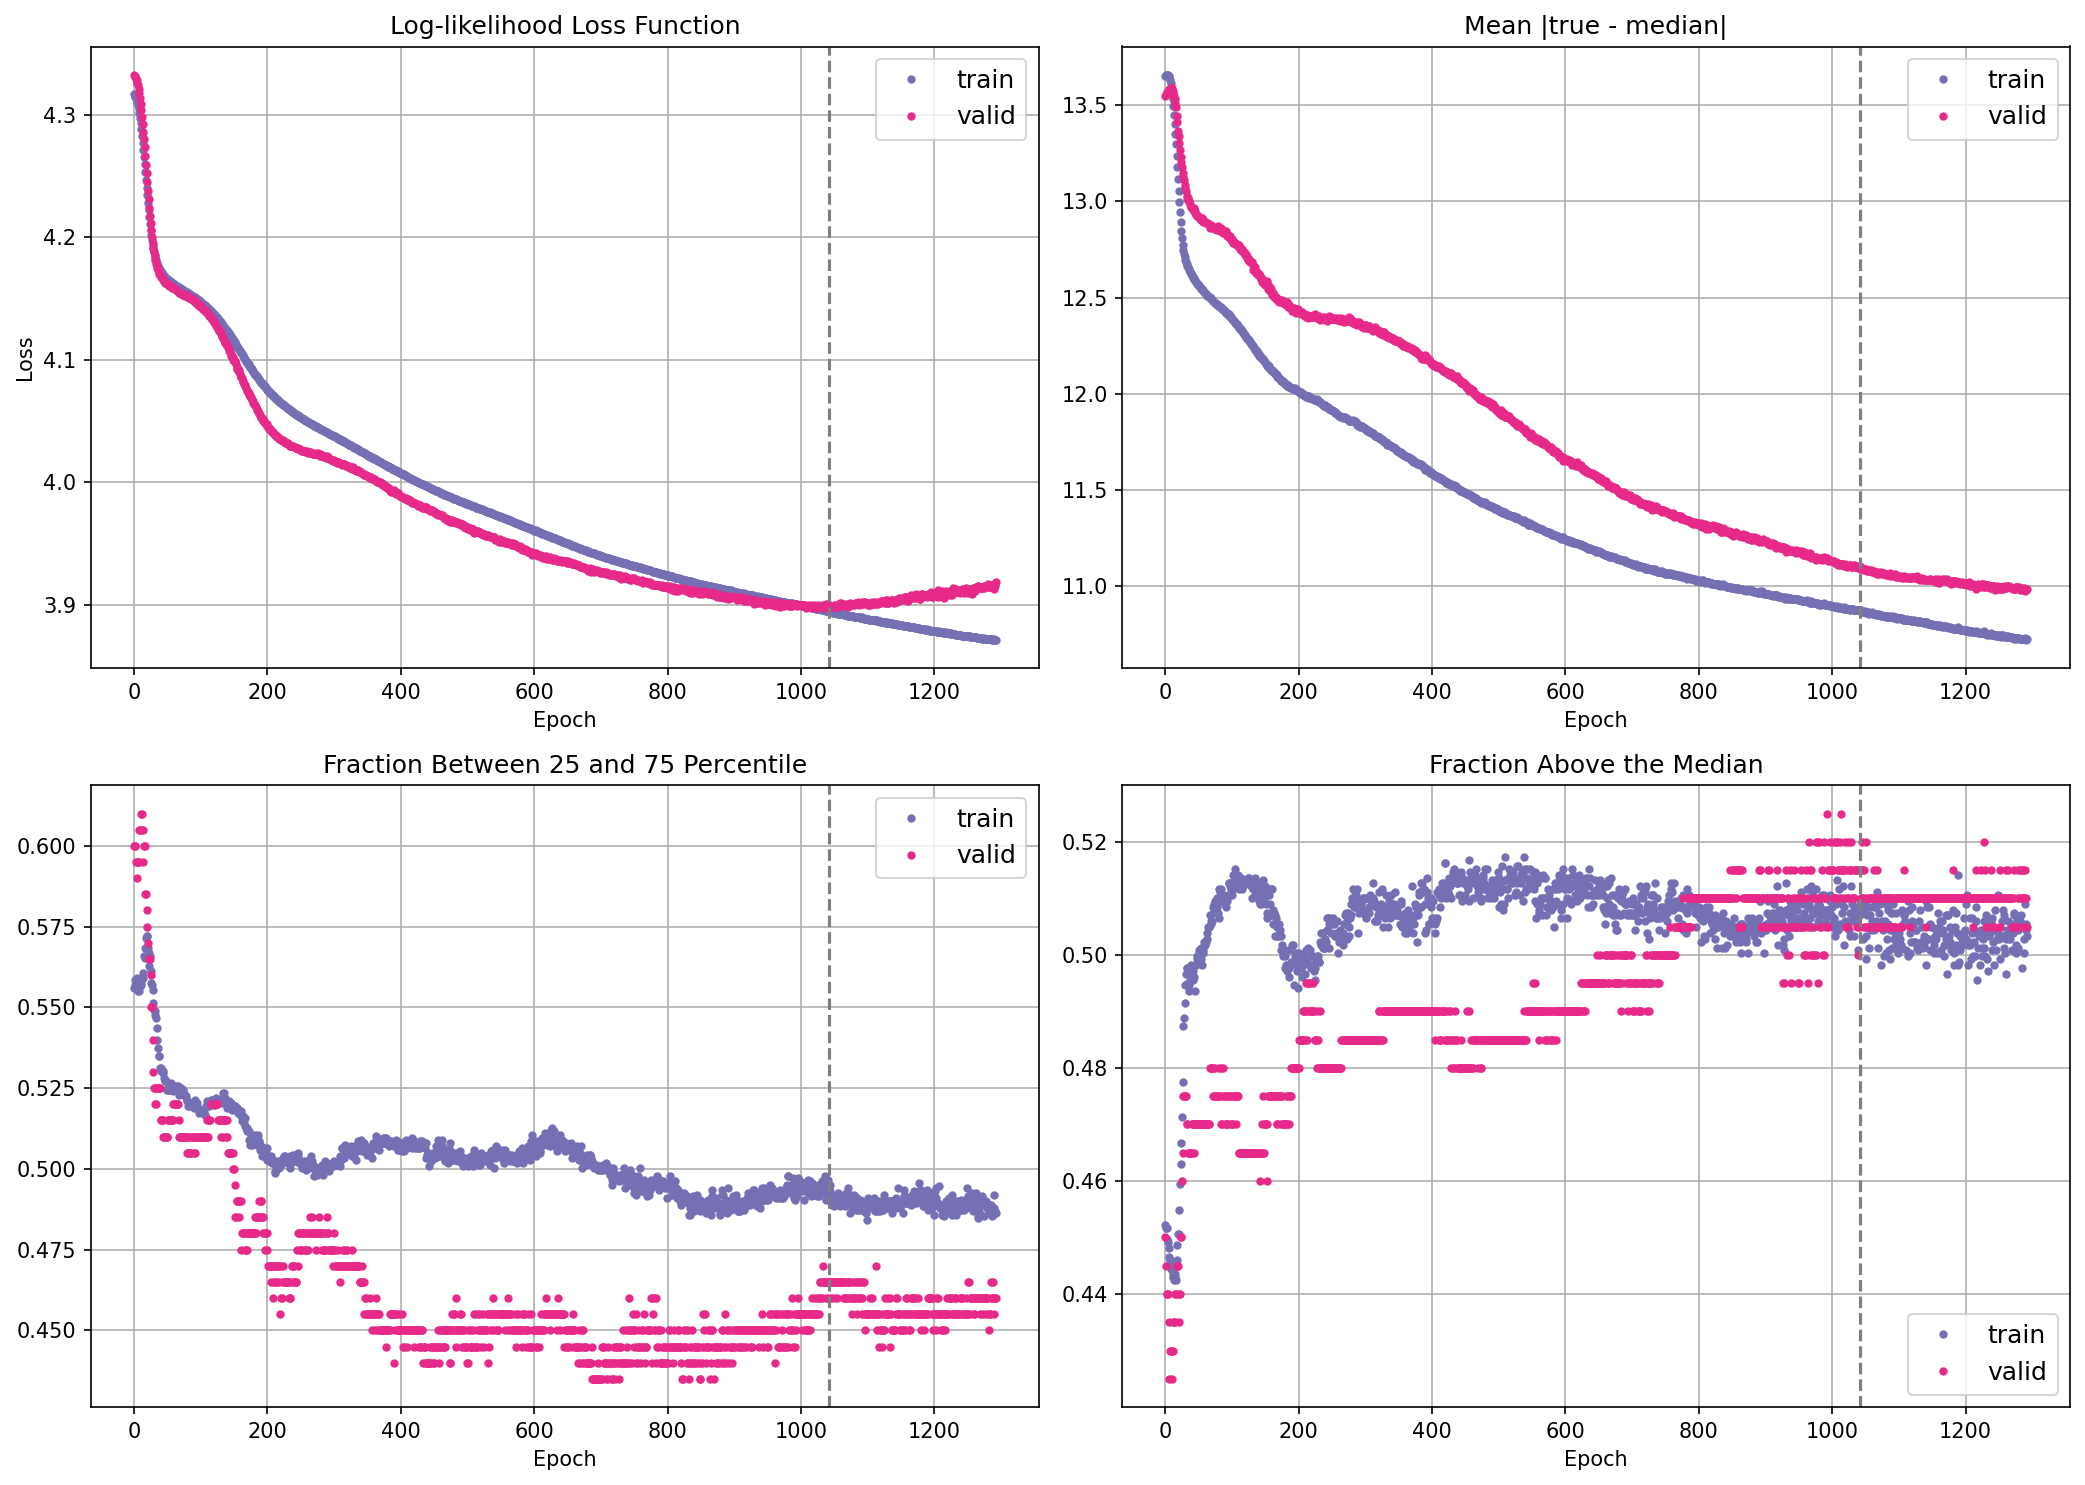

'intensity302_EPCP48_2013_shash3_network_seed_739_rng_seed_739'
'intensity302_EPCP48_2014_shash3_network_seed_222_rng_seed_222'
'intensity302_EPCP48_2014_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 1866.
Epoch 02116: early stopping
{'best_epoch': 1865,
 'elapsed_time': 44.003790855407715,
 'loss_train': 3.7986297607421875,
 'loss_valid': 3.9214844703674316,
 'network_seed': 333}


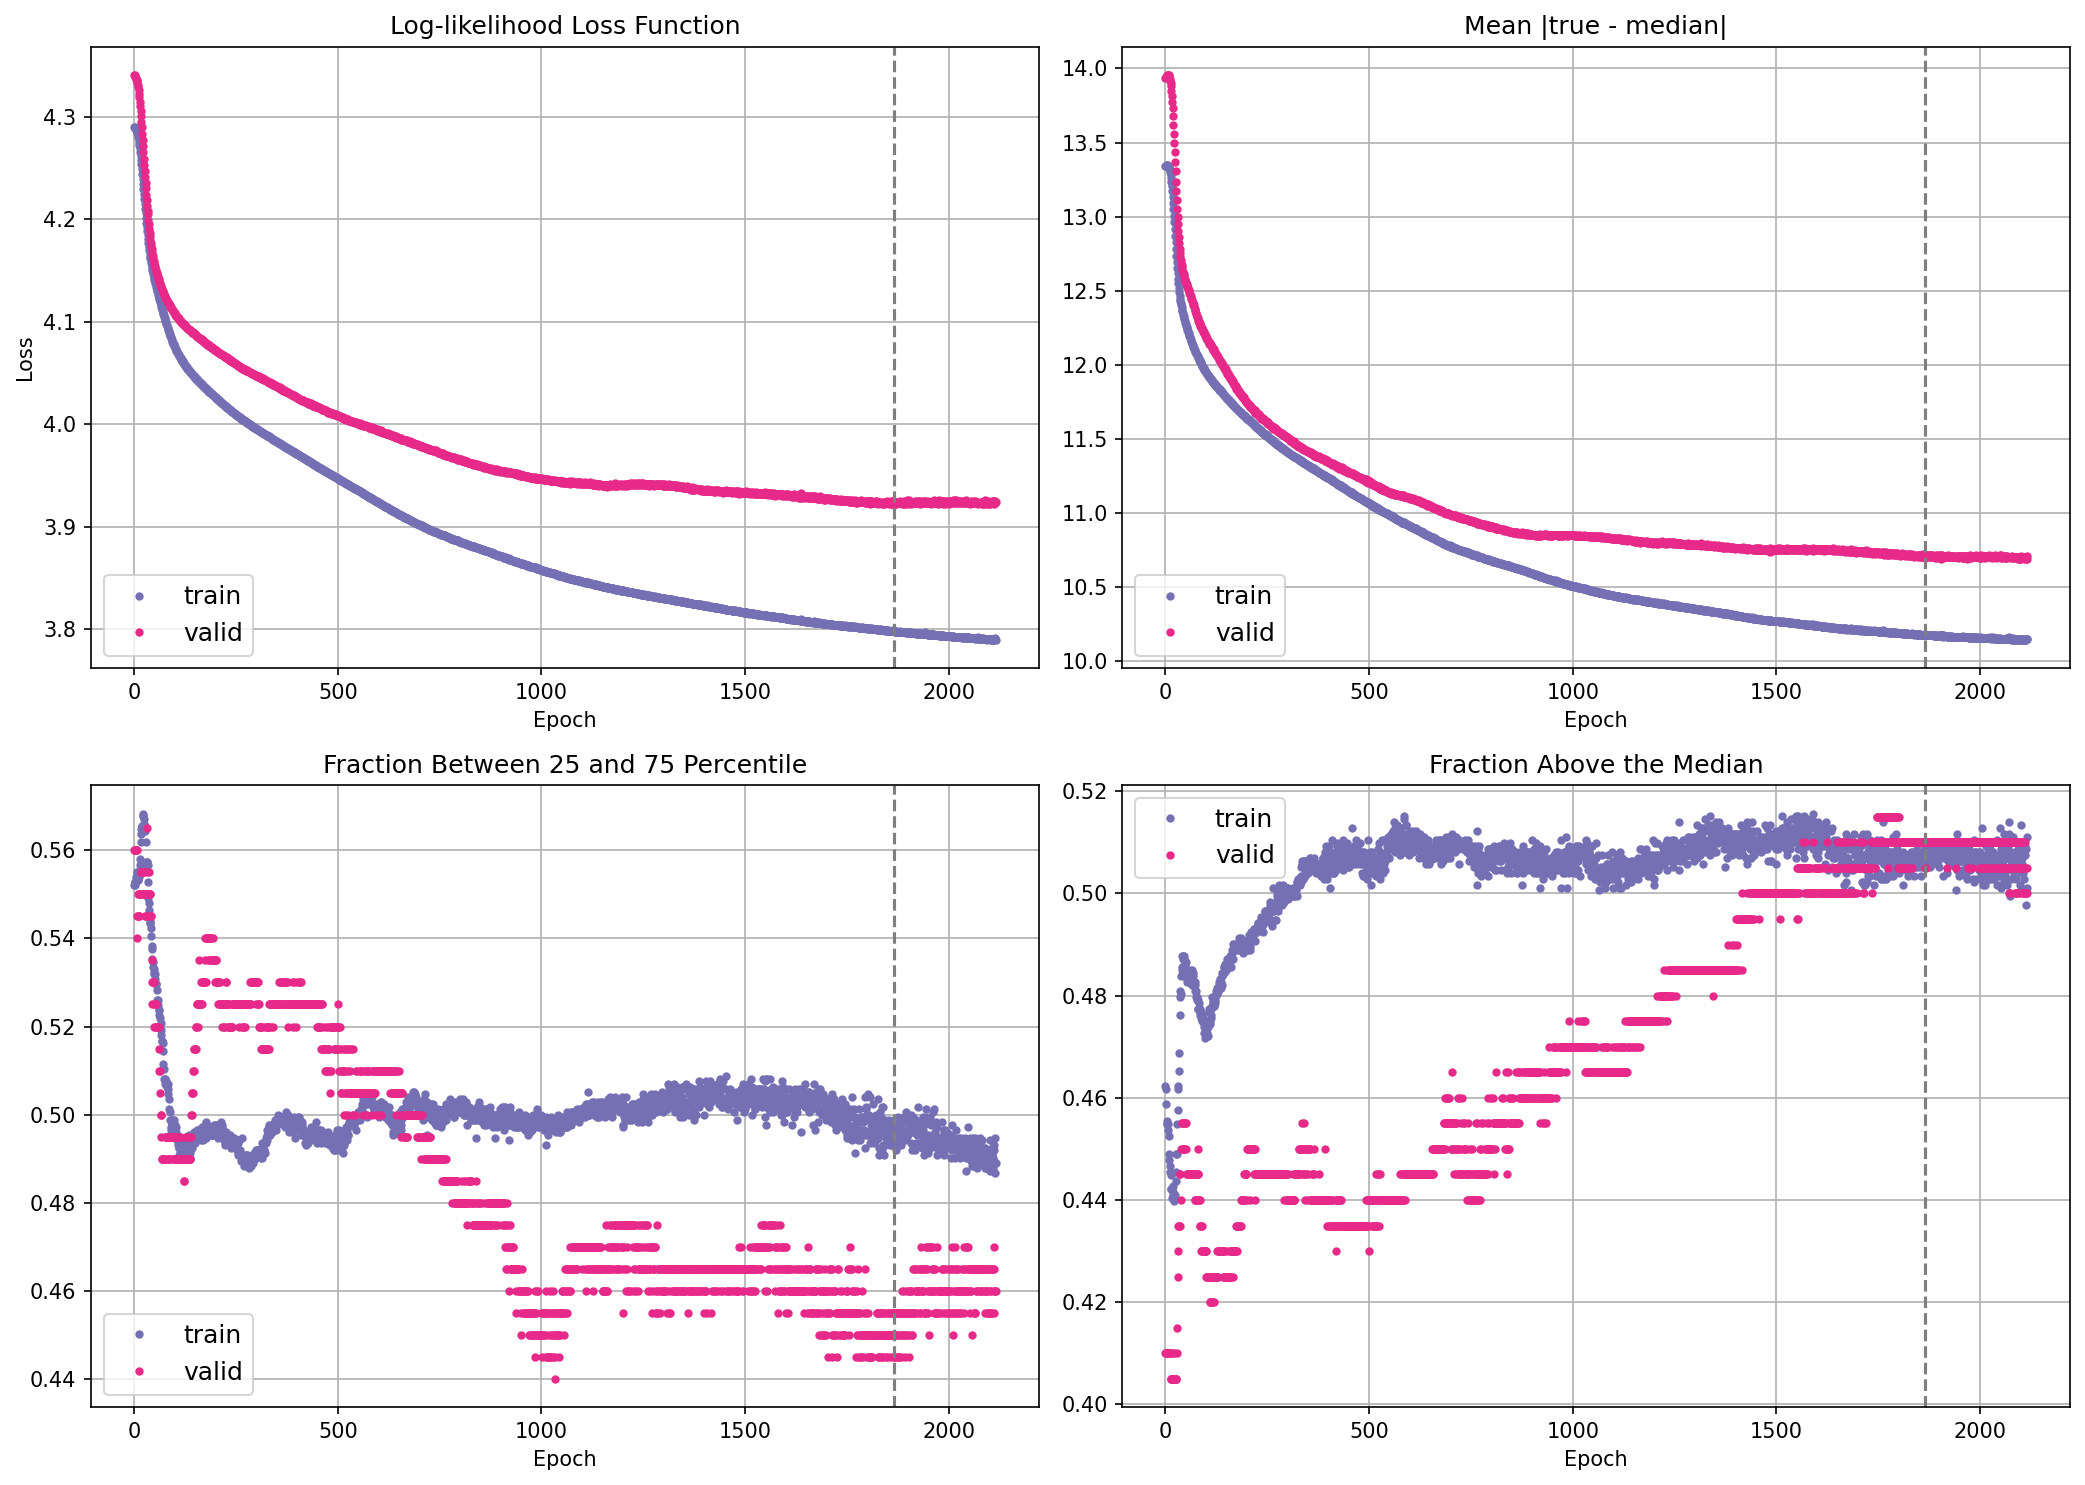

'intensity302_EPCP48_2014_shash3_network_seed_416_rng_seed_416'
'intensity302_EPCP48_2014_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 678.
Epoch 00928: early stopping
{'best_epoch': 677,
 'elapsed_time': 19.493425130844116,
 'loss_train': 3.9104130268096924,
 'loss_valid': 4.057105541229248,
 'network_seed': 599}


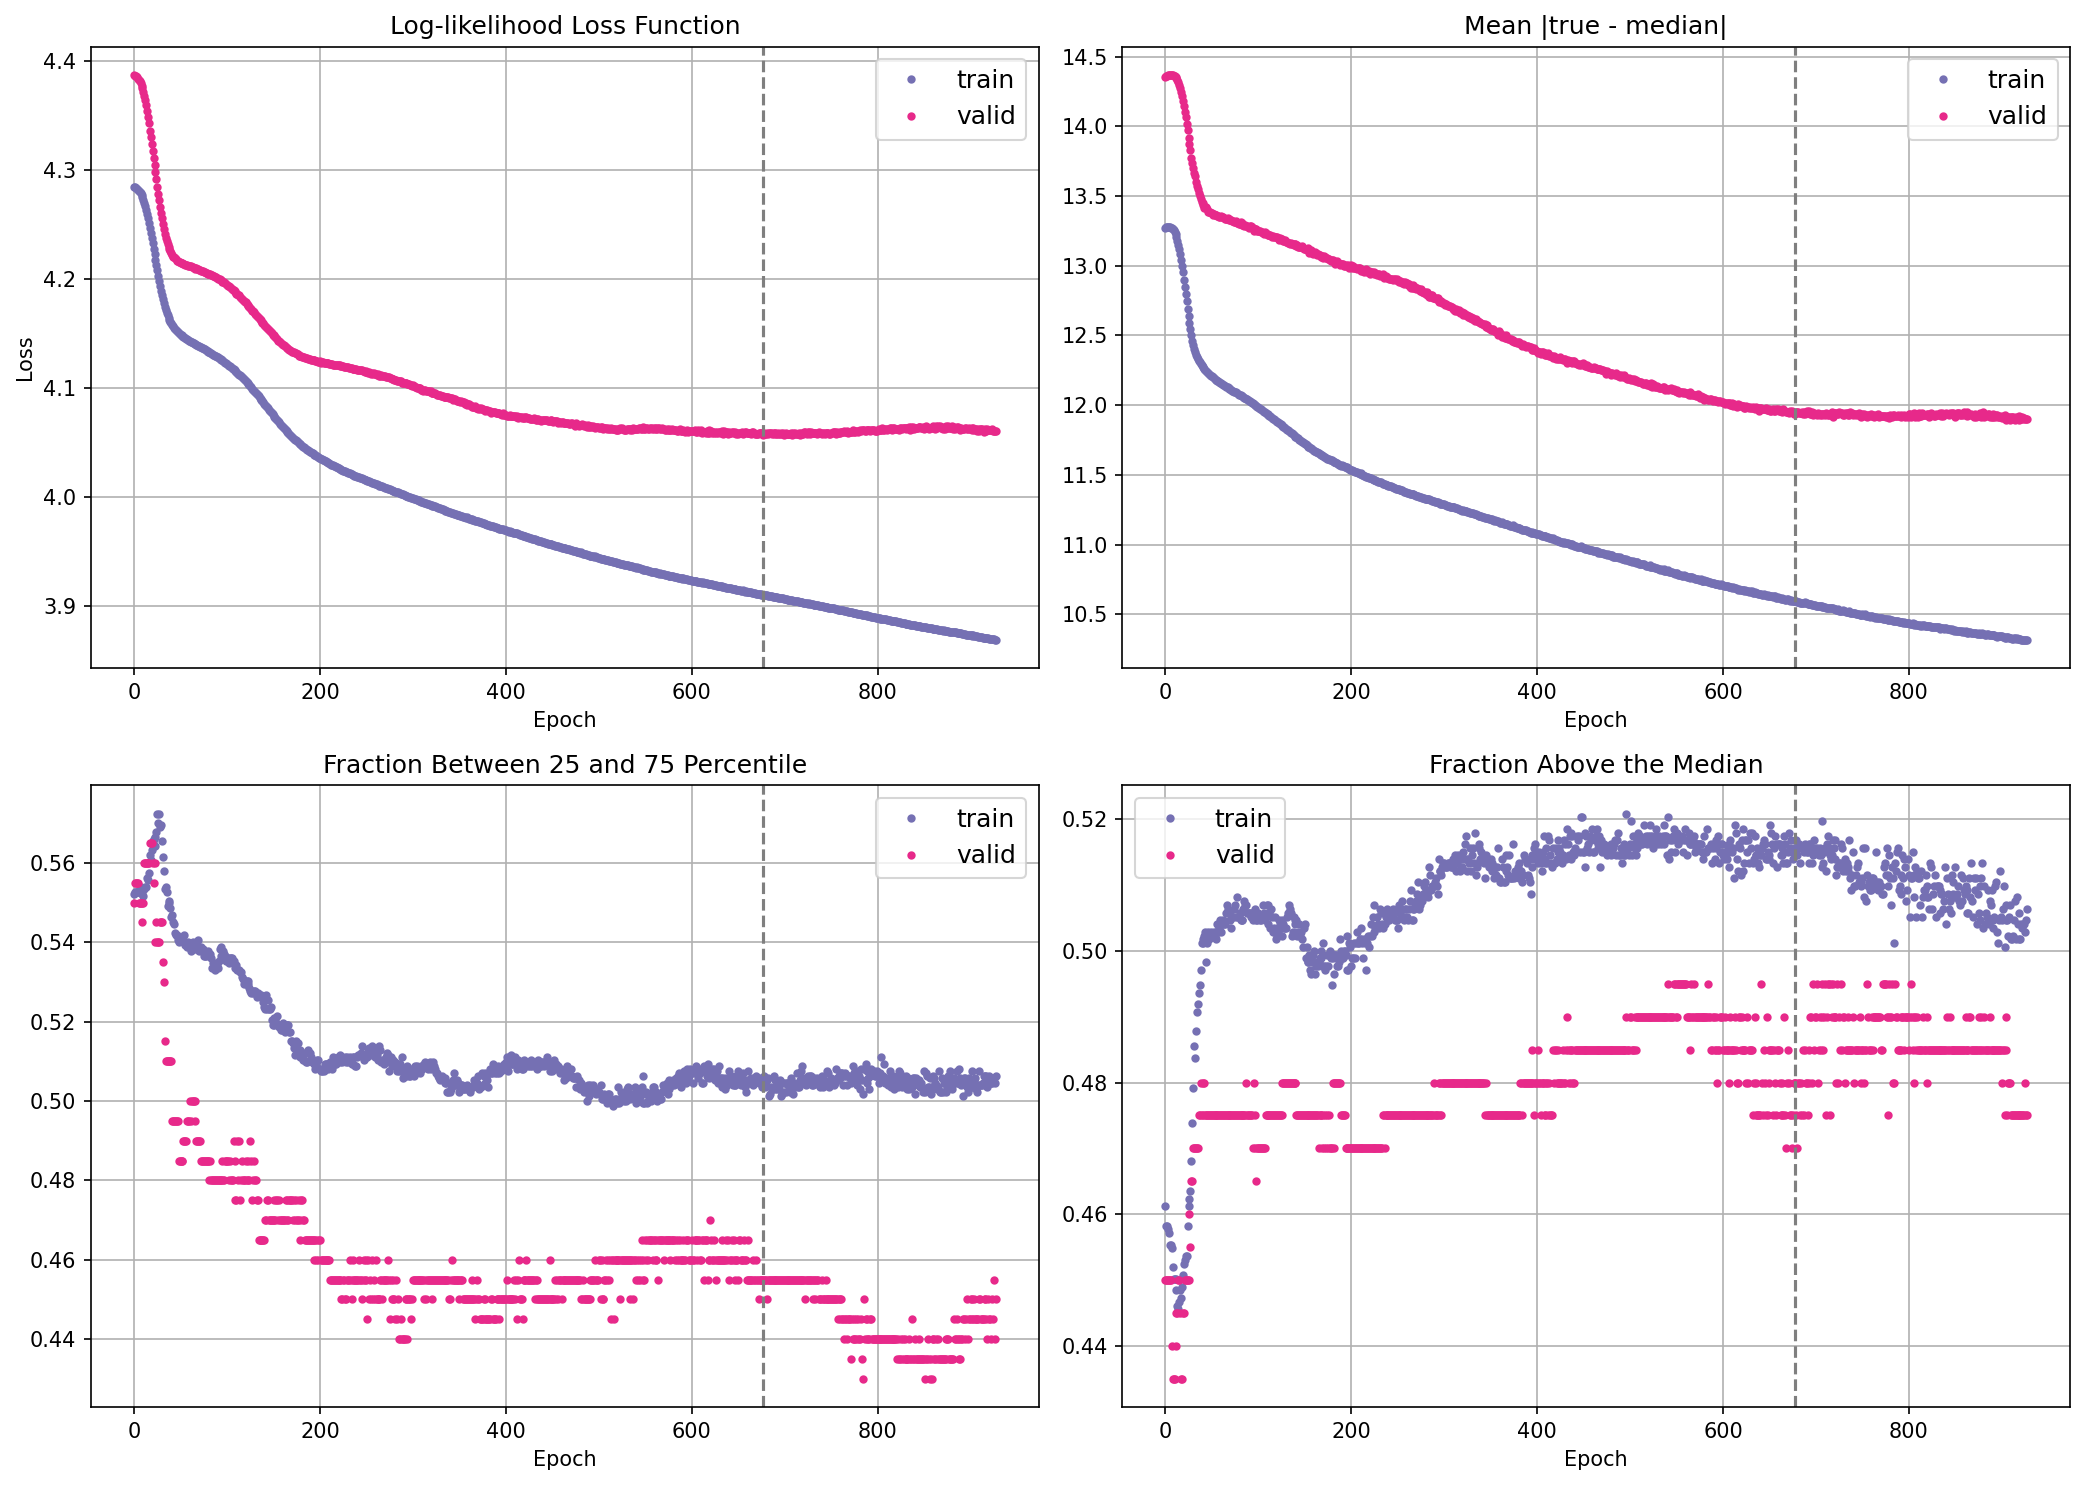

'intensity302_EPCP48_2014_shash3_network_seed_739_rng_seed_739'
'intensity302_EPCP48_2015_shash3_network_seed_222_rng_seed_222'
'intensity302_EPCP48_2015_shash3_network_seed_333_rng_seed_333'
Restoring model weights from the end of the best epoch: 335.
Epoch 00585: early stopping
{'best_epoch': 334,
 'elapsed_time': 12.310960054397583,
 'loss_train': 3.9851233959198,
 'loss_valid': 4.141298294067383,
 'network_seed': 333}


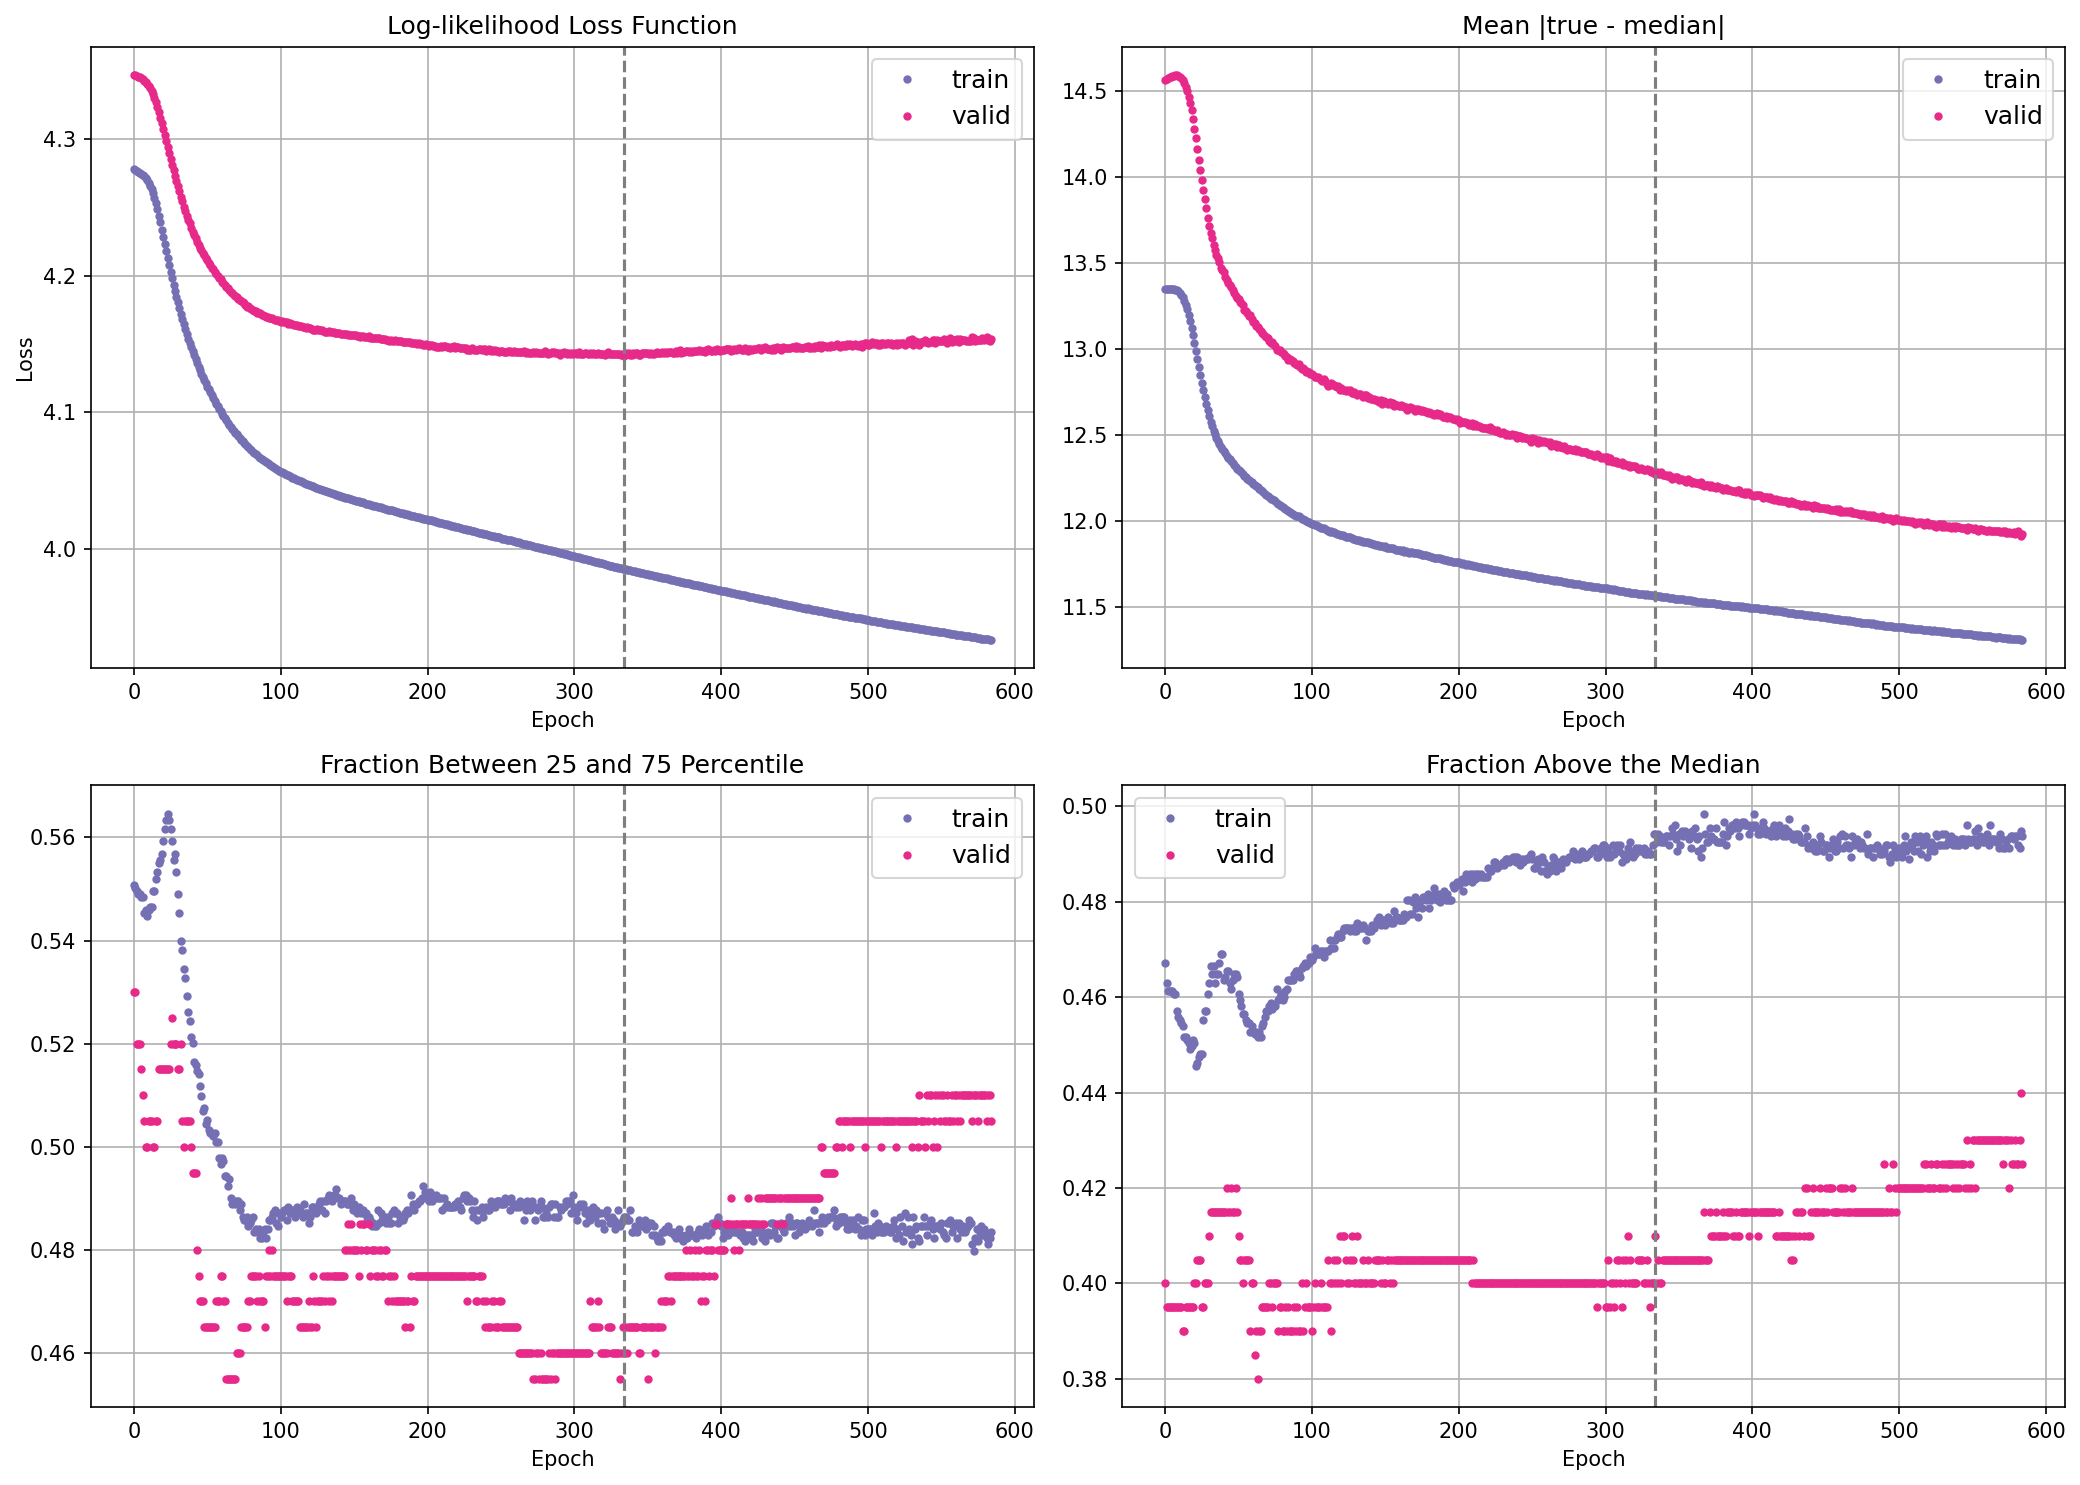

'intensity302_EPCP48_2015_shash3_network_seed_416_rng_seed_416'
'intensity302_EPCP48_2015_shash3_network_seed_599_rng_seed_599'
Restoring model weights from the end of the best epoch: 1248.
Epoch 01498: early stopping
{'best_epoch': 1247,
 'elapsed_time': 30.733813047409058,
 'loss_train': 3.874234437942505,
 'loss_valid': 3.9744720458984375,
 'network_seed': 599}


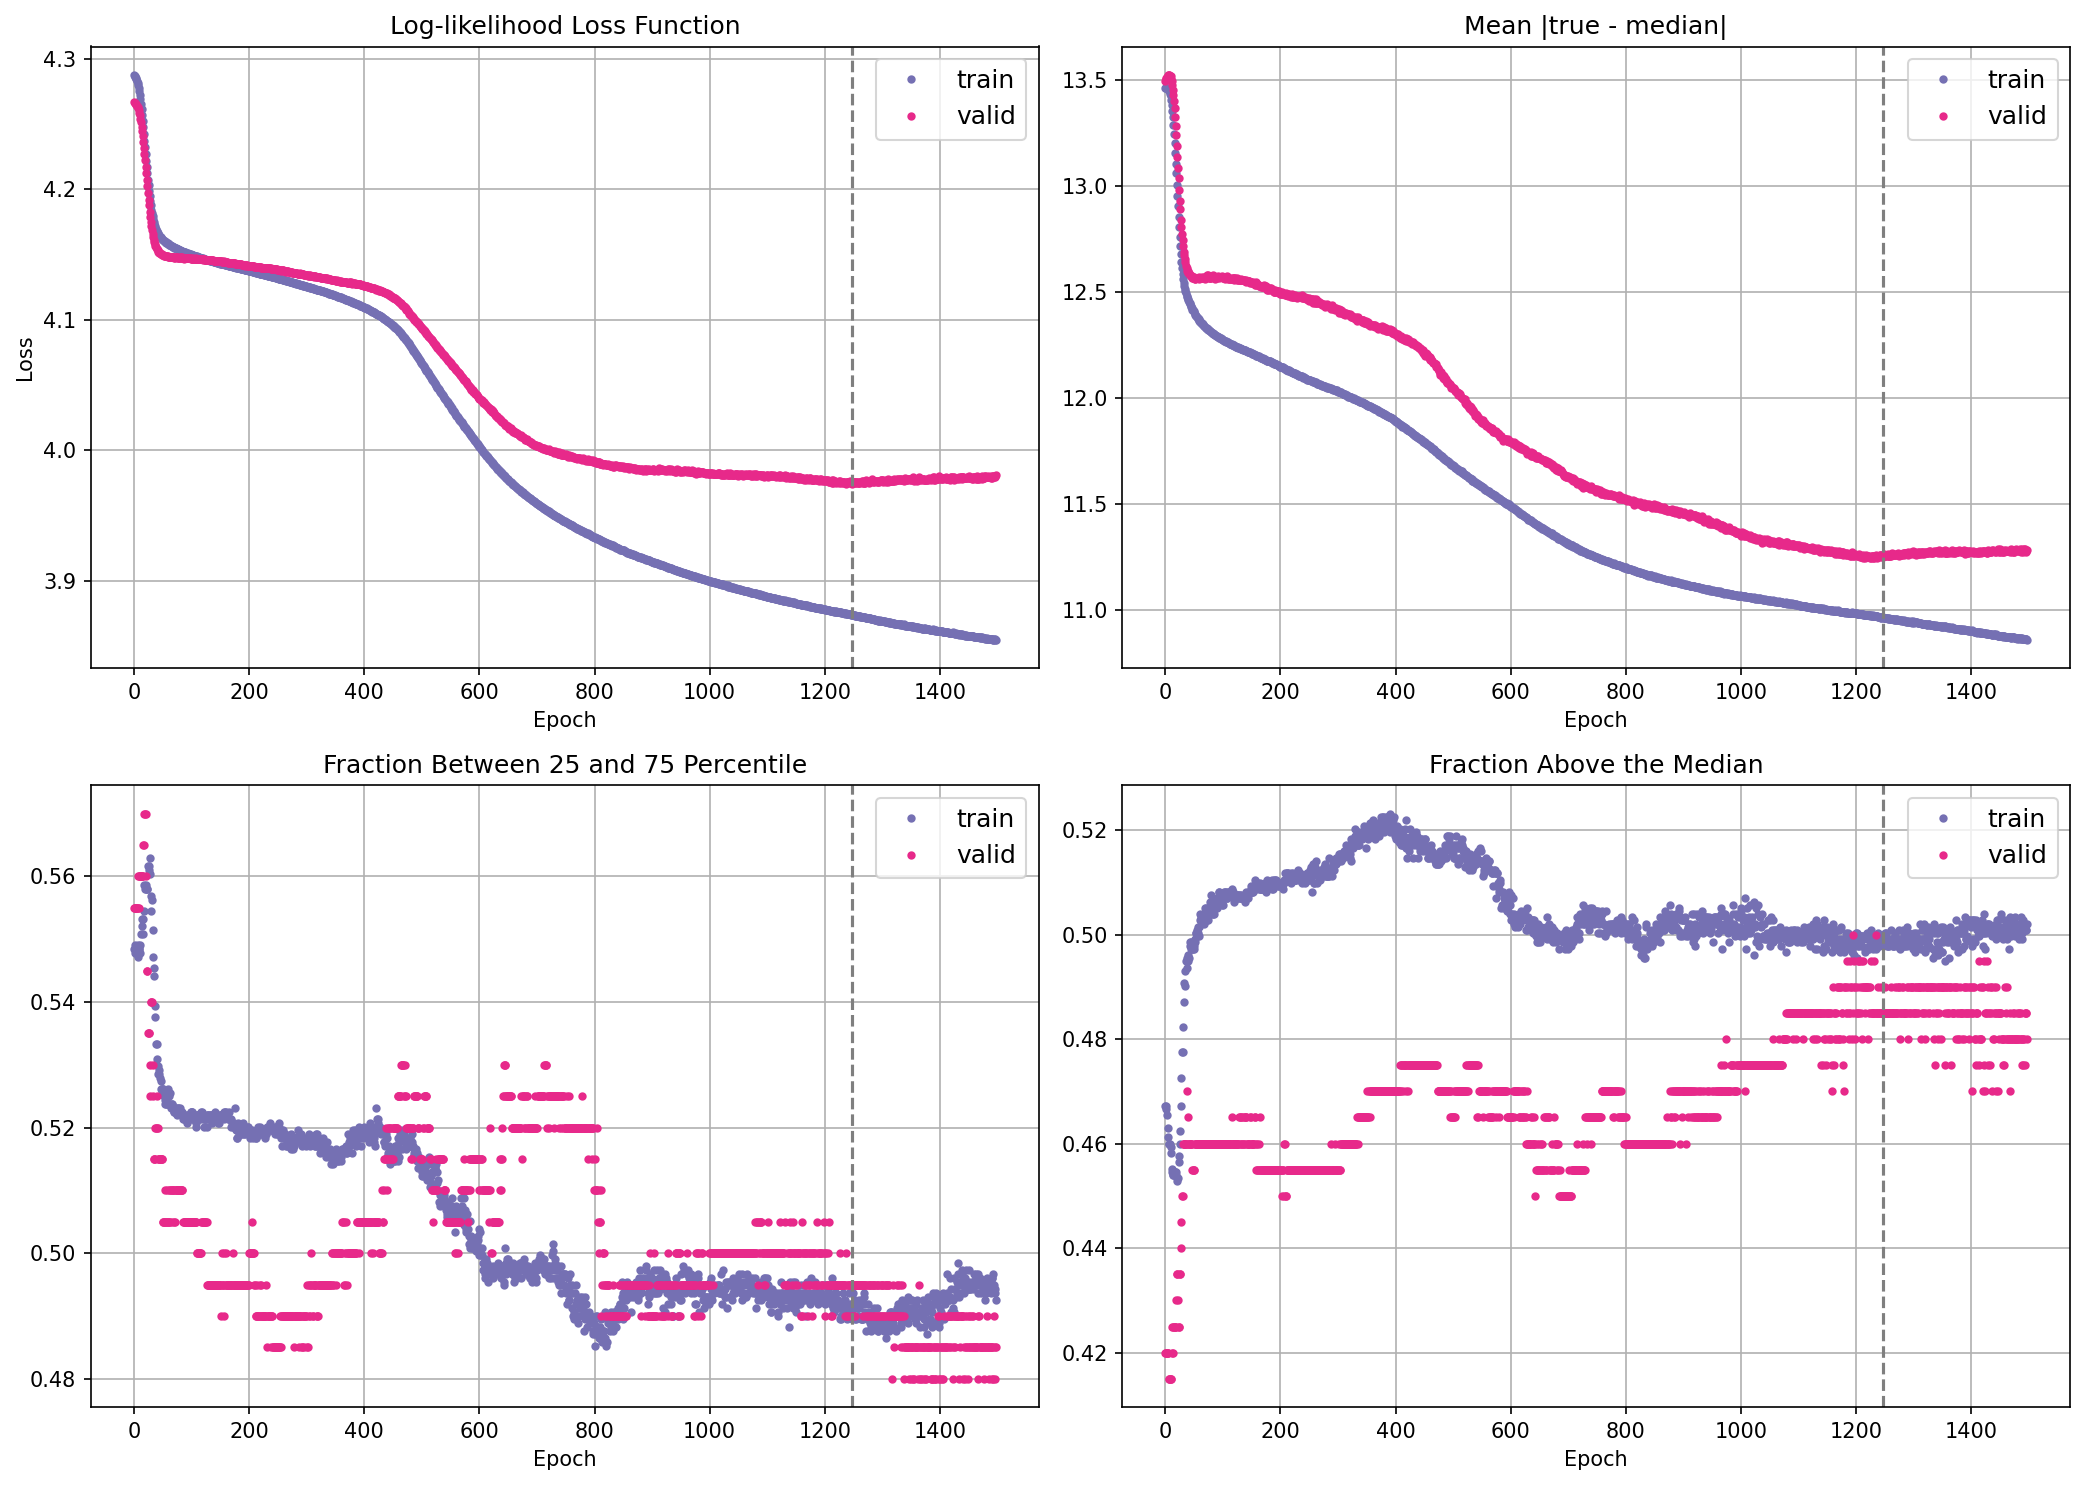

'intensity302_EPCP48_2015_shash3_network_seed_739_rng_seed_739'
'intensity302_EPCP48_2016_shash3_network_seed_222_rng_seed_222'
'intensity302_EPCP48_2016_shash3_network_seed_333_rng_seed_333'


In [ ]:
for exp_name in EXP_NAME_LIST:
    settings = experiment_settings.get_settings(exp_name)

    # set testing data
    if settings["test_condition"] == "leave-one-out":
        TESTING_YEARS_LIST = np.arange(2013,2022)
    elif settings["test_condition"] == "years":
        TESTING_YEARS_LIST = (np.copy(settings["years_test"]))
    else:
        raise NotImplementError('no such testing condition')

        
        
    for testing_years in TESTING_YEARS_LIST:        
        # set testing year
        settings["years_test"] = (testing_years,)
        
        
        for rng_seed in settings['rng_seed_list']:
            settings['rng_seed'] = rng_seed

            # build the intensity data tensors
            (
                data_summary,        
                x_train,
                onehot_train,
                x_val,
                onehot_val,
                x_test,
                onehot_test,        
                x_valtest,
                onehot_valtest,
                df_train,
                df_val,
                df_test,
                df_valtest,
            ) = build_hurricane_data(DATA_PATH, settings, verbose=0)

            # define the callbacks
            earlystoping_callback = tf.keras.callbacks.EarlyStopping(
                monitor="val_loss",
                mode="min",
                patience=settings["patience"],
                restore_best_weights=True,
                verbose=1,
            )

            training_callback = TrainingInstrumentation(
                x_train,
                onehot_train,
                interval=50,
            )

            callbacks = [earlystoping_callback, 
                         # training_callback,
                        ]

            # set network seed and train the model
            NETWORK_SEED_LIST = [settings["rng_seed"]]

            for network_seed in NETWORK_SEED_LIST:
                tf.random.set_seed(network_seed)  # This sets the global random seed.

                # Create the model name.
                model_name = (
                    exp_name + "_" + 
                    str(testing_years) + '_' +
                    settings["uncertainty_type"] + '_' + 
                    f"network_seed_{network_seed}_rng_seed_{settings['rng_seed']}"
                )
                pprint.pprint(model_name)

                # Make, compile, and train the model
                tf.keras.backend.clear_session()            
                model = build_model.make_model(
                    settings,
                    x_train,
                    onehot_train,
                    model_compile=True,
                )   
                # model.summary()

                # check if the model exists
                model_savename = MODEL_PATH + model_name + "_weights.h5"
                if os.path.exists(model_savename) and OVERWRITE_MODEL==False:
                    # print(model_savename + ' exists. Skipping...')
                    continue

                # train the network
                start_time = time.time()
                history = model.fit(
                    x_train,
                    onehot_train,
                    validation_data=(x_val, onehot_val),
                    batch_size=settings["batch_size"],
                    epochs=settings["n_epochs"],
                    shuffle=True,
                    verbose=0,
                    callbacks=callbacks,
                )
                stop_time = time.time()

                # Display the results, and save the model rum.
                best_epoch = np.argmin(history.history["val_loss"])
                fit_summary = {
                    "network_seed": network_seed,
                    "elapsed_time": stop_time - start_time,
                    "best_epoch": best_epoch,
                    "loss_train": history.history["loss"][best_epoch],
                    "loss_valid": history.history["val_loss"][best_epoch],
                }
                pprint.pprint(fit_summary, width=80)
                plot_history(history, model_name)

                save_model_run(
                    data_summary,
                    fit_summary,
                    model,
                    MODEL_PATH,
                    model_name,
                    settings,
                    __version__,
                )

In [ ]:
2+2